In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
from scipy.io import readsav
from scipy import ndimage
from scipy.stats import skew
import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
# import math
import glob as glob
import seaborn as sns
from scipy.stats import linregress

# PyMC 4.0 imports
import pymc as pm
import aesara.tensor as at 
import aesara
import arviz as az
import pymc.sampling_jax
import pytensor.tensor as pt
import pytensor

import sys
sys.path.append('../')

from scipy import stats

import os

from funciones.opencube2 import opencube2
from funciones.func4 import tilt,elong,MFLUX,barys,set_ranges,sizes
from funciones.modelcube import modelmag,modelmagf,modelmag2


In [54]:
DF=pd.read_csv('compare-params-TM3.csv')

# Rising speed?

In [55]:
pixsize=1.98*0.725
DFl=[]
for name in set(DF['AR'].values):
    DF2=DF[DF['AR']==name]
    if len(DF[DF['AR']==name]) > 0:
        DF2=DF2.assign(rispeed= lambda x: 0.000277778*np.gradient(x.da,x.mag)/1.5)
        DF2=DF2.assign(rispeed2= lambda x: pixsize*277.78*np.gradient(x.da*(x.a+x.R),x.mag)/1.5)
        DFl.append(DF2)
    
DFx=pd.concat(DFl)

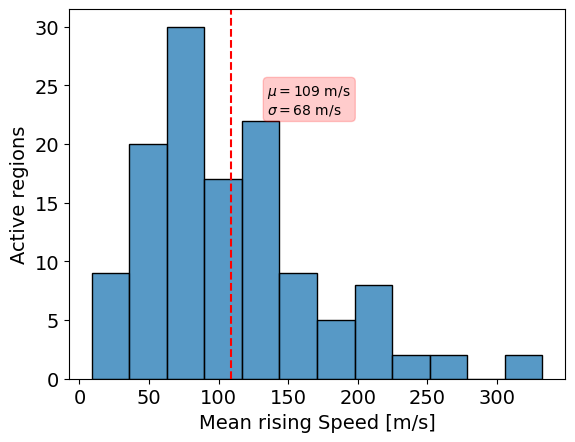

In [56]:
plt.rcParams.update({'font.size': 14})
sns.histplot(data=DFx[DFx['rispeed2']>0].groupby('AR').mean(),x='rispeed2')
#sns.histplot(data=DFx[DFx['rispeed2']>0].groupby('AR').std(),x='rispeed2',color='tab:orange',binrange=(0,300))
plt.xlabel(r'Mean rising Speed [m/s]')
plt.ylabel(r'Active regions')

mean_r=np.mean(DFx[DFx['rispeed2']>0].groupby('AR').mean()['rispeed2'])
std_r=np.mean(DFx[DFx['rispeed2']>0].groupby('AR').std()['rispeed2'])

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$\mu = {mean_r:.0f}$ m/s\n$\sigma = {std_r:.0f}$ m/s"
plt.text(0.4, 0.8, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

plt.axvline(mean_r,linestyle='dashed',color='red')

plt.show()



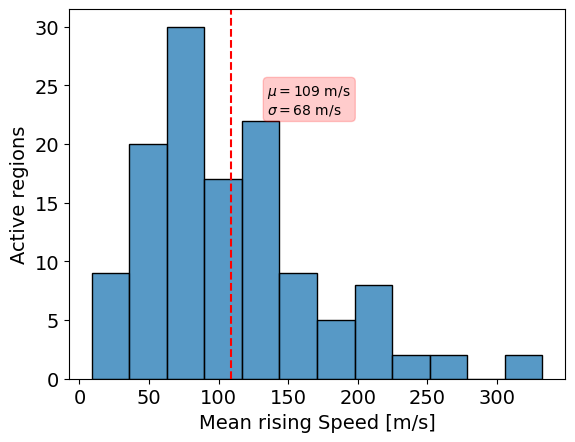

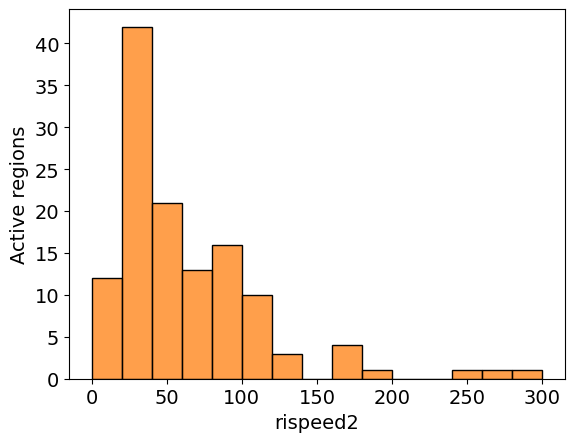

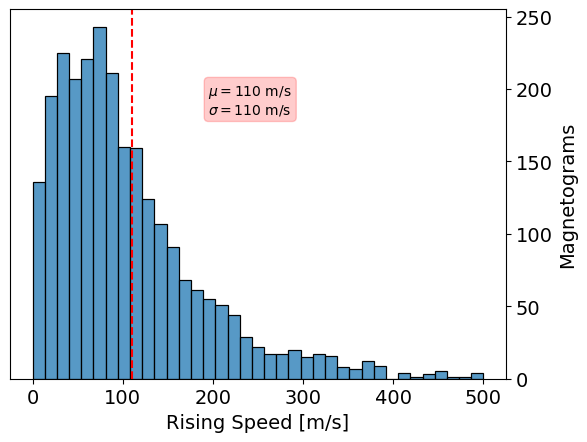

In [57]:
plt.rcParams.update({'font.size': 14})
sns.histplot(data=DFx[DFx['rispeed2']>0].groupby('AR').mean(),x='rispeed2')
#sns.histplot(data=DFx[DFx['rispeed2']>0].groupby('AR').std(),x='rispeed2',color='tab:orange',binrange=(0,300))
plt.xlabel(r'Mean rising Speed [m/s]')
plt.ylabel(r'Active regions')

mean_r=np.mean(DFx[DFx['rispeed2']>0].groupby('AR').mean()['rispeed2'])
std_r=np.mean(DFx[DFx['rispeed2']>0].groupby('AR').std()['rispeed2'])

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$\mu = {mean_r:.0f}$ m/s\n$\sigma = {std_r:.0f}$ m/s"
plt.text(0.4, 0.8, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

plt.axvline(mean_r,linestyle='dashed',color='red')

plt.show()
sns.histplot(data=DFx[DFx['rispeed2']>0].groupby('AR').std(),x='rispeed2',color='tab:orange',binrange=(0,300))
#plt.xlabel(r'Standard deviation of the rising Speed [m/s]')
plt.ylabel(r'Active regions')

plt.show()



sns.histplot(data=DFx[DFx['rispeed2']>0],x='rispeed2',binrange=(0,500))

mean_r=np.mean(DFx[DFx['rispeed2']>0].mean()['rispeed2'])
std_r=np.mean(DFx[DFx['rispeed2']>0].std()['rispeed2'])

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$\mu = {mean_r:.0f}$ m/s\n$\sigma = {std_r:.0f}$ m/s"
plt.text(0.4, 0.8, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

plt.axvline(mean_r,linestyle='dashed',color='red')

plt.xlabel(r'Rising Speed [m/s]')
plt.ylabel(r'Magnetograms')

# Mover el y-axis al lado derecho
plt.gca().yaxis.set_label_position("right")  # Mueve la etiqueta (ylabel) a la derecha
plt.gca().yaxis.tick_right() 

plt.show()


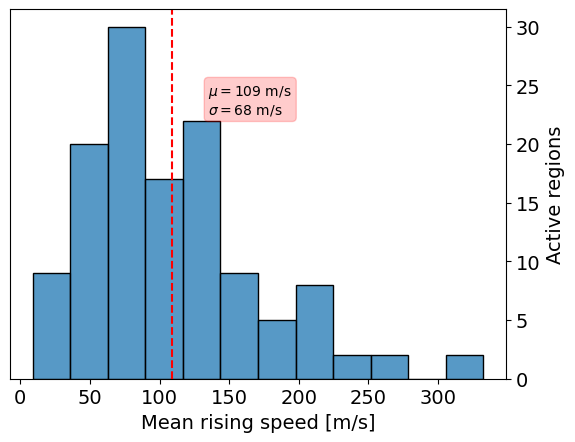

In [74]:
plt.rcParams.update({'font.size': 14})
sns.histplot(data=DFx[DFx['rispeed2']>0].groupby('AR').mean(),x='rispeed2')
#sns.histplot(data=DFx[DFx['rispeed2']>0].groupby('AR').std(),x='rispeed2',color='tab:orange',binrange=(0,300))
plt.xlabel(r'Mean rising speed [m/s]')
plt.ylabel(r'Active regions')

mean_r=np.mean(DFx[DFx['rispeed2']>0].groupby('AR').mean()['rispeed2'])
std_r=np.mean(DFx[DFx['rispeed2']>0].groupby('AR').std()['rispeed2'])

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$\mu = {mean_r:.0f}$ m/s\n$\sigma = {std_r:.0f}$ m/s"
plt.text(0.4, 0.8, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

plt.axvline(mean_r,linestyle='dashed',color='red')

# Mover el y-axis al lado derecho
plt.gca().yaxis.set_label_position("right")  # Mueve la etiqueta (ylabel) a la derecha
plt.gca().yaxis.tick_right() 

plt.show()


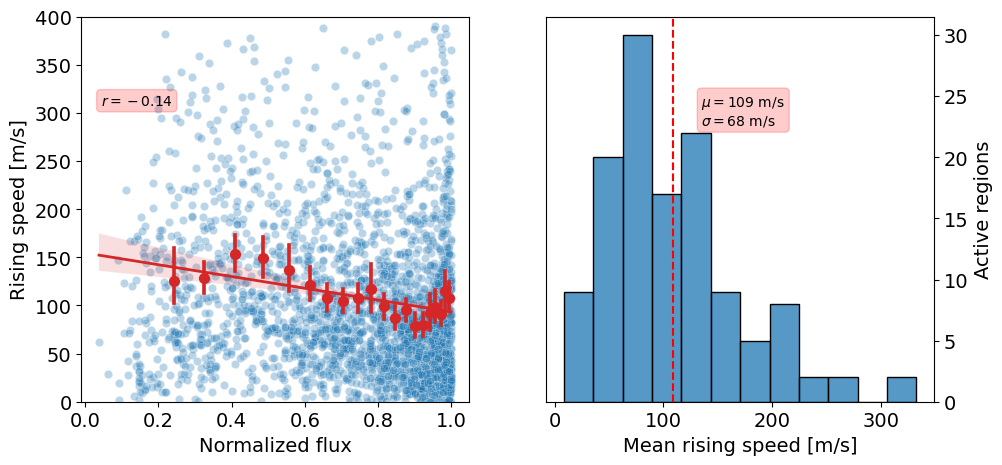

In [89]:

fig,axs=plt.subplots(1,2,figsize=(11,5))

axs=np.ravel(axs)

plt.rcParams.update({'font.size': 14})

sns.scatterplot(data=DFx[DFx['rispeed2']>0],x='fint',y='rispeed2',color='tab:blue',alpha=0.3,ax=axs[0])

sns.regplot(data=DFx[DFx['rispeed2']>0],x='fint',y='rispeed2',color='tab:red',x_bins=20,
            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'},ax=axs[0])

axs[0].set_ylim(0,400)


# Calcular la pendiente y el coeficiente de correlación
x = DFx[DFx['rispeed2']>0]['fint']
y = DFx[DFx['rispeed2']>0]['rispeed']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$r = {r_value:.2f}$"
plt.text(0.05, 0.8, textstr, transform=axs[0].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

axs[0].set_ylabel('Rising speed [m/s]')
axs[0].set_xlabel('Normalized flux')


sns.histplot(data=DFx[DFx['rispeed2']>0].groupby('AR').mean(),x='rispeed2',ax=axs[1])
#sns.histplot(data=DFx[DFx['rispeed2']>0].groupby('AR').std(),x='rispeed2',color='tab:orange',binrange=(0,300))
axs[1].set_xlabel(r'Mean rising speed [m/s]')
axs[1].set_ylabel(r'Active regions')

mean_r=np.mean(DFx[DFx['rispeed2']>0].groupby('AR').mean()['rispeed2'])
std_r=np.mean(DFx[DFx['rispeed2']>0].groupby('AR').std()['rispeed2'])

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$\mu = {mean_r:.0f}$ m/s\n$\sigma = {std_r:.0f}$ m/s"
plt.text(0.4, 0.8, textstr, transform=axs[1].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

axs[1].axvline(mean_r,linestyle='dashed',color='red')

# Mover el y-axis al lado derecho
axs[1].yaxis.set_label_position("right")  # Mueve la etiqueta (ylabel) a la derecha
axs[1].yaxis.tick_right()


#fig.tight_layout(pad=-1.0)

plt.savefig('./plots/risespeed.pdf',dpi=300)



In [58]:
DFx

mag        da     alpha          a          R        N0           axf  \
1362   0.0  0.376633  0.246544   8.786335  39.234887  0.758635  1.020567e+22   
1363   2.0  0.393110  0.245260   8.951014  39.234887  0.758635  1.020567e+22   
1364   4.0  0.403946  0.241660   9.100398  39.234887  0.758635  1.020567e+22   
1365   6.0  0.417614  0.241007   9.214417  39.234887  0.758635  1.020567e+22   
1366   8.0  0.425479  0.233017   9.243287  39.234887  0.758635  1.020567e+22   
...    ...       ...       ...        ...        ...       ...           ...   
1592  38.0  0.574081 -0.278666   9.912877  35.856680  0.176547  6.639533e+21   
1593  40.0  0.582960 -0.288961  10.232315  35.856680  0.176547  6.639533e+21   
1594  42.0  0.551295 -0.285477  10.121792  35.856680  0.176547  6.639533e+21   
1595  44.0  0.509576 -0.271709   9.566751  35.856680  0.176547  6.639533e+21   
1596  46.0  0.480313 -0.254284   9.143062  35.856680  0.176547  6.639533e+21   

             xc         yc     alphab  ...          flux         fluxp  \
1362  72.594172  49.087763  10.179135  ...  1.251496e+22  1.426570e+22   
1363  72.149732  48.419539   9.911114  ...  1.289468e+22  1.470367e+22   
1364  71.495325  47.934540  10.004850  ...  1.325618e+22  1.520156e+22   
1365  70.976906  47.559003  10.058295  ...  1.356149e+22  1.556471e+22   
1366  70.735336  47.409154  10.020163  ...  1.378608e+22  1.579005e+22   
...         ...        ...        ...  ...           ...           ...   
1592  51.271285  37.038212 -20.434335  ...  1.204566e+22  1.472323e+22   
1593  50.966350  37.037815 -20.479810  ...  1.229665e+22  1.497126e+22   
1594  51.074329  36.880687 -20.177112  ...  1.228854e+22  1.496438e+22   
1595  51.291138  36.771996 -19.935289  ...  1.236044e+22  1.518165e+22   
1596  51.437449  36.474492 -20.249730  ...  1.250584e+22  1.544283e+22   

             fluxn      fint  lat    AR  spt  day       rispeed    rispeed2  
1362  1.076421e+22  0.837390  -22  8193    2  1.0  1.525701e-06  113.778848  
1363  1.108568e+22  0.862797  -22  8193    2  1.0  1.264499e-06   95.599459  
1364  1.131080e+22  0.886986  -22  8193    2  1.0  1.134460e-06   85.782669  
1365  1.155828e+22  0.907414  -22  8193    2  1.0  9.969242e-07   73.212843  
1366  1.178212e+22  0.922442  -22  8193    2  1.0  8.669254e-07   62.605396  
...            ...       ...  ...   ...  ...  ...           ...         ...  
1592  9.368093e+21  0.963203   21  8699    2  3.0  1.685519e-07   34.423938  
1593  9.622044e+21  0.983273   21  8699    2  3.0 -1.054904e-06  -61.655709  
1594  9.612693e+21  0.982624   21  8699    2  3.0 -3.397448e-06 -247.319216  
1595  9.539243e+21  0.988374   21  8699    2  4.0 -3.286190e-06 -248.139145  
1596  9.568852e+21  1.000000   21  8699    2  4.0 -2.709466e-06 -203.722105  

[2985 rows x 32 columns]

In [21]:
np.mean(DFx[DFx['rispeed2']>0].groupby('AR').mean())

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


mag         2.182710e+01
da          3.420112e-01
alpha      -1.640434e-02
a           8.249689e+00
R           3.825205e+01
N0         -2.244055e-02
axf         7.674454e+21
xc          5.556825e+01
yc          4.044374e+01
alphab     -1.165259e+00
Dalpha      6.549577e-01
Dalphab     4.682060e-01
MSP         1.371722e+01
MSN         1.348253e+01
sar         3.432644e+01
lsep        1.740210e+01
fsep        1.692434e+01
lsize       1.340083e+01
fsize       1.379892e+01
am          6.894788e+00
elon        1.897786e-01
lead       -4.761905e-02
flux        7.762658e+21
fluxp       7.793273e+21
fluxn       7.732042e+21
fint        7.337112e-01
lat         7.857143e-01
spt         2.214286e+00
day         2.077929e+00
rispeed     1.998559e-06
rispeed2    1.085948e+02
dtype: float64

# Separation speed

In [4]:
np.sum(DF.lsep==0)

0

In [102]:


pixsize=1.98*0.725
DF=DF.assign(cond1=DF.a/(DF.a+DF.R))
DF['gamma'] = 0

# Asignar el valor calculado solo a las filas que cumplen la condición (A > 10)
DF.loc[DF['da']>= DF['cond1'], 'gamma'] = 180*np.arccos((DF.R+DF.a)*(1-DF.da)/DF.R)/np.pi

DF=DF.assign(sepax=lambda x: 2*pixsize*x.R*np.sin(np.pi*x.gamma/180))
DF['sar']=DF['sar'].apply(lambda x: pixsize*x)
DF=DF.assign(axspeed= lambda x: 277.78*np.gradient(x.sepax,x.mag)/1.5) # en m/s
DF=DF.assign(barspeed= lambda x: 277.78*np.gradient(x.sar,x.mag)/1.5) # en m/s

DF=DF.assign(lspeed= lambda x: pixsize*277.78*np.gradient(x.lsep,x.mag)/1.5) # en m/s
DF=DF.assign(fspeed= lambda x: pixsize*277.78*np.gradient(x.fsep,x.mag)/1.5) # en m/s

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [103]:
DFl=[]
for name in set(DF['AR'].values):
    DF2=DF[(DF['AR']==name) & (DF['gamma']>0)]
    if len(DF[(DF['AR']==name) & (DF['gamma']>0)]) > 0:
        DF2=DF2.assign(axspeed= lambda x: 277.78*np.gradient(x.sepax,x.mag)/1.5)
        DF2=DF2.assign(barspeed= lambda x: 277.78*np.gradient(x.sar,x.mag)/1.5)
        DF2=DF2.assign(lspeed= lambda x: pixsize*277.78*np.gradient(x.lsep,x.mag)/1.5) # en m/s
        DF2=DF2.assign(fspeed= lambda x: pixsize*277.78*np.gradient(x.fsep,x.mag)/1.5) # en m/s
        DFl.append(DF2)
    
DFx=pd.concat(DFl)

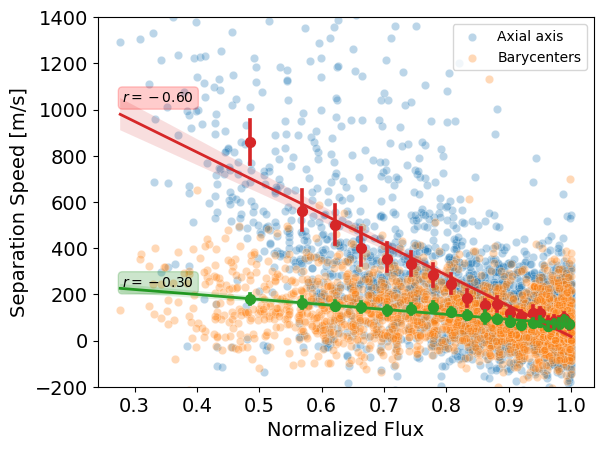

In [104]:
DFx1=DFx.groupby(['AR','fint']).mean().reset_index()


plt.rcParams.update({'font.size': 14})

sns.scatterplot(data=DFx1[DFx1['gamma']>0],x='fint',y='axspeed',color='tab:blue',alpha=0.3,label='Axial axis')
sns.scatterplot(data=DFx1[DFx1['gamma']>0],x='fint',y='barspeed',color='tab:orange',alpha=0.3,label='Barycenters')

sns.regplot(data=DFx1[DFx1['gamma']>0],x='fint',y='axspeed',color='tab:red',x_bins=20,
            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'})
sns.regplot(data=DFx1[DFx1['gamma']>0],x='fint',y='barspeed',color='tab:green',x_bins=20,
            line_kws={"color": "tab:green", "linewidth": 2,'linestyle':'solid'})

plt.ylim(-200,1400)


# Calcular la pendiente y el coeficiente de correlación
x = DFx1['fint']
y = DFx1['axspeed']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$r = {r_value:.2f}$"
plt.text(0.05, 0.8, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

# Calcular la pendiente y el coeficiente de correlación
x = DFx1['fint']
y = DFx1['barspeed']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$r = {r_value:.2f}$"
plt.text(0.05, 0.3, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='green', alpha=0.2))

plt.legend(fontsize=10)

plt.xlabel('Normalized Flux')
plt.ylabel('Separation Speed [m/s]')

plt.savefig('./plots/sarspeed.pdf',dpi=300)

In [110]:
DFx1.barspeed.mean()

26.10555973713854

In [111]:
DFx1.axspeed.mean()

122.95001926146963

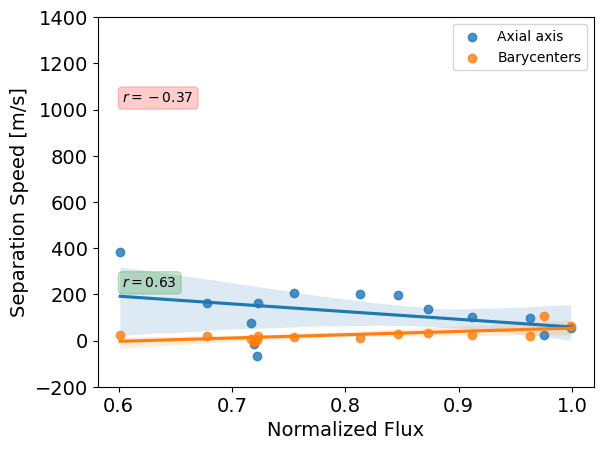

In [108]:
DFx1=DFx.groupby(['AR','fint']).mean().reset_index()
DFx1=DFx1[DFx1.AR==10268]


plt.rcParams.update({'font.size': 14})

sns.regplot(data=DFx1[DFx1['gamma']>0],x='fint',y='axspeed',color='tab:blue',label='Axial axis')
sns.regplot(data=DFx1[DFx1['gamma']>0],x='fint',y='barspeed',color='tab:orange',label='Barycenters')

#sns.regplot(data=DFx1[DFx1['gamma']>0],x='fint',y='axspeed',color='tab:red',x_bins=20,
#            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'})
#sns.regplot(data=DFx1[DFx1['gamma']>0],x='fint',y='barspeed',color='tab:green',x_bins=20,
#            line_kws={"color": "tab:green", "linewidth": 2,'linestyle':'solid'})

plt.ylim(-200,1400)


# Calcular la pendiente y el coeficiente de correlación
x = DFx1['fint']
y = DFx1['axspeed']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$r = {r_value:.2f}$"
plt.text(0.05, 0.8, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

# Calcular la pendiente y el coeficiente de correlación
x = DFx1['fint']
y = DFx1['barspeed']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$r = {r_value:.2f}$"
plt.text(0.05, 0.3, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='green', alpha=0.2))

plt.legend(fontsize=10)

plt.xlabel('Normalized Flux')
plt.ylabel('Separation Speed [m/s]')

plt.savefig('./plots/sarspeed.pdf',dpi=300)

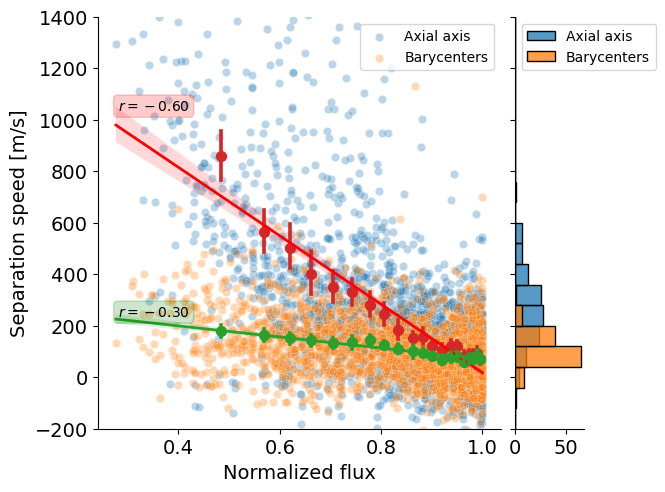

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress


plt.rcParams.update({'font.size': 14})






# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=DFx1[DFx1['gamma']>0], x="fint", y="barspeed", marginal_ticks=True,
                  #ratio=2,height=8,space=0.1
                 )

sns.scatterplot(data=DFx1[DFx1['gamma']>0],x='fint',y='axspeed', ax=g.ax_joint
                ,color='tab:blue',alpha=0.3,label='Axial axis')
sns.scatterplot(data=DFx1[DFx1['gamma']>0],x='fint',y='barspeed', ax=g.ax_joint
                ,color='tab:orange',alpha=0.3,label='Barycenters')


# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=DFx1[DFx1['gamma']>0], x="fint", y="axspeed", ax=g.ax_joint,
            color='tab:red',
            line_kws={"color": "red", "linewidth": 2},x_bins=20)
# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=DFx1[DFx1['gamma']>0], x="fint", y="barspeed", ax=g.ax_joint,
            color='tab:green', 
            line_kws={"color": "tab:green", "linewidth": 2,'linestyle':'solid'},x_bins=20)

g.ax_joint.set_ylim(-200,1400)
# Eliminar la marginal del eje x y mantener la del eje y
g.ax_marg_x.remove()  # Elimina la marginal superior
sns.histplot(data=DFx1[DFx1['gamma']>0].groupby('AR').mean(), y="axspeed", binrange=(-200,1400),bins=20, 
             ax=g.ax_marg_y, kde=False,label='Axial axis')
sns.histplot(data=DFx1[DFx1['gamma']>0].groupby('AR').mean(), y="barspeed", binrange=(-200,1400),bins=20,
             ax=g.ax_marg_y, kde=False,label='Barycenters')

# Calcular la pendiente y el coeficiente de correlación
x = DFx1['fint']
y = DFx1['axspeed']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.8, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

# Calcular la pendiente y el coeficiente de correlación
x = DFx1['fint']
y = DFx1['barspeed']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.3, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='green', alpha=0.2))

g.ax_marg_y.legend(fontsize=10)
g.ax_joint.legend(fontsize=10)
g.ax_marg_y.set_xlabel(' ')
# Etiquetas de los ejes
g.ax_joint.set_xlabel('Normalized flux')
g.ax_joint.set_ylabel(r'Separation speed [m/s]')


plt.savefig('./plots/sarspeed2.pdf',dpi=300)

In [15]:
print(DFx1[DFx1['gamma']>0].groupby('AR').mean().skew())

fint       -0.535585
mag         0.316271
da          0.319837
alpha      -0.083291
a           1.420925
R           1.359679
N0         -0.005916
axf         1.469769
xc          0.680884
yc          0.383587
alphab     -0.141182
Dalpha     -1.601485
Dalphab    -0.782903
MSP         0.864966
MSN         0.730213
sar         0.384427
lsep        0.573523
fsep        0.283783
lsize       0.615759
fsize       0.935406
am          1.147539
elon        1.516118
lead        0.133072
flux        1.295458
fluxp       1.523483
fluxn       1.203766
lat         0.038694
spt        -0.327682
day         0.386825
cond1       0.522693
gamma       0.245253
sepax       0.386720
axspeed     0.394199
barspeed    0.955047
lspeed      1.016954
fspeed      0.874231
dtype: float64


<AxesSubplot: xlabel='fint', ylabel='axspeed'>

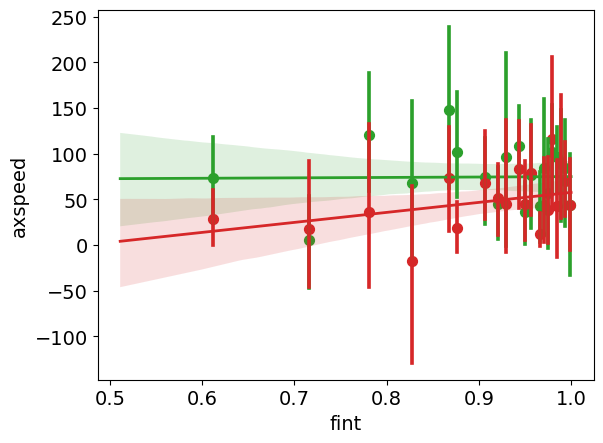

In [371]:
sns.regplot(data=DFx1[(DFx1['gamma']>70)], x="fint", y="barspeed",
            color='tab:green', 
            line_kws={"color": "tab:green", "linewidth": 2,'linestyle':'solid'},x_bins=20)

sns.regplot(data=DFx1[(DFx1['gamma']>70)], x="fint", y="axspeed",
            color='tab:red', 
            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'},x_bins=20)

<AxesSubplot: xlabel='fint', ylabel='axspeed'>

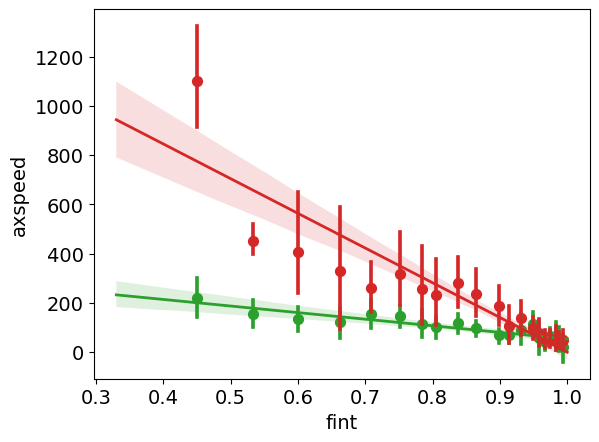

In [370]:
sns.regplot(data=DFx1[(DFx1['gamma']>0) & (DFx1['N0']>-0.1) & (DFx1['N0']<0.1)], x="fint", y="barspeed",
            color='tab:green', 
            line_kws={"color": "tab:green", "linewidth": 2,'linestyle':'solid'},x_bins=20)

sns.regplot(data=DFx1[(DFx1['gamma']>0) & (DFx1['N0']>-0.1) & (DFx1['N0']<0.1)], x="fint", y="axspeed",
            color='tab:red', 
            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'},x_bins=20)

In [367]:
DFx1[DFx1['gamma']>0]['barspeed'].std()

115.69578007049809

In [366]:
DFx1[DFx1['gamma']>0]['axspeed'].std()

365.23385165941284

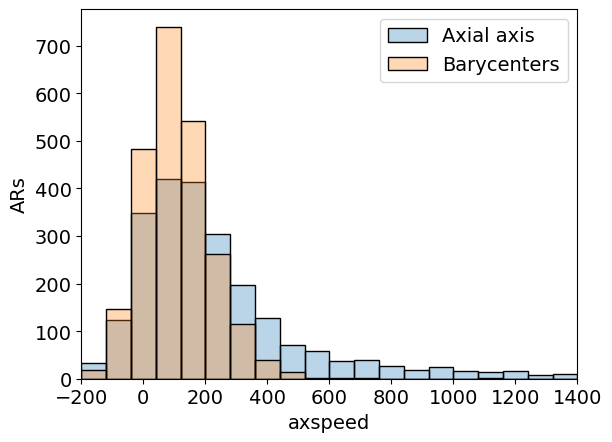

In [298]:
sns.histplot(data=DFx1[DFx1['gamma']>0],x='axspeed',color='tab:blue', binrange=(-200,1400),
                alpha=0.3,label='Axial axis',bins=20)
sns.histplot(data=DFx1[DFx1['gamma']>0],x='barspeed',color='tab:orange', binrange=(-200,1400),
                alpha=0.3,label='Barycenters',bins=20)

plt.xlim(-200,1400)
plt.ylabel('ARs')

plt.legend()

plt.savefig('./plots/histospeed.pdf',dpi=300)

(-100.0, 500.0)

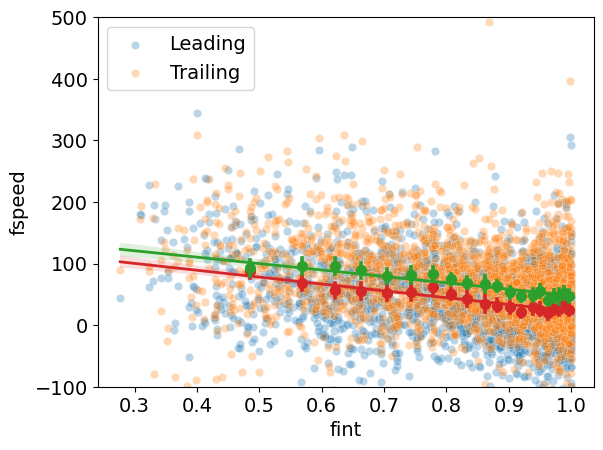

In [209]:
DFx1=DFx.groupby(['AR','fint']).mean().reset_index()


plt.rcParams.update({'font.size': 14})

sns.scatterplot(data=DFx1[DFx1['gamma']>0],x='fint',y='lspeed',color='tab:blue',alpha=0.3,label='Leading')
sns.scatterplot(data=DFx1[DFx1['gamma']>0],x='fint',y='fspeed',color='tab:orange',alpha=0.3,label='Trailing')

sns.regplot(data=DFx1[DFx1['gamma']>0],x='fint',y='lspeed',color='tab:red',x_bins=20,
            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'})
sns.regplot(data=DFx1[DFx1['gamma']>0],x='fint',y='fspeed',color='tab:green',x_bins=20,
            line_kws={"color": "tab:green", "linewidth": 2,'linestyle':'solid'})

plt.ylim(-100,500)

43.21026615777021 66.8820666808481 133.51629650063208


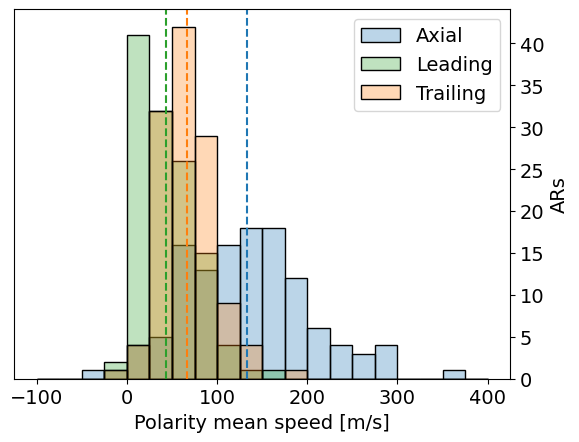

In [223]:
DFx1=DFx.groupby(['AR']).mean().reset_index()

DFx1=DFx1.assign(axspeed2= lambda x: x.axspeed/2)

sns.histplot(data=DFx1,x='axspeed2',color='tab:blue',alpha=0.3,label='Axial',binrange=(-100,400),bins=20)
sns.histplot(data=DFx1,x='lspeed',color='tab:green',alpha=0.3,label='Leading',binrange=(-100,400),bins=20)
sns.histplot(data=DFx1,x='fspeed',color='tab:orange',alpha=0.3,label='Trailing',binrange=(-100,400),bins=20)

plt.axvline(DFx1.axspeed2.mean(),linestyle='dashed',color='tab:blue')
plt.axvline(DFx1.lspeed.mean(),linestyle='dashed',color='tab:green')
plt.axvline(DFx1.fspeed.mean(),linestyle='dashed',color='tab:orange')


print(DFx1.lspeed.mean(),DFx1.fspeed.mean(),DFx1.axspeed2.mean())

plt.legend()

# Mover el y-axis al lado derecho
plt.gca().yaxis.set_label_position("right")  # Mueve la etiqueta (ylabel) a la derecha
plt.gca().yaxis.tick_right() 

plt.xlabel('Polarity mean speed [m/s]')
plt.ylabel('ARs')

plt.savefig('./plots/polarspeed.pdf',dpi=300)

In [195]:
DFx1

AR   mag        da     alpha          a          R        N0  \
0     7982  48.0  0.236716 -0.458608   8.454486  28.326319 -0.441226   
1     8016  17.0  0.592027  0.101966   7.769497  22.970716  1.521188   
2     8040  57.0  0.278388  0.078952   9.537725  57.599729 -0.125831   
3     8056  30.0  0.540333 -0.302991   9.324565  21.939146 -0.392526   
4     8060  38.0  0.790483  0.283130   9.255761  17.090484  0.642047   
..     ...   ...       ...       ...        ...        ...       ...   
117  10900  57.0  0.238462  0.095326   8.183070  45.477787  0.943600   
118  10971  38.0  0.938404  0.659719   6.626230  11.488580  1.196626   
119  10987  38.0  0.550787  0.165405  10.070776  26.735818 -0.509388   
120  11007  51.0  0.344326 -0.111051   6.535270  38.883156 -1.109657   
121  11024  43.0  0.462527  0.493268   8.026426  39.028202 -0.760674   

              axf         xc         yc  ...  lat  spt  day     cond1  \
0    8.877730e+21  50.286162  47.922838  ...   11    3  4.0  0.229861   
1    2.192834e+21  62.864879  37.401561  ...  -21    1  2.0  0.252747   
2    6.602336e+21  73.557378  39.955535  ...    3    3  4.0  0.142063   
3    4.575189e+21  44.784637  36.045603  ...   17    2  3.0  0.298255   
4    2.013246e+21  37.213752  34.123065  ...    5    2  3.0  0.351312   
..            ...        ...        ...  ...  ...  ...  ...       ...   
117  4.201067e+21  67.222219  48.332375  ...   -5    1  4.0  0.152496   
118  1.207551e+21  41.092141  29.840552  ...    3    2  3.0  0.365791   
119  6.172379e+21  57.101120  43.245411  ...   -8    2  3.0  0.273613   
120  1.542822e+21  58.477746  27.657963  ...   35    3  4.0  0.143890   
121  4.890881e+21  64.548979  59.918693  ...  -25    1  3.0  0.170577   

         gamma      sepax      axspeed    barspeed      lspeed      fspeed  
0    11.483574  16.190722   331.141614   35.415348   35.415348    0.000000  
1    60.064736  57.150665  3621.733613  486.050800  486.050800    0.000000  
2    32.743474  89.444469   435.892782  224.980377  224.980377    0.000000  
3    49.152607  47.647005  1642.619938  256.886108  256.886108    0.000000  
4    71.156422  46.436991   983.816290  306.742456  306.742456    0.000000  
..         ...        ...          ...         ...         ...         ...  
117  26.816604  58.903375  1499.391590  339.422130  339.422130    0.000000  
118  84.555643  32.834917   165.972369  148.260082    0.000000  148.260082  
119  51.889661  60.395430   257.649503  162.194835  162.194835    0.000000  
120  42.150520  74.915101  1483.025790  401.216589  401.216589    0.000000  
121  50.568922  86.546182  2976.484784  486.085213    0.000000  486.085213  

[122 rows x 34 columns]

# Correlation tests

9311----------------------------------
La distribución es multimodal (rechazo de unimodalidad).


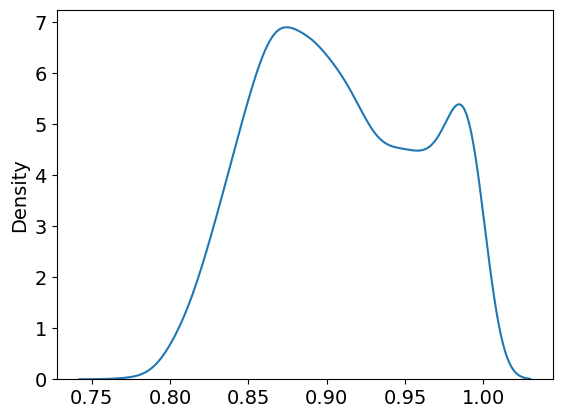

11007----------------------------------
La distribución es multimodal (rechazo de unimodalidad).


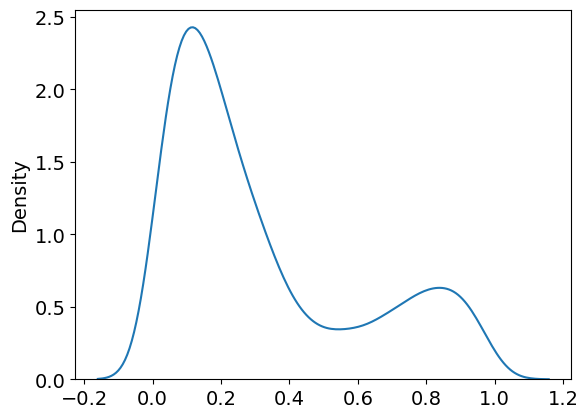

10547----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
10547----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
10547----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
10547----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
10547----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
10547----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
10547----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
10547----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
10547----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
10547----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
10547-------------------------

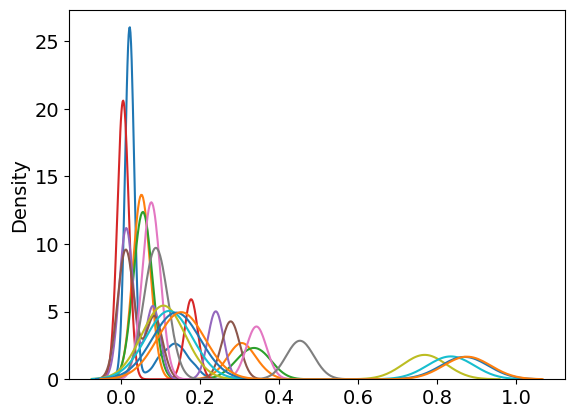

9032----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
9032----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
9032----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
9032----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
9032----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
9032----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
9032----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
9032----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
9032----------------------------------
La distribución es multimodal (rechazo de unimodalidad).
9032----------------------------------
La distribución es multimodal (rechazo de unimodalidad).


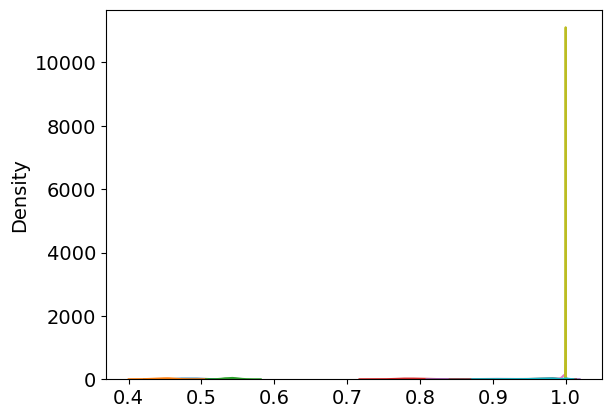

8552----------------------------------
La distribución es multimodal (rechazo de unimodalidad).


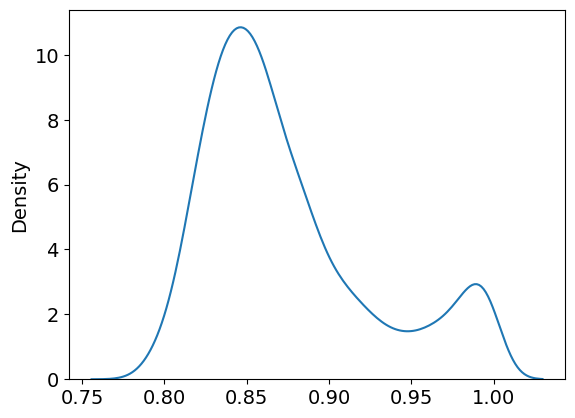

In [224]:
from diptest import diptest

for name in list(set(DF.AR.values)):
#for name in ['10268']:
    

   
    DF1=pd.read_csv('./posteriors/'+str(name)+'_TM3.csv')

    for i in np.arange(DF1['mag'].max()):
        data=DF1[DF1['mag']==i]['da'].values
        # Aplicar prueba de dip
        dip_stat, p_value = diptest(data)
      #  print(f"Estadístico de dip: {dip_stat}, p-valor: {p_value}")
        if p_value < 0.05:
            print(str(name)+'----------------------------------')
            print("La distribución es multimodal (rechazo de unimodalidad).")
            sns.kdeplot(data)
        else:
            pass
#            print("La distribución no es significativamente multimodal.")
    plt.show()


In [45]:
covasa=[]
covasR=[]

errR=[]
erra=[]
errda=[]

for name in list(set(DF.AR.values)):
#for name in ['10268']:
  #  print(str(name)+'--------------------')
    

   
    DF1=pd.read_csv('./posteriors/'+str(name)+'_TM3.csv')

    for i in np.arange(DF1['mag'].max()):
        y=DF1[DF1['mag']==i]['da'].values
        x=DF1[DF1['mag']==i]['a'].values
        erra.append(np.std(x))
        
#        print(np.cov(x,y)[0,1])
        X = np.stack((x, y), axis=0)
        covasa.append(np.cov(X)[0,1])
        y=DF1[DF1['mag']==i]['da'].values
        x=DF1[DF1['mag']==i]['R'].values
        
#        print(np.cov(x,y)[0,1])
        covasR.append(np.cov(x,y)[0,1])
        errR.append(np.std(x))
        errda.append(np.std(DF1[DF1['mag']==i]['da'].values))
        


In [48]:
np.std(errda)

0.016354086718451392

<AxesSubplot: ylabel='Density'>

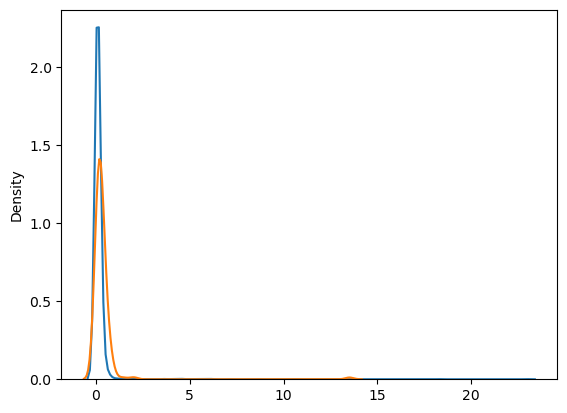

In [26]:
sns.kdeplot(erra)
sns.kdeplot(errR)

In [18]:
print(np.max(covasa))
print(np.max(covasR))

1.7915610060041782
0.021158108966470534


(-0.25, 0.25)

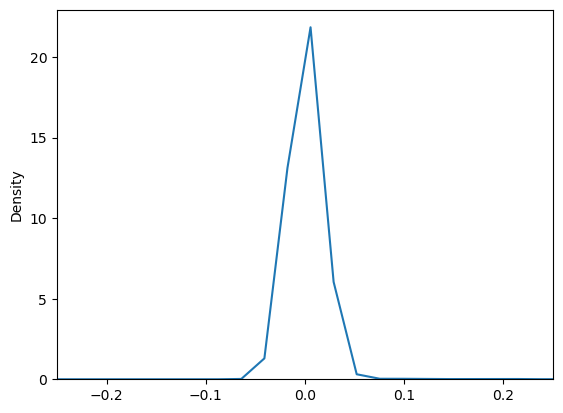

In [21]:
sns.kdeplot(covasa)
plt.xlim(-0.25,0.25)

(-0.25, 0.25)

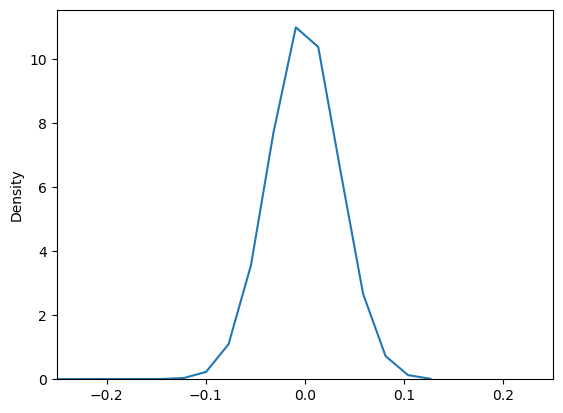

In [22]:
sns.kdeplot(covasR)
plt.xlim(-0.25,0.25)

In [45]:
# Función para calcular coeficientes de correlación dentro de cada grupo
def compute_corra(group):
    return group.corr().loc["da","a"]

def compute_corrR(group):
    return group.corr().loc["da","R"]


corres=[]
#for name in list(set(DF.AR.values)):
for name in ['10268']:
    

   
    DF1=pd.read_csv('./posteriors/'+str(name)+'_TM3.csv')
    print(str(name)+'----------------------------------')
    

    # Agrupar por 'Grupo' y calcular correlación
    resulta = DF1.groupby('mag').apply(compute_corra)
    # Agrupar por 'Grupo' y calcular correlación
    resultR = DF1.groupby('mag').apply(compute_corrR)
    
#    corres.append(pd.DataFrame({'AR':[name],'acorr':[resulta.max()],'Rcorr':[resultR.max()]}))
    corres.append(pd.DataFrame({'AR':name,'acorr':resulta.values,'Rcorr':resultR.values}))

DFcorr=pd.concat(corres)    
# Formatear como tabla
#result_df = resulta.reset_index(name=["a"])

8193----------------------------------
9218----------------------------------
8205----------------------------------
8722----------------------------------
8214----------------------------------
10268----------------------------------
8226----------------------------------
10274----------------------------------
9764----------------------------------
8749----------------------------------
9267----------------------------------
8757----------------------------------
8760----------------------------------
10311----------------------------------
9290----------------------------------
9291----------------------------------
10323----------------------------------
9308----------------------------------
8797----------------------------------
9311----------------------------------
10344----------------------------------
10349----------------------------------
9844----------------------------------
9845----------------------------------
8828----------------------------------
10879--------------

<AxesSubplot: xlabel='da', ylabel='Density'>

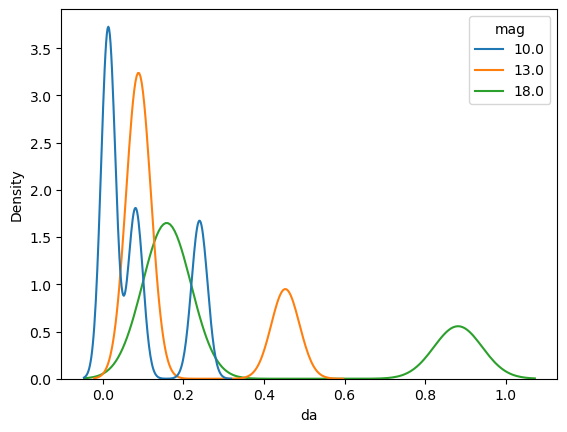

In [59]:
#for name in list(set(DF.AR.values)):
for name in ['10547']:
    

   
    DF1=pd.read_csv('./posteriors/'+str(name)+'_TM3.csv')

    


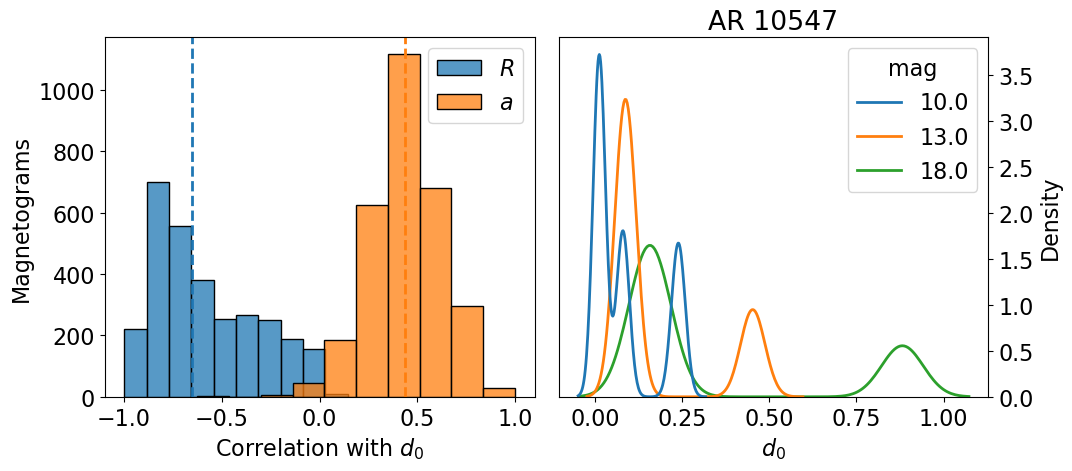

In [78]:

plt.rcParams.update({'font.size': 16})

fig,axs=plt.subplots(1,2,figsize=(11,5))


sns.histplot(data=DFcorr,x='Rcorr',bins=10,label=r'$R$',ax=axs[0])
sns.histplot(data=DFcorr,x='acorr',bins=10,label=r'$a$',ax=axs[0])
axs[0].set_xlabel(r'Correlation with $d_0$')
axs[0].set_ylabel('Magnetograms')
axs[0].legend()

axs[0].axvline(np.median(DFcorr['Rcorr'].values),linestyle='dashed',linewidth=2)
axs[0].axvline(np.median(DFcorr['acorr'].values),linestyle='dashed',color='tab:orange',linewidth=2)

sns.kdeplot(data=DF1[DF1['mag'].isin([10,13,18])],x='da',hue='mag',
            palette={10.0: "tab:blue", 13.0: "tab:orange", 18.0: "tab:green"},ax=axs[1],linewidth=2)

axs[1].set_xlabel(r'$d_0$')
axs[1].set_title('AR 10547')

# Mover el y-axis al lado derecho
axs[1].yaxis.set_label_position("right")  # Mueve la etiqueta (ylabel) a la derecha
axs[1].yaxis.tick_right() 

fig.tight_layout()

fig.savefig('./plots/correlations.pdf',dpi=300)

# Group by flux and AR

In [91]:
DF2=DF.groupby(['AR','fint']).mean().reset_index()

In [92]:
DF2=DF2.assign(cond1=DF2.a/(DF2.a+DF2.R))
DF2=DF2.assign(fracaR=lambda x: x.a/x.R)
DF2['gamma'] = 0

# Asignar el valor calculado solo a las filas que cumplen la condición (A > 10)
DF2.loc[DF2['da']>= DF2['cond1'], 'gamma'] = 180*np.arccos((DF2.R+DF2.a)*(1-DF2.da)/DF2.R)/np.pi
#DF2[DF2['da']>= DF2['cond1']]['gamma']=DF2[DF2['da']>= DF2['cond1']].apply(lambda x: np.arccos((x.R+x.a)*(1-x.da)/x.R))

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [93]:
selars=[]
selars2=[]
for ars in list(set(DF.AR.values)):
    imag0=DF[DF['AR']==ars]['mag'].idxmin()
    imag=DF[DF['AR']==ars]['mag'].idxmax()
    iflux=DF[DF['AR']==ars]['fint'].idxmax()

    frac=DF.iloc[imag].flux/DF.iloc[iflux].flux
    frac0=DF.iloc[imag0].flux/DF.iloc[iflux].flux
    
 #   print(ars,frac)
    
    if frac < 0.95:
        selars.append(ars)
        
    if frac0 < 0.3:
        selars2.append(ars)
        
inter = list(set(selars) & set(selars2))

print('{} ars found'.format(len(selars),'%s'))
print('{} ars found'.format(len(selars2),'%s'))
print('{} ars found'.format(len(inter),'%s'))

19 ars found
56 ars found
6 ars found


# d_0

0.15780807930062127 0.11218264394105282
0.22694103059218546 0.13992190528629572
0.6098421532746026 0.5466451533768302 0.0441847752909648
0.5032396176651948 0.5573052823211473 0.01372758324246433


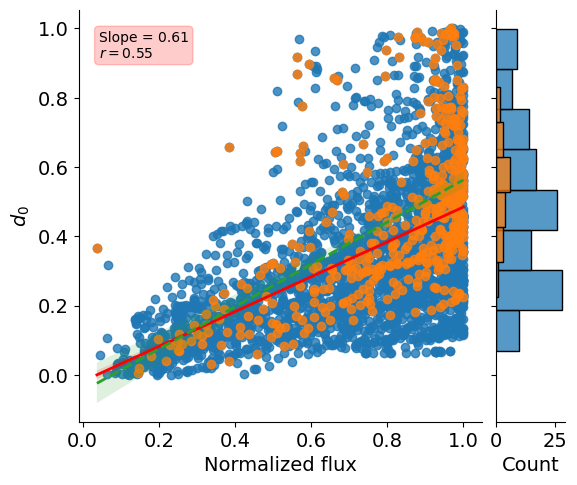

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

DFmm=DF[DF['AR'].isin(selars)]
plt.rcParams.update({'font.size': 14})


DF20=DF.groupby(['AR','fint']).mean().reset_index()
# Calcular la pendiente y el coeficiente de correlación
x = DF20['fint']
y = DF20['da']
slope, intercept, r_value, p_value, std_err = linregress(x, y)


tt=slope*DF20['da']+intercept

print(np.mean(tt),np.std(tt))

DF2=DFmm.groupby(['AR','fint']).mean().reset_index()


# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=DF20, x="fint", y="da", marginal_ticks=True)

# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=DF20, x="fint", y="da", ax=g.ax_joint, line_kws={"color": "red", "linewidth": 2})
# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=DF2, x="fint", y="da", ax=g.ax_joint,color='tab:orange', line_kws={"color": "tab:green", "linewidth": 2,'linestyle':'dashed'})

x = DF2['fint']
y = DF2['da']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

tt=slope*DF2['da']+intercept

print(np.mean(tt),np.std(tt))

print(slope,r_value,std_err)

# Eliminar la marginal del eje x y mantener la del eje y
g.ax_marg_x.remove()  # Elimina la marginal superior
sns.histplot(data=DF20.loc[DF20.groupby("AR")["flux"].idxmax()], y="da", ax=g.ax_marg_y, kde=False)
sns.histplot(data=DF2.loc[DF2.groupby("AR")["flux"].idxmax()], y="da", ax=g.ax_marg_y, kde=False)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.95, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

# Etiquetas de los ejes
g.ax_joint.set_xlabel('Normalized flux')
g.ax_joint.set_ylabel(r'$d_0$')

x = DF20['fint']
y = DF20['da']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(slope,r_value,std_err)

plt.savefig('./plots/da.pdf',dpi=300)

# Gamma

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


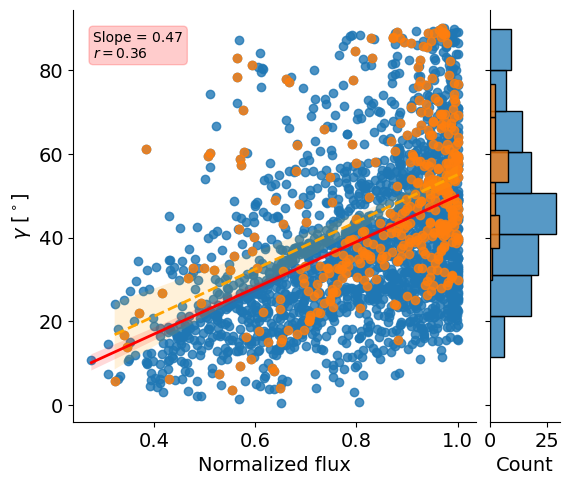

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

DFmm=DF[DF['AR'].isin(selars)]
plt.rcParams.update({'font.size': 14})



DF20=DF.groupby(['AR','fint']).mean().reset_index()
DF20=DF20.assign(cond1=DF20.a/(DF20.a+DF20.R))
DF20['gamma'] = 0

# Asignar el valor calculado solo a las filas que cumplen la condición (A > 10)
DF20.loc[DF20['da']>= DF20['cond1'], 'gamma'] = 180*np.arccos((DF20.R+DF20.a)*(1-DF20.da)/DF20.R)/np.pi
#DF2[DF2['da']>= DF2['cond1']]['gamma']=DF2[DF2['da']>= DF2['cond1']].apply(lambda x: np.arccos((x.R+x.a)*(1-x.da)/x.R))


# Calcular la pendiente y el coeficiente de correlación
x = DF20[DF20['gamma']>0]['fint']
y = DF20[DF20['gamma']>0]['da']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

DF2=DFmm.groupby(['AR','fint']).mean().reset_index()

DF2=DF2.assign(cond1=DF2.a/(DF2.a+DF2.R))
DF2['gamma'] = 0

# Asignar el valor calculado solo a las filas que cumplen la condición (A > 10)
DF2.loc[DF2['da']>= DF2['cond1'], 'gamma'] = 180*np.arccos((DF2.R+DF2.a)*(1-DF2.da)/DF2.R)/np.pi
#DF2[DF2['da']>= DF2['cond1']]['gamma']=DF2[DF2['da']>= DF2['cond1']].apply(lambda x: np.arccos((x.R+x.a)*(1-x.da)/x.R))

DF2=DF2[DF2['gamma']>0]
DF20=DF20[DF20['gamma']>0]


# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=DF20, x="fint", y="da", marginal_ticks=True)

# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=DF20, x="fint", y="gamma", ax=g.ax_joint, line_kws={"color": "red", "linewidth": 2})
# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=DF2, x="fint", y="gamma", ax=g.ax_joint,color='tab:orange', line_kws={"color": "orange", "linewidth": 2,'linestyle':'dashed'})


# Eliminar la marginal del eje x y mantener la del eje y
g.ax_marg_x.remove()  # Elimina la marginal superior
sns.histplot(data=DF20.loc[DF20.groupby("AR")["flux"].idxmax()], y="gamma", ax=g.ax_marg_y, kde=False)
sns.histplot(data=DF2.loc[DF2.groupby("AR")["flux"].idxmax()], y="gamma", ax=g.ax_marg_y, kde=False)


# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.95, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

# Etiquetas de los ejes
g.ax_joint.set_xlabel('Normalized flux')
g.ax_joint.set_ylabel(r'$\gamma$ [$^\circ$]')

plt.savefig('./plots/gamma.pdf',dpi=300)

# a/R

-0.04447036309658992 -0.07223856776314569


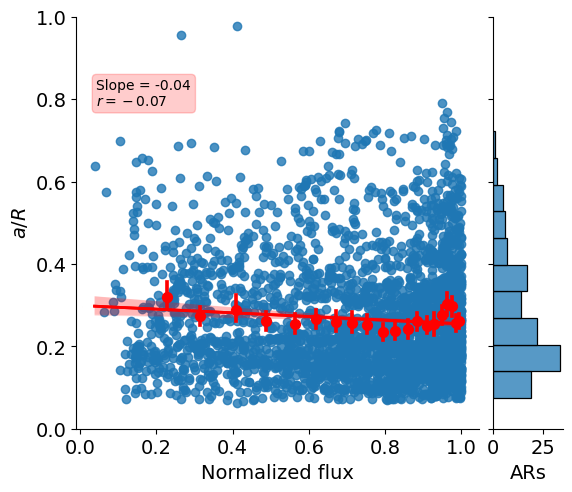

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

DFmm=DF2[DF2['AR'].isin(selars)]
plt.rcParams.update({'font.size': 14})


DF20=DF2.groupby(['AR','fint']).mean().reset_index()
# Calcular la pendiente y el coeficiente de correlación
x = DF20['fint']
y = DF20['fracaR']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

#DF2=DFmm.groupby(['AR','fint']).mean().reset_index()


# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=DF20, x="fint", y="fracaR", marginal_ticks=True)



# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=DF20, x="fint", y="fracaR", ax=g.ax_joint, line_kws={"color": "red", "linewidth": 2})
sns.regplot(data=DF20, x="fint", y="fracaR", ax=g.ax_joint, line_kws={"color": "red", "linewidth": 2},x_bins=20,color='red')

# Dibujar el regplot en el centro con 20 bins
#sns.regplot(data=DF2, x="fint", y="fracaR", ax=g.ax_joint,color='tab:orange', line_kws={"color": "orange", "linewidth": 2,'linestyle':'dashed'})


# Eliminar la marginal del eje x y mantener la del eje y
g.ax_marg_x.remove()  # Elimina la marginal superior
#sns.histplot(data=DF20[DF20['fint']>=0.9952], y="fracaR", ax=g.ax_marg_y, kde=False)
sns.histplot(data=DF20.loc[DF20.groupby("AR")["flux"].idxmax()], y="fracaR", ax=g.ax_marg_y, kde=False)
g.ax_marg_y.set_xlabel('ARs')
#sns.histplot(data=DF2[DF2['fint']>=0.9952], y="fracaR", ax=g.ax_marg_y, kde=False)
DF2.loc[DF2.groupby("AR")["flux"].idxmax()]

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.85, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

# Etiquetas de los ejes
g.ax_joint.set_xlabel('Normalized flux')
g.ax_joint.set_ylabel(r'$a/R$')
g.ax_joint.set_ylim(0,1)
x = DF20['fint']
y = DF20['fracaR']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(slope,r_value)

plt.savefig('./plots/aR.pdf',dpi=300)

In [13]:
DF2.groupby("AR")["flux"].idxmax()

AR
7982       16
8016       34
8040       54
8052       71
8056       87
         ... 
10900    2882
10971    2902
10987    2922
11007    2940
11024    2984
Name: flux, Length: 126, dtype: int64

-0.051077252039159284 -0.028870946414310424


<AxesSubplot: xlabel='fracaR', ylabel='N0'>

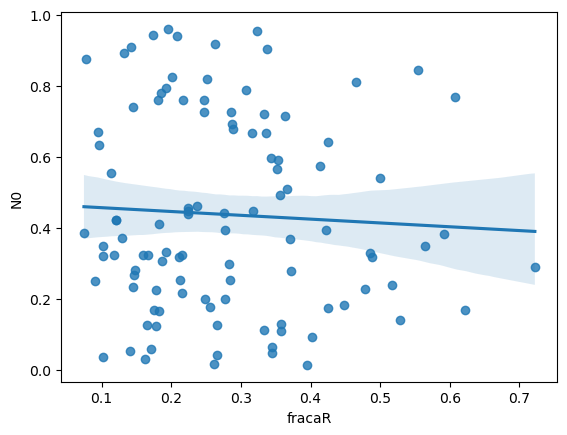

In [22]:



DF20=np.abs(DF2.loc[DF2.groupby("AR")["flux"].idxmax()])
DF20=DF20[DF20['N0']<1]
# Calcular la pendiente y el coeficiente de correlación
x = DF20['fracaR']
y = DF20['N0']
slope, intercept, r_value, p_value, std_err = linregress(np.log10(x), np.log10(y))
            
print(slope,r_value)


sns.regplot(data=DF20,x="fracaR",y='N0')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

DFmm=DF[DF['AR'].isin(selars)]
plt.rcParams.update({'font.size': 14})


DF20=DF.groupby(['AR','fint']).mean().reset_index()
# Calcular la pendiente y el coeficiente de correlación
x = DF20['fint']
y = DF20['fracaR']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

DF2=DFmm.groupby(['AR','fint']).mean().reset_index()


# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=DF20, x="fint", y="fracaR", marginal_ticks=True, 
                  ratio=2,height=8,space=0.1)



# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=DF20, x="fint", y="fracaR", ax=g.ax_joint, line_kws={"color": "red", "linewidth": 2})
sns.regplot(data=DF20, x="fint", y="fracaR", ax=g.ax_joint, line_kws={"color": "red", "linewidth": 2},x_bins=20,color='red')

# Dibujar el regplot en el centro con 20 bins
#sns.regplot(data=DF2, x="fint", y="fracaR", ax=g.ax_joint,color='tab:orange', line_kws={"color": "orange", "linewidth": 2,'linestyle':'dashed'})


# Eliminar la marginal del eje x y mantener la del eje y
g.ax_marg_x.remove()  # Elimina la marginal superior
#sns.histplot(data=DF20[DF20['fint']>=0.9952], y="fracaR", ax=g.ax_marg_y, kde=False)
sns.histplot(data=DF20.loc[DF20.groupby("AR")["flux"].idxmax()], y="fracaR", ax=g.ax_marg_y, kde=False)

#sns.histplot(data=DF2[DF2['fint']>=0.9952], y="fracaR", ax=g.ax_marg_y, kde=False)
DF2.loc[DF2.groupby("AR")["flux"].idxmax()]

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.15, 0.85, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))


g.ax_marg_y.set_xlabel('ARs')
g.ax_marg_y.axhline(DF20.loc[DF20.groupby("AR")["flux"].idxmax()]['fracaR'].mean(),linestyle='dashed')

# Etiquetas de los ejes
g.ax_joint.set_xlabel('Normalized flux')
g.ax_joint.set_ylabel(r'$a/R$')
g.ax_joint.set_ylim(0,1)
x = DF20['fint']
y = DF20['fracaR']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(slope,r_value)

plt.savefig('./plots/aR2.pdf',dpi=300)

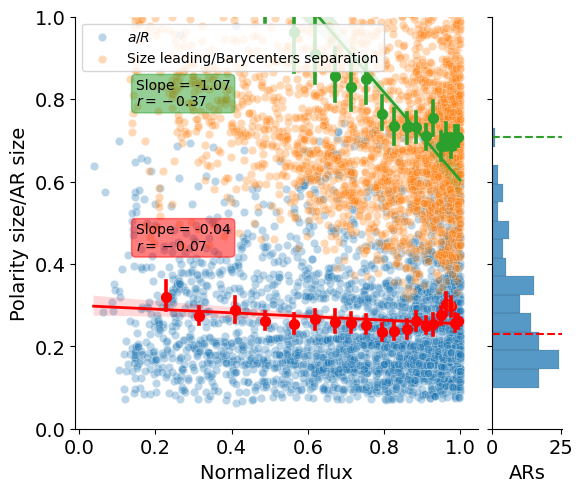

In [82]:

DFmm=DF[DF['AR'].isin(selars)]
plt.rcParams.update({'font.size': 14})


# Calcular la pendiente y el coeficiente de correlación
x = DF2['fint']
y = DF2['fracaR']
slope, intercept, r_value, p_value, std_err = linregress(x, y)



# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=DF2, x="fint", y="fracaR", marginal_ticks=True 
                 # ,ratio=3,height=8,space=0.1
                 )



# Dibujar el regplot en el centro con 20 bins
sns.scatterplot(data=DF2, x="fint", y="fracaR", ax=g.ax_joint,color='tab:blue',alpha=0.3,label=r'$a/R$')
sns.regplot(data=DF2, x="fint", y="fracaR", ax=g.ax_joint, line_kws={"color": "red", "linewidth": 2},x_bins=20,color='red')


sns.scatterplot(data=DF2, x="fint", y="fracsar", ax=g.ax_joint,color='tab:orange',alpha=0.3,label='Size leading/Barycenters separation')
sns.regplot(data=DF2, x="fint", y="fracsar", ax=g.ax_joint, line_kws={"color": "tab:green", "linewidth": 2},x_bins=20,color='tab:green')
# Dibujar el regplot en el centro con 20 bins
#sns.regplot(data=DF2, x="fint", y="fracaR", ax=g.ax_joint,color='tab:orange', line_kws={"color": "orange", "linewidth": 2,'linestyle':'dashed'})


# Eliminar la marginal del eje x y mantener la del eje y
g.ax_marg_x.remove()  # Elimina la marginal superior
#sns.histplot(data=DF20[DF20['fint']>=0.9952], y="fracaR", ax=g.ax_marg_y, kde=False)
sns.histplot(data=DF2.loc[DF2.groupby("AR")["flux"].idxmax()], y="fracaR", ax=g.ax_marg_y, binrange=(0.1,1),bins=20,
             kde=False)
#sns.histplot(data=DF2.loc[DF2.groupby("AR")["flux"].idxmax()], y="fracsar",color='tab:orange', binrange=(0.1,1),bins=20, 
#             ax=g.ax_marg_y, kde=False)

#sns.histplot(data=DF2[DF2['fint']>=0.9952], y="fracaR", ax=g.ax_marg_y, kde=False)
DF2.loc[DF2.groupby("AR")["flux"].idxmax()]

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.15, 0.5, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.5))


g.ax_marg_y.set_xlabel('ARs')
g.ax_marg_y.axhline(DF2.loc[DF2.groupby("AR")["flux"].idxmax()]['fracaR'].median(),linestyle='dashed',color='red')
g.ax_marg_y.axhline(DF2.loc[DF2.groupby("AR")["flux"].idxmax()]['fracsar'].median(),color='tab:green',linestyle='dashed')

# Etiquetas de los ejes
g.ax_joint.set_xlabel('Normalized flux')
g.ax_joint.set_ylabel(r'Polarity size/AR size')
g.ax_joint.set_ylim(0,1)
x = DF2['fint']
y = DF2['fracsar']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

g.ax_joint.legend(fontsize=10)


# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.15, 0.85, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='tab:green', alpha=0.5))



plt.savefig('./plots/aR3.pdf',dpi=300)

In [41]:
print(np.mean(DF2[DF2['fint']>=0.9952]['fracaR']),
      np.median(DF2[DF2['fint']>=0.9952]['fracaR']),
      np.std(DF2[DF2['fint']>=0.9952]['fracaR']),
      skew(DF2[DF2['fint']>=0.9952]['fracaR']))

0.25312779609387315 0.22443149039117982 0.11870960827864528 1.0142046357281516


# Separation of polarities

In [62]:
pixsize=1.98*0.725
DF2=DF2.assign(sepax=lambda x: 2*pixsize*x.R*np.sin(np.pi*x.gamma/180))
DF2['sar']=DF2['sar'].apply(lambda x: pixsize*x)


In [38]:
#ARS with error lower than 10%

DFx1=[]
for name in set(DF['AR'].values):
    DFx=DF2[(DF2['AR']==name) & (DF2['gamma']>0)]
    DFx1.append(DFx[np.abs((DFx['sar']-DFx['sepax'])/DFx['sepax']) <0.1])
    
DFx1=pd.concat(DFx1)

In [249]:
print(len(DFx1['AR'].values),len(set(DFx1['AR'].values)))

86 10


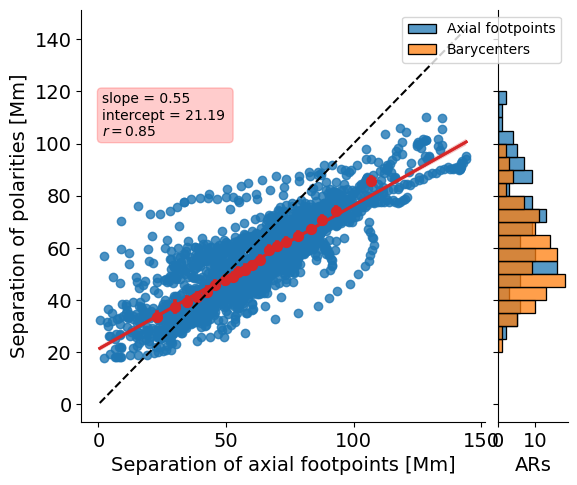

In [73]:
#DF2m=DF2[np.abs(DF2['N0'])<0.1]
#DF2m=DF2[DF2['gamma']>70]
DF2m=DF2

plt.rcParams.update({'font.size': 14})

# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=DF2m[DF2m['gamma']>0], x="sepax", y="sar", marginal_ticks=True,
                  #ratio=2,height=8,space=0.1
                 )

#sns.scatterplot(data=DF2m[DF2m['gamma']>0],x='asize',y='amsize',color='tab:blue', ax=g.ax_joint)

sns.regplot(data=DF2m[DF2m['gamma']>0],x='sepax',y='sar',color='tab:blue', ax=g.ax_joint,
            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'})


sns.regplot(data=DF2m[DF2m['gamma']>0],x='sepax',y='sar',color='tab:red',x_bins=20, ax=g.ax_joint,
            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'})

sns.lineplot(data=DF2m[DF2m['gamma']>0],x='sepax',y='sepax',linestyle='dashed', ax=g.ax_joint,color='black')
#plt.ylim(-200,1400)
g.ax_marg_x.remove()  # Elimina la marginal superior
sns.histplot(data=DF2m.loc[DF2m.groupby("AR")["flux"].idxmax()], y="sepax",binrange=(20,120),bins=20, 
             ax=g.ax_marg_y, kde=False,label='Axial footpoints')
sns.histplot(data=DF2m.loc[DF2m.groupby("AR")["flux"].idxmax()], y="sar",bins=20,binrange=(20,120),
             ax=g.ax_marg_y, kde=False,label='Barycenters')

#g.ax_marg_y.axhline(DF2[DF2['gamma']>0]['lsize'].mean(),color='red')
#g.ax_marg_y.axhline(DF2[DF2['gamma']>0]['fsize'].mean(),color='green')
g.ax_marg_y.set_xlabel('ARs')

# Calcular la pendiente y el coeficiente de correlación
x = DF2m[DF2m['gamma']>0]['sepax']
y = DF2m[DF2m['gamma']>0]['sar']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"slope = {slope:.2f}\nintercept = {intercept:.2f} \n$r = {r_value:.2f}$"
ax=g.ax_joint.text(0.05, 0.8, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))


#g.ax_joint.set_ylim(0,40)

legend=g.ax_marg_y.legend(fontsize=10)

# Rotar las etiquetas del legend
#for text in legend.get_texts():
#    text.set_rotation(45)  # Rotar 45 grados

#legend.get_frame().set_rotation(90)

g.ax_joint.set_ylabel('Separation of polarities [Mm]')
g.ax_joint.set_xlabel('Separation of axial footpoints [Mm]')

plt.savefig('./plots/SARAX.pdf',dpi=300)

# Size of the polarities

In [74]:
# Calcular la pendiente y el coeficiente de correlación
x = DF2['a']
y = DF2['fsize']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [75]:
DF2['fsize']=DF2['fsize'].apply(lambda x: pixsize*x)
DF2['lsize']=DF2['lsize'].apply(lambda x: pixsize*x)
DF2=DF2.assign(asize=lambda x: pixsize*x.a)
DF2=DF2.assign(amsize=lambda x: pixsize*x.am)



In [81]:
DF2=DF2.assign(amsize2=lambda x: (x.fsize+x.lsize)/2)

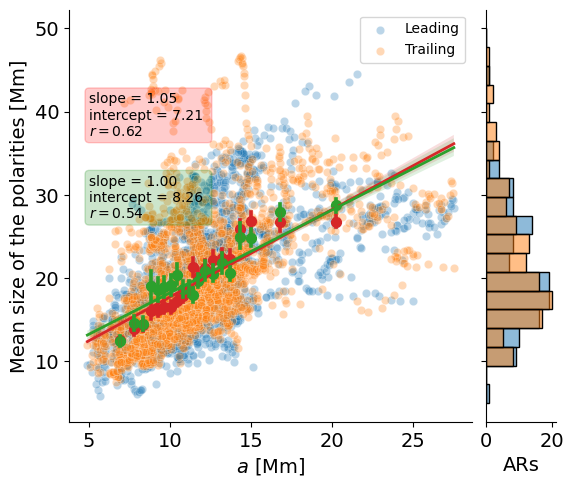

In [77]:

plt.rcParams.update({'font.size': 14})

# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=DF2[DF2['gamma']>0], x="asize", y="lsize", marginal_ticks=True,
                  #ratio=2,height=8,space=0.1
                 )

sns.scatterplot(data=DF2[DF2['gamma']>0],x='asize',y='lsize',color='tab:blue',alpha=0.3, ax=g.ax_joint,label='Leading')
sns.scatterplot(data=DF2[DF2['gamma']>0],x='asize',y='fsize',color='tab:orange',alpha=0.3, ax=g.ax_joint,label='Trailing')

sns.regplot(data=DF2[DF2['gamma']>0],x='asize',y='lsize',color='tab:red',x_bins=20, ax=g.ax_joint,
            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'})
sns.regplot(data=DF2[DF2['gamma']>0],x='asize',y='fsize',color='tab:green',x_bins=20, ax=g.ax_joint,
            line_kws={"color": "tab:green", "linewidth": 2,'linestyle':'solid'})

#plt.ylim(-200,1400)
g.ax_marg_x.remove()  # Elimina la marginal superior
sns.histplot(data=DF2.loc[DF2.groupby("AR")["flux"].idxmax()], y="lsize",binrange=(5,50),bins=20, 
             ax=g.ax_marg_y, kde=False,label='Axial axis',alpha=0.5)
sns.histplot(data=DF2.loc[DF2.groupby("AR")["flux"].idxmax()], y="fsize",bins=20,binrange=(5,50),
             ax=g.ax_marg_y, kde=False,label='Barycenters',alpha=0.5)

#g.ax_marg_y.axhline(DF2[DF2['gamma']>0]['lsize'].mean(),color='red')
#g.ax_marg_y.axhline(DF2[DF2['gamma']>0]['fsize'].mean(),color='green')
g.ax_marg_y.set_xlabel('ARs')

# Calcular la pendiente y el coeficiente de correlación
x = DF2[DF2['gamma']>0]['asize']
y = DF2[DF2['gamma']>0]['lsize']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"slope = {slope:.2f}\nintercept = {intercept:.2f} \n$r = {r_value:.2f}$"
ax=g.ax_joint.text(0.05, 0.8, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

# Calcular la pendiente y el coeficiente de correlación
x = DF2[DF2['gamma']>0]['asize']
y = DF2[DF2['gamma']>0]['fsize']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"slope = {slope:.2f}\nintercept = {intercept:.2f} \n$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.6, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='green', alpha=0.2))

g.ax_joint.legend(fontsize=10)

g.ax_joint.set_xlabel(r'$a$ [Mm]')
g.ax_joint.set_ylabel('Mean size of the polarities [Mm]')

plt.savefig('./plots/polarsize.pdf',dpi=300)

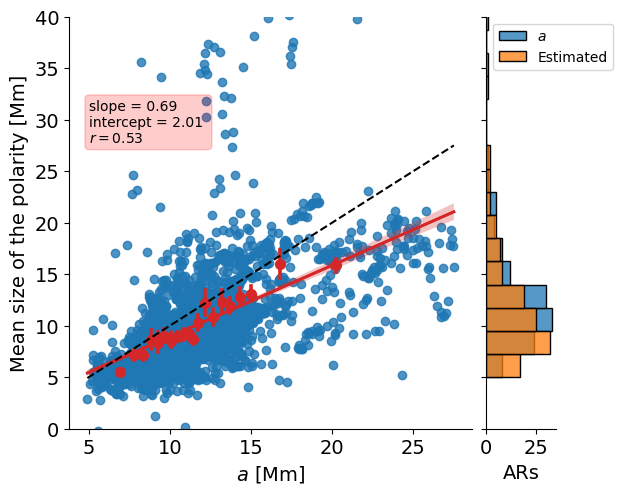

In [83]:
#DF2m=DF2[np.abs(DF2['N0'])<0.1]
#DF2m=DF2[DF2['gamma']>70]
DF2m=DF2

plt.rcParams.update({'font.size': 14})

# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=DF2m[DF2m['gamma']>0], x="asize", y="amsize", marginal_ticks=True,
                  #ratio=2,height=8,space=0.1
                 )

#sns.scatterplot(data=DF2m[DF2m['gamma']>0],x='asize',y='amsize',color='tab:blue', ax=g.ax_joint)

sns.regplot(data=DF2m[DF2m['gamma']>0],x='asize',y='amsize',color='tab:blue', ax=g.ax_joint,
            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'})


sns.regplot(data=DF2m[DF2m['gamma']>0],x='asize',y='amsize',color='tab:red',x_bins=20, ax=g.ax_joint,
            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'})

sns.lineplot(data=DF2m[DF2m['gamma']>0],x='asize',y='asize',color='black',linestyle='dashed', ax=g.ax_joint)
#plt.ylim(-200,1400)
g.ax_marg_x.remove()  # Elimina la marginal superior
sns.histplot(data=DF2m.loc[DF2m.groupby("AR")["flux"].idxmax()], y="asize",binrange=(5,50),bins=20, 
             ax=g.ax_marg_y, kde=False,label=r'$a$')
sns.histplot(data=DF2m.loc[DF2m.groupby("AR")["flux"].idxmax()], y="amsize",bins=20,binrange=(5,50),
             ax=g.ax_marg_y, kde=False,label='Estimated')

#g.ax_marg_y.axhline(DF2[DF2['gamma']>0]['lsize'].mean(),color='red')
#g.ax_marg_y.axhline(DF2[DF2['gamma']>0]['fsize'].mean(),color='green')
g.ax_marg_y.set_xlabel('ARs')

# Calcular la pendiente y el coeficiente de correlación
x = DF2m[DF2m['gamma']>0]['asize']
y = DF2m[DF2m['gamma']>0]['amsize']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"slope = {slope:.2f}\nintercept = {intercept:.2f} \n$r = {r_value:.2f}$"
ax=g.ax_joint.text(0.05, 0.8, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))


g.ax_joint.set_ylim(0,40)

legend=g.ax_marg_y.legend(fontsize=10)

# Rotar las etiquetas del legend
#for text in legend.get_texts():
#    text.set_rotation(45)  # Rotar 45 grados

#legend.get_frame().set_rotation(90)

g.ax_joint.set_xlabel(r'$a$ [Mm]')
g.ax_joint.set_ylabel('Mean size of the polarity [Mm]')

plt.savefig('./plots/polarsize2.pdf',dpi=300)

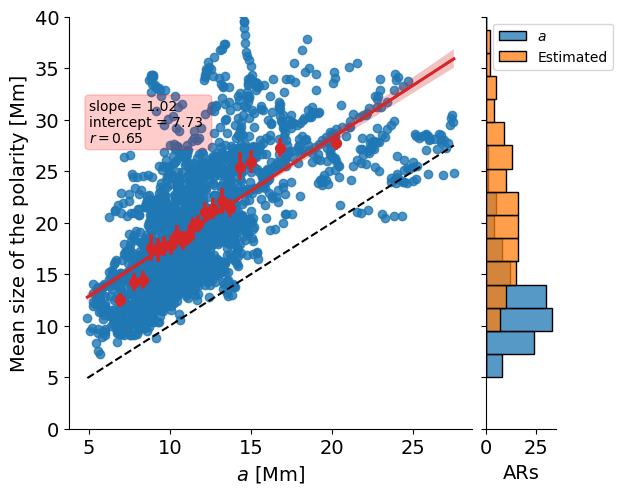

In [84]:
#DF2m=DF2[np.abs(DF2['N0'])<0.1]
#DF2m=DF2[DF2['gamma']>70]
DF2m=DF2

plt.rcParams.update({'font.size': 14})

# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=DF2m[DF2m['gamma']>0], x="asize", y="amsize2", marginal_ticks=True,
                  #ratio=2,height=8,space=0.1
                 )

#sns.scatterplot(data=DF2m[DF2m['gamma']>0],x='asize',y='amsize',color='tab:blue', ax=g.ax_joint)

sns.regplot(data=DF2m[DF2m['gamma']>0],x='asize',y='amsize2',color='tab:blue', ax=g.ax_joint,
            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'})


sns.regplot(data=DF2m[DF2m['gamma']>0],x='asize',y='amsize2',color='tab:red',x_bins=20, ax=g.ax_joint,
            line_kws={"color": "tab:red", "linewidth": 2,'linestyle':'solid'})

sns.lineplot(data=DF2m[DF2m['gamma']>0],x='asize',y='asize',color='black',linestyle='dashed', ax=g.ax_joint)
#plt.ylim(-200,1400)
g.ax_marg_x.remove()  # Elimina la marginal superior
sns.histplot(data=DF2m.loc[DF2m.groupby("AR")["flux"].idxmax()], y="asize",binrange=(5,50),bins=20, 
             ax=g.ax_marg_y, kde=False,label=r'$a$')
sns.histplot(data=DF2m.loc[DF2m.groupby("AR")["flux"].idxmax()], y="amsize2",bins=20,binrange=(5,50),
             ax=g.ax_marg_y, kde=False,label='Estimated')

#g.ax_marg_y.axhline(DF2[DF2['gamma']>0]['lsize'].mean(),color='red')
#g.ax_marg_y.axhline(DF2[DF2['gamma']>0]['fsize'].mean(),color='green')
g.ax_marg_y.set_xlabel('ARs')

# Calcular la pendiente y el coeficiente de correlación
x = DF2m[DF2m['gamma']>0]['asize']
y = DF2m[DF2m['gamma']>0]['amsize2']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"slope = {slope:.2f}\nintercept = {intercept:.2f} \n$r = {r_value:.2f}$"
ax=g.ax_joint.text(0.05, 0.8, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))


g.ax_joint.set_ylim(0,40)

legend=g.ax_marg_y.legend(fontsize=10)

# Rotar las etiquetas del legend
#for text in legend.get_texts():
#    text.set_rotation(45)  # Rotar 45 grados

#legend.get_frame().set_rotation(90)

g.ax_joint.set_xlabel(r'$a$ [Mm]')
g.ax_joint.set_ylabel('Mean size of the polarity [Mm]')

plt.savefig('./plots/polarsize1.pdf',dpi=300)

# Max flux plots

In [3]:
DF2=DF.groupby(['AR','fint']).mean().reset_index()

In [4]:
DF2=DF2.assign(cond1=DF2.a/(DF2.a+DF2.R))
DF2=DF2.assign(fracaR=lambda x: x.a/x.R)
DF2['gamma'] = 0

# Asignar el valor calculado solo a las filas que cumplen la condición (A > 10)
DF2.loc[DF2['da']>= DF2['cond1'], 'gamma'] = 180*np.arccos((DF2.R+DF2.a)*(1-DF2.da)/DF2.R)/np.pi

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
pixsize=1.98*0.725
DF2=DF2.assign(sepax=lambda x: 2*pixsize*x.R*np.sin(np.pi*x.gamma/180))
DF2['sar']=DF2['sar'].apply(lambda x: pixsize*x)

In [6]:
DF2m=DF2.loc[DF2.groupby("AR")["flux"].idxmax()]

# Take log of data
log_x = np.log10(DF2m[DF2m['sepax'] >0]['sepax'].values)
log_y = np.log10(DF2m[DF2m['sepax'] >0]['flux'].values)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Extract power-law exponent and prefactor
B0 = slope  # Power-law exponent
A0 = 10**intercept  # Prefactor (since intercept = log10(A))


# Compute predicted values
log_y_model = B0 * log_x + intercept
x_model = np.arange(25,140,10)
y_model = A0 * (x_model)**B0

print(B0)

# Take log of data
log_x = np.log10(DF2.loc[DF2.groupby("AR")["flux"].idxmax()]['sar'].values)
log_y = np.log10(DF2.loc[DF2.groupby("AR")["flux"].idxmax()]['flux'].values)

DF2.loc[DF2.groupby("AR")["flux"].idxmax()]


# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Extract power-law exponent and prefactor
B0 = slope  # Power-law exponent
A0 = 10**intercept  # Prefactor (since intercept = log10(A))


# Compute predicted values
log_y_model = B0 * log_x + intercept
x_model2 = np.arange(25,100,10)
y_model2 = A0 * (x_model2)**B0


print(B0)

1.0432588608457574
1.4168653593543634


In [38]:
DF2m=DF2.loc[DF2.groupby("AR")["flux"].idxmax()]

# Take log of data
x = DF2m[DF2m['sepax'] >0]['axf'].values
y = DF2m[DF2m['sepax'] >0]['flux'].values

# Perform linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(np.log10(x), np.log10(y))

# Extract power-law exponent and prefactor
B0 = slope1  # Power-law exponent
A0 = 10**intercept1  # Prefactor (since intercept = log10(A))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(r_value1,r_value)

0.9353218003037241 0.936601237402659


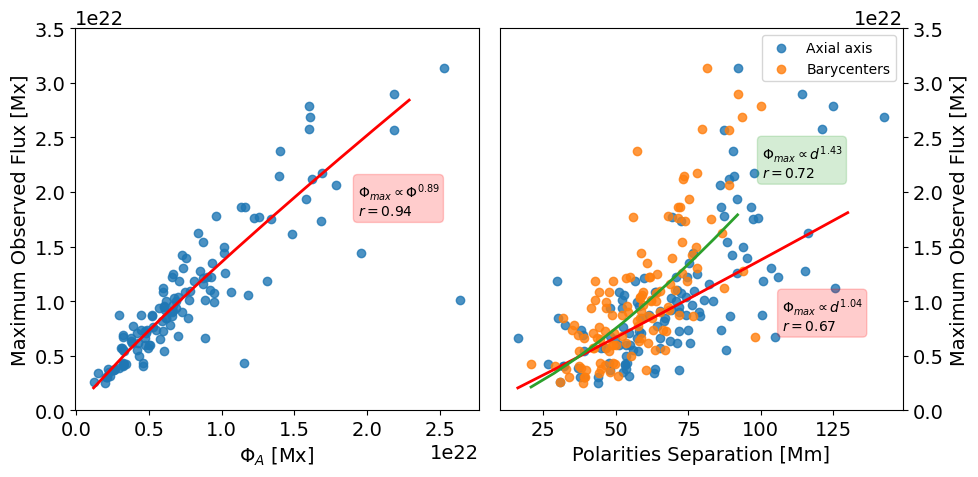

In [58]:
from scipy.stats import linregress


#DFmm=DF2[DF2['AR'].isin(selars)]
DF2m=DF2.loc[DF2.groupby("AR")["flux"].idxmax()]

plt.rcParams.update({'font.size': 14})
fig,axs=plt.subplots(1,2, figsize=(10,5))
sns.regplot(data=DF2.groupby('AR').max().abs(),x='axf',y='flux',ax=axs[0]
            , line_kws={"color": "red", "linewidth": 0}, fit_reg=False)
#sns.regplot(data=DFmm.groupby('AR').max().abs(),x='axf',y='flux',ax=axs[0]
#            , line_kws={"color": "red", "linewidth": 2})



# Take log of data
x = DF2m[DF2m['sepax'] >0]['axf'].values
y = DF2m[DF2m['sepax'] >0]['flux'].values

# Perform linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(np.log10(x), np.log10(y))

x_m = np.arange(x.min(),x.max(),(x.max()-x.min())/10)
y_m = (10**intercept1) * (x_m)**slope1

axs[0].plot(x_m,y_m,color="red",linewidth=2)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$\Phi_{{max}} \propto \Phi^{{0.89}}$\n$r = {r_value1:.2f}$"
axs[0].text(0.7, 0.6, textstr, transform=axs[0].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))


sns.regplot(data=DF2m[(DF2m['sepax'] >0)],x='sepax',y='flux',ax=axs[1]
            , line_kws={"color": "red", "linewidth": 2},label='Axial axis', fit_reg=False)
sns.regplot(data=DF2m[(DF2m['sepax'] >0)],x='sar',y='flux',ax=axs[1]
            , line_kws={"color": "green","linestyle":"solid", "linewidth": 2},label='Barycenters', fit_reg=False)
#
#sns.regplot(data=DF2[DF2['gamma']>0],x='sepax',y='flux',ax=axs[1]
#            , line_kws={"color": "red", "linewidth": 2})
#sns.regplot(data=DF2[DF2['gamma']>0],x='sar',y='flux',ax=axs[1]
#            , line_kws={"color": "red", "linewidth": 2})


# Calcular la pendiente y el coeficiente de correlación



# Take log of data
x = DF2m[DF2m['sepax'] >0]['sepax'].values
y = DF2m[DF2m['sepax'] >0]['flux'].values

# Perform linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(np.log10(x), np.log10(y))

x_m = np.arange(x.min(),x.max(),(x.max()-x.min())/10)
y_m = (10**intercept1) * (x_m)**slope1

axs[1].plot(x_m,y_m,color="red",linewidth=2)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$\Phi_{{max}} \propto d^{{1.04}}$\n$r = {r_value1:.2f}$"
axs[1].text(0.7, 0.3, textstr, transform=axs[1].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))


# Take log of data
x = DF2m[DF2m['sepax'] >0]['sar'].values
y = DF2m[DF2m['sepax'] >0]['flux'].values

# Perform linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(np.log10(x), np.log10(y))

x_m = np.arange(x.min(),x.max(),(x.max()-x.min())/10)
y_m = (10**intercept1) * (x_m)**slope1

axs[1].plot(x_m,y_m,color="tab:green",linewidth=2)

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$\Phi_{{max}} \propto d^{{1.43}}$\n$r = {r_value1:.2f}$"
axs[1].text(0.65, 0.7, textstr, transform=axs[1].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='tab:green', alpha=0.2))

# Mover el y-axis al lado derecho
axs[1].yaxis.set_label_position("right")  # Mueve la etiqueta (ylabel) a la derecha
axs[1].yaxis.tick_right() 

axs[0].set_xlabel(r"$\Phi_A$ [Mx]")
axs[0].set_ylabel(r"Maximum Observed Flux [Mx]")

for ax in axs:
    ax.set_ylim(0,3.5e22)

axs[1].set_xlabel(r"Polarities Separation [Mm]")
axs[1].set_ylabel(r"Maximum Observed Flux [Mx]")

axs[1].legend(fontsize=10)


fig.tight_layout()

fig.savefig('./plots/axf-saR.pdf',dpi=300)
#axs[1].set_yscale('log')



In [278]:
# Take log of data
x = DF2m[DF2m['sepax'] >0]['R'].values
y = DF2m[DF2m['sepax'] >0]['dz'].values


log_x = np.log10(x)
log_y = np.log10(y)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(log_x, log_y)

print(slope,r_value)
print(slope1,r_value1)

1.0363713612545515 0.9495755157785976
2.000043077737905 0.7168673627168138


In [40]:
# Take log of data
x = DF2m[DF2m['sepax'] >0]['sepax'].values
y = DF2m[DF2m['sepax'] >0]['flux'].values


log_x = np.log10(x)
log_y = np.log10(y)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(log_x, log_y)


print(r_value,r_value1)
# Extract power-law exponent and prefactor
B0 = slope1  # Power-law exponent
A0 = 10**intercept1  # Prefactor (since intercept = log10(A))

lin_mod=slope*x+intercept
log_mod=A0*x**B0

# Estimate residuals
residuals1 = log_y - log_mod
residuals = y - lin_mod

# Compute chi-square (assuming equal uncertainties)
chi2 = np.sum(residuals**2)
chi21 = np.sum(residuals1**2)

print(chi2/chi21)

0.7064402809247234 0.6703397027540883
0.18852800945145876


In [31]:
chi2/chi21

0.14121173234885834

In [33]:
# Take log of data
log_x = np.log10(DF2[(DF2['fint']>=0.9952) & (DF2['sepax'] >0)]['sepax'].values)
log_y = np.log10(DF2[(DF2['fint']>=0.9952) & (DF2['sepax'] >0)]['flux'].values)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Extract power-law exponent and prefactor
B0 = slope  # Power-law exponent
A0 = 10**intercept  # Prefactor (since intercept = log10(A))


# Compute predicted values
log_y_model = B0 * log_x + intercept
y_model = A0 * (10**log_x)**B0

# Estimate residuals
residuals = log_y - y_model

# Compute chi-square (assuming equal uncertainties)
chi2 = np.sum(residuals**2)

# Reduced chi-square (assuming N points and 2 free parameters)
N = len(log_x)
dof = N - 2  # Degrees of freedom
chi2_red = chi2 / dof if dof > 0 else np.nan

# Print results
print(f"Power-law exponent (B): {B0:.3f}")
print(f"Prefactor (A): {A0:.3f}")
print(f"Chi-square: {chi2:.3f}")
print(f"Reduced Chi-square: {chi2_red:.3f}")

# Take log of data
log_x = np.log10(DF2[(DF2['fint']>=0.9952) & (DF2['sepax'] >0)]['sar'].values)
log_y = np.log10(DF2[(DF2['fint']>=0.9952) & (DF2['sepax'] >0)]['flux'].values)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Extract power-law exponent and prefactor
B1 = slope  # Power-law exponent
A1 = 10**intercept  # Prefactor (since intercept = log10(A))


# Compute predicted values
log_y_model = B1 * log_x + intercept

# Estimate residuals
residuals = log_y - log_y_model

# Compute chi-square (assuming equal uncertainties)
chi2 = np.sum(residuals**2)

# Reduced chi-square (assuming N points and 2 free parameters)
N = len(log_x)
dof = N - 2  # Degrees of freedom
chi2_red = chi2 / dof if dof > 0 else np.nan

# Print results
print(f"Power-law exponent (B): {B0:.3f}")
print(f"Prefactor (A): {A0:.3f}")
print(f"Chi-square: {chi2:.3f}")
print(f"Reduced Chi-square: {chi2_red:.3f}")

Power-law exponent (B): 1.225
Prefactor (A): 51824448449434869760.000
Chi-square: 14201012194508055455248858099245265421967818752.000
Reduced Chi-square: 116401739299246353917625322125574457742327808.000
Power-law exponent (B): 1.225
Prefactor (A): 51824448449434869760.000
Chi-square: 3.091
Reduced Chi-square: 0.025


# Twist plots

In [373]:
DF=DF.assign(TotTw = lambda x: np.abs(x.N0*x.axf**2))

In [392]:
import numpy as np
from scipy.integrate import dblquad



def voltor(R, r, z0):
    """
    Calcula el volumen del semitoro por encima del plano z = z0.

    Parámetros:
        R (float): Radio mayor del toro.
        r (float): Radio menor del tubo.
        z0 (float): Altura del plano de corte.

    Retorna:
        float: Fracción del volumen total por encima del plano z = z0.
    """

    voltot=(np.pi**2)*(R)*r**2

    # Límites de integración para phi (0 a 2pi) y r (0 a r)
    phi_limites = (0, 2 * np.pi)
    r_limites = (0, r)
    # Función a integrar
    def integrando(phi, r_val):
        # Calculamos el denominador
        denominador = R + r_val * np.cos(phi)
        # Verificamos que z0 esté dentro del rango válido
        if np.abs(z0 / denominador) > 1:
            return 0  # Fuera del rango, contribución nula
        # Calculamos theta_min
        theta_min = np.arcsin(z0 / denominador)
        # Definimos el integrando
        return (R + r_val * np.cos(phi)) * r_val * (np.pi - theta_min)

    # Aproximación numérica de la integral
    resultado, error = dblquad(integrando, r_limites[0], r_limites[1], lambda x: phi_limites[0], lambda x: phi_limites[1])

    # Mostramos el resultado
 #   print(f"Volumen sobre el plano z = {z0}: {resultado/voltot}")
 #   print(f"Error estimado: {error}")
    
    return resultado/voltot

In [393]:
DFx1=DF.loc[DF.groupby("AR")["flux"].idxmax()]

In [396]:
DFx1=DFx1.assign(z0 = lambda x: (1-x.da)*(x.R+x.a))

In [400]:
DFx1['fraccion_volumen'] = DFx1.apply(lambda row: voltor(row['R'], row['a'], row['z0']), axis=1)

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
 

In [401]:
DFx1=DFx1.assign(FacTW = lambda x: np.abs(x.N0)*x.fraccion_volumen)

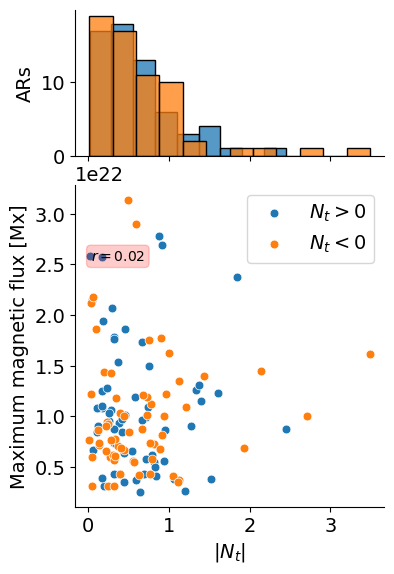

In [426]:
DFmm=DF2[DF2['AR'].isin(selars)]
DF2m=DF2.loc[DF2.groupby("AR")["flux"].idxmax()]
plt.rcParams.update({'font.size': 14})


# Calcular la pendiente y el coeficiente de correlación
x = np.abs(DFx1['N0'])
y = DFx1['flux']
slope, intercept, r_value, p_value, std_err = linregress(x, y)


# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=np.abs(DFx1), x="N0", y="flux", marginal_ticks=True,ratio=2)


sns.scatterplot(data=DFx1[DFx1['N0']>0], x="N0",ax=g.ax_joint, y="flux",color='tab:blue',s=40,label=r'$N_t > 0$')
sns.scatterplot(data=np.abs(DFx1[DFx1['N0']<0]), x="N0",ax=g.ax_joint, y="flux",color='tab:orange',s=40,label=r'$N_t < 0$')


# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.8, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

g.ax_marg_y.remove()  # Elimina la marginal superior
sns.histplot(data=DFx1[DFx1['N0']>0], x="N0", ax=g.ax_marg_x, kde=False)
sns.histplot(data=np.abs(DFx1[DFx1['N0']<0]), x="N0", ax=g.ax_marg_x, kde=False)


#g.ax_marg_y.legend()
# Etiquetas de los ejes
g.ax_joint.set_xlabel(r'$|N_t|$')
g.ax_joint.set_ylabel('Maximum magnetic flux [Mx]')

g.ax_marg_x.set_ylabel('ARs')

plt.savefig('./plots/flux-nt.pdf',dpi=300)

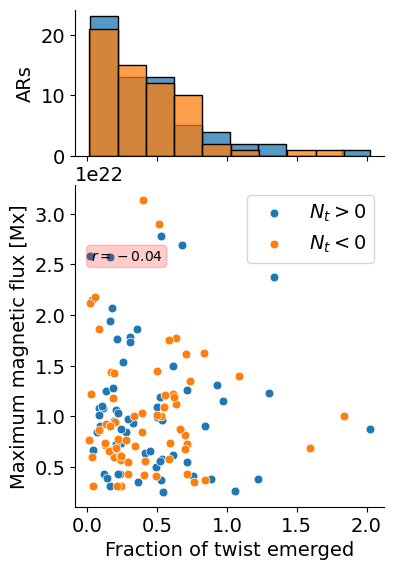

In [425]:
# Calcular la pendiente y el coeficiente de correlación
x = np.abs(DFx1['FacTW'])
y = DFx1['flux']
slope, intercept, r_value, p_value, std_err = linregress(x, y)


# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=np.abs(DFx1), x="FacTW", y="flux", marginal_ticks=True,ratio=2)


sns.scatterplot(data=DFx1[DFx1['N0']>0], x="FacTW",ax=g.ax_joint, y="flux",color='tab:blue',s=40,label=r'$N_t > 0$')
sns.scatterplot(data=np.abs(DFx1[DFx1['N0']<0]), x="FacTW",ax=g.ax_joint, y="flux",color='tab:orange',s=40,label=r'$N_t < 0$')


# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.8, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))

g.ax_marg_y.remove()  # Elimina la marginal superior
sns.histplot(data=DFx1[DFx1['N0']>0], x="FacTW", ax=g.ax_marg_x, kde=False)
sns.histplot(data=np.abs(DFx1[DFx1['N0']<0]), x="FacTW", ax=g.ax_marg_x, kde=False)


#g.ax_marg_y.legend()
# Etiquetas de los ejes
g.ax_joint.set_xlabel(r'Fraction of twist emerged')
g.ax_joint.set_ylabel('Maximum magnetic flux [Mx]')

g.ax_marg_x.set_ylabel('ARs')

plt.savefig('./plots/flux-fracnt.pdf',dpi=300)

In [378]:
DF=DF.assign(FracTw = lambda x: np.abs(x.da*x.N0*x.axf**2))

In [378]:
DF=DF.assign(FracTwN = lambda x: np.abs(x.da*x.N0*x.axf**2))

(0.0, 1.0)

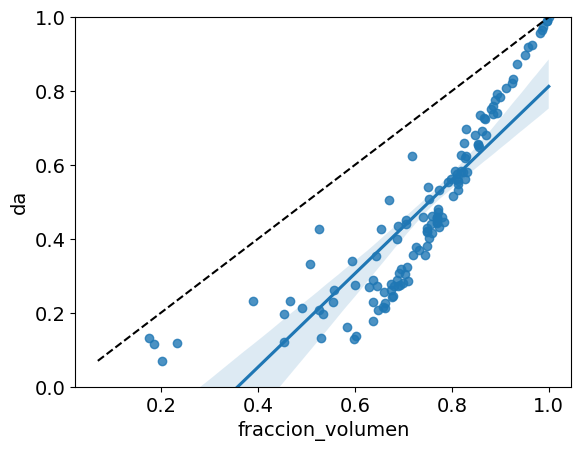

In [409]:
sns.regplot(data=DFx1,x='fraccion_volumen',y='da')
sns.lineplot(data=DFx1,x='da',y='da',linestyle='dashed',color='black')

plt.ylim(0,1)

<AxesSubplot: xlabel='fraccion_volumen', ylabel='N0'>

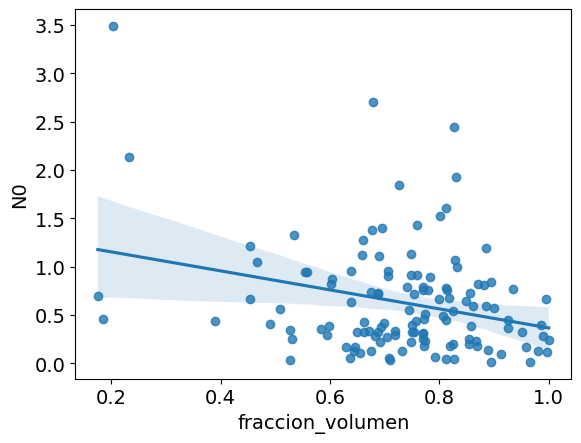

In [414]:
sns.regplot(data=np.abs(DFx1),x='fraccion_volumen',y='N0')
#sns.lineplot(data=DFx1,x='N0',y='N0',linestyle='dashed',color='black')



<AxesSubplot: xlabel='FacTW', ylabel='N0'>

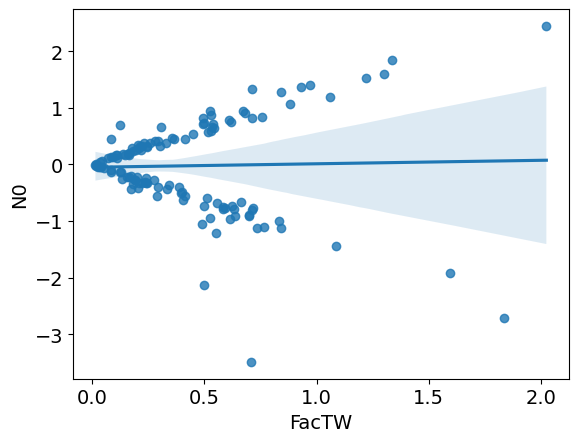

In [412]:
sns.regplot(data=DFx1,x='FacTW',y='N0')
#sns.lineplot(data=DFx1,x='da',y='da',linestyle='dashed',color='black')



<AxesSubplot: xlabel='FracTw', ylabel='Count'>

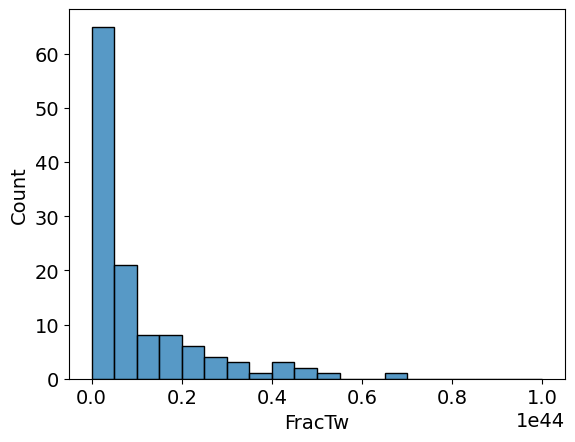

In [386]:
sns.histplot(data=DF.groupby('AR').mean(),x='FracTw',binrange=(0,1e44),bins=20)


<AxesSubplot: xlabel='FracTw', ylabel='Count'>

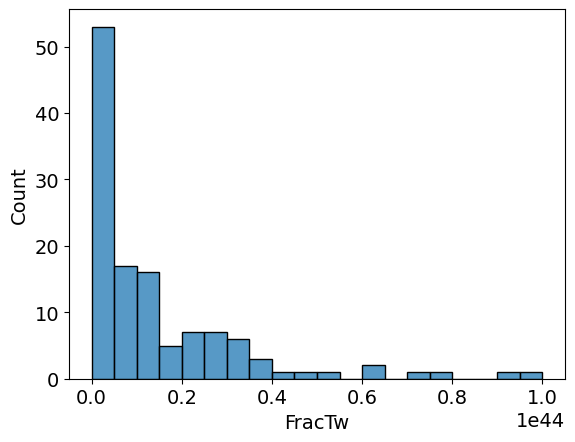

In [387]:
sns.histplot(data=DF.groupby('AR').max(),x='FracTw',binrange=(0,1e44),bins=20)

<AxesSubplot: xlabel='FracTw', ylabel='sar'>

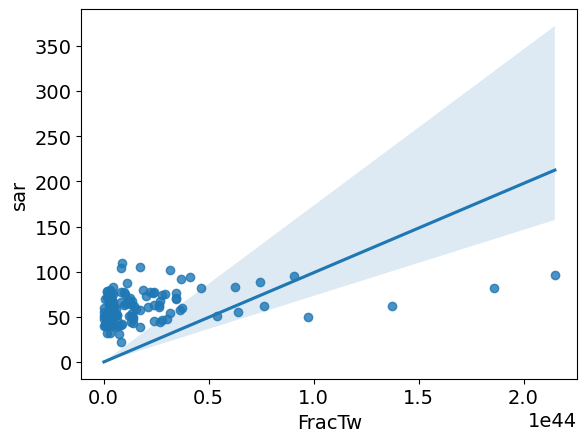

In [389]:
sns.regplot(data=DF.groupby('AR').max(),x='FracTw')

In [ ]:
sns.histplot(data=DF.groupby('AR').max(),x='FracTw',binrange=(0,2e44),bins=20)

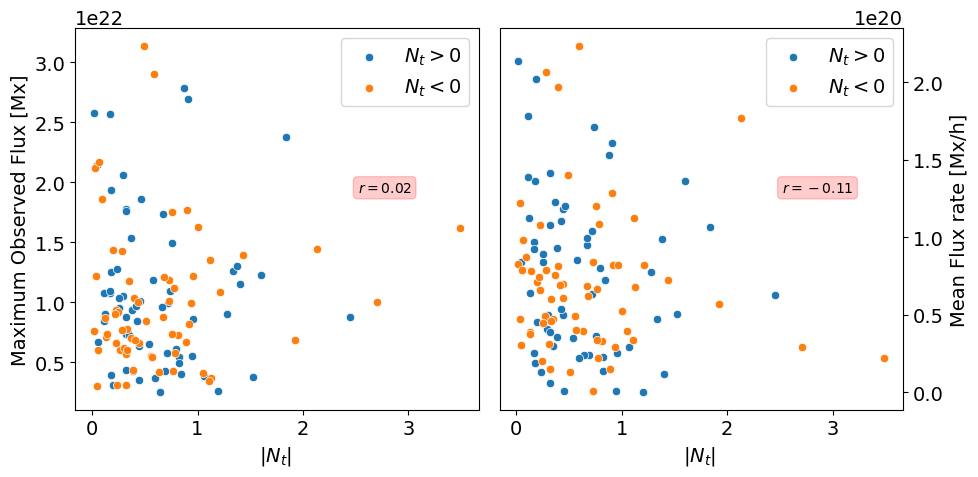

In [37]:
from scipy.stats import linregress


DFmm=DF2[DF2['AR'].isin(selars)]
DF2m=DFx1

plt.rcParams.update({'font.size': 14})
fig,axs=plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=DF2m[DF2m['N0']>0].abs(),x='N0',y='flux',ax=axs[0],label=r'$N_t > 0$')
sns.scatterplot(data=DF2m[DF2m['N0']<0].abs(),x='N0',y='flux',ax=axs[0],label=r'$N_t < 0$')

            #, line_kws={"color": "red", "linewidth": 0})
#sns.regplot(data=DFmm.groupby('AR').max().abs(),x='axf',y='flux',ax=axs[0]
#            , line_kws={"color": "red", "linewidth": 2})


# Calcular la pendiente y el coeficiente de correlación
x = DF2.groupby('AR').max().abs()['N0']
y = DF2.groupby('AR').max().abs()['flux']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
#textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
textstr = f"$r = {r_value:.2f}$"

axs[0].text(0.7, 0.6, textstr, transform=axs[0].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))


DFmm=DF2[DF2['AR'].isin(selars)]
DF2m=DF2.loc[DF2.groupby("AR")["flux"].idxmax()]

sns.scatterplot(data=DF2[DF2['N0']>0].groupby('AR').mean().abs(),x='N0',y='frate',ax=axs[1],label=r'$N_t > 0$')
sns.scatterplot(data=DF2[DF2['N0']<0].groupby('AR').mean().abs(),x='N0',y='frate',ax=axs[1],label=r'$N_t < 0$')

            #, line_kws={"color": "red", "linewidth": 0})
#sns.regplot(data=DFmm.groupby('AR').max().abs(),x='axf',y='flux',ax=axs[0]
#            , line_kws={"color": "red", "linewidth": 2})


# Calcular la pendiente y el coeficiente de correlación
x = DF2.groupby('AR').mean().abs()['N0']
y = DF2.groupby('AR').mean().abs()['frate']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
#textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
textstr = f"$r = {r_value:.2f}$"

axs[1].text(0.7, 0.6, textstr, transform=axs[1].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))



# Mover el y-axis al lado derecho
axs[1].yaxis.set_label_position("right")  # Mueve la etiqueta (ylabel) a la derecha
axs[1].yaxis.tick_right() 

axs[0].set_xlabel(r"$|N_t|$ ")
axs[0].set_ylabel(r"Maximum Observed Flux [Mx]")


axs[1].set_xlabel(r"|$N_t|$ ")
axs[1].set_ylabel(r"Mean Flux rate [Mx/h]")

axs[1].legend()
axs[0].legend()


fig.tight_layout()
fig.savefig('./plots/nt.pdf',dpi=300)


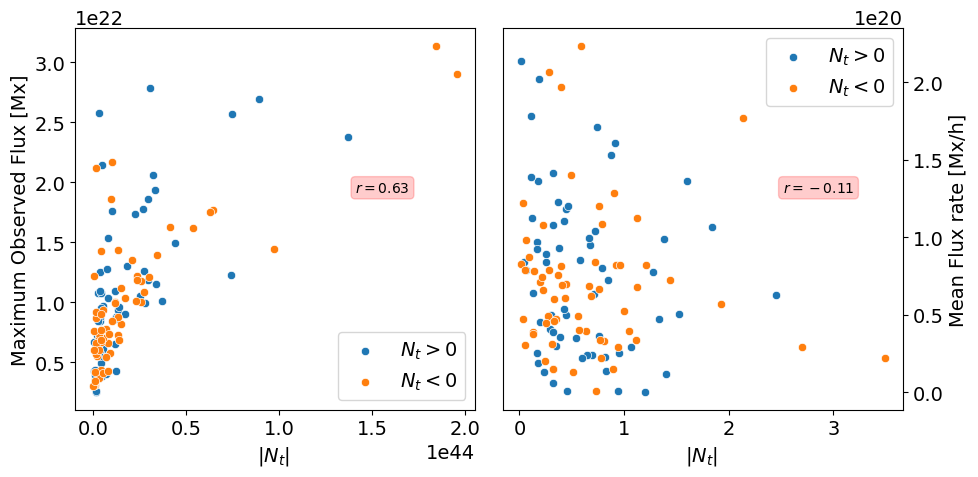

In [36]:
from scipy.stats import linregress


DFmm=DF2[DF2['AR'].isin(selars)]
DF2m=DF2.loc[DF2.groupby("AR")["flux"].idxmax()]

plt.rcParams.update({'font.size': 14})
fig,axs=plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=DF2m[DF2m['N0']>0].abs(),x='helipar',y='flux',ax=axs[0],label=r'$N_t > 0$')
sns.scatterplot(data=DF2m[DF2m['N0']<0].abs(),x='helipar',y='flux',ax=axs[0],label=r'$N_t < 0$')

            #, line_kws={"color": "red", "linewidth": 0})
#sns.regplot(data=DFmm.groupby('AR').max().abs(),x='axf',y='flux',ax=axs[0]
#            , line_kws={"color": "red", "linewidth": 2})


# Calcular la pendiente y el coeficiente de correlación
x = DF2.groupby('AR').max().abs()['helipar']
y = DF2.groupby('AR').max().abs()['flux']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
#textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
textstr = f"$r = {r_value:.2f}$"

axs[0].text(0.7, 0.6, textstr, transform=axs[0].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))


DFmm=DF2[DF2['AR'].isin(selars)]
DF2m=DF2.loc[DF2.groupby("AR")["flux"].idxmax()]

sns.scatterplot(data=DF2[DF2['N0']>0].groupby('AR').mean().abs(),x='N0',y='frate',ax=axs[1],label=r'$N_t > 0$')
sns.scatterplot(data=DF2[DF2['N0']<0].groupby('AR').mean().abs(),x='N0',y='frate',ax=axs[1],label=r'$N_t < 0$')

            #, line_kws={"color": "red", "linewidth": 0})
#sns.regplot(data=DFmm.groupby('AR').max().abs(),x='axf',y='flux',ax=axs[0]
#            , line_kws={"color": "red", "linewidth": 2})


# Calcular la pendiente y el coeficiente de correlación
x = DF2.groupby('AR').mean().abs()['N0']
y = DF2.groupby('AR').mean().abs()['frate']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Agregar la pendiente y el coeficiente de correlación al gráfico
#textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
textstr = f"$r = {r_value:.2f}$"

axs[1].text(0.7, 0.6, textstr, transform=axs[1].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='red', alpha=0.2))



# Mover el y-axis al lado derecho
axs[1].yaxis.set_label_position("right")  # Mueve la etiqueta (ylabel) a la derecha
axs[1].yaxis.tick_right() 

axs[0].set_xlabel(r"$|N_t|$ ")
axs[0].set_ylabel(r"Maximum Observed Flux [Mx]")


axs[1].set_xlabel(r"|$N_t|$ ")
axs[1].set_ylabel(r"Mean Flux rate [Mx/h]")

axs[1].legend()
axs[0].legend()


fig.tight_layout()

In [34]:
DF2=DF2.assign(helitot= lambda x: x.N0*x.axf**2)
DF2=DF2.assign(helipar= lambda x: x.da*x.N0*x.axf**2)

In [61]:
DF2[DF2['fint']>=0.9952]['sar']

34      3.277797e+09
71      4.201291e+09
87      4.451243e+09
107     3.856946e+09
127     8.642252e+09
            ...     
2940    4.409728e+09
2981    6.653860e+09
2982    6.515294e+09
2983    6.606311e+09
2984    6.616254e+09
Name: sar, Length: 126, dtype: float64

In [89]:
print(np.mean(DF20[DF20['fint']>=0.9952]['gamma']),
      np.median(DF20[DF20['fint']>=0.9952]['gamma']),
      np.std(DF20[DF20['fint']>=0.9952]['gamma']),
      skew(DF20[DF20['fint']>=0.9952]['gamma']))

47.38723907995304 48.065966792859236 17.463614015463968 0.27906600527545117


In [77]:
DF[DF['AR']==ars]

mag        da      alpha          a          R        N0           axf  \
1362   0.0  0.376633  14.125933   8.786335  39.234887  0.758635  1.020567e+22   
1363   2.0  0.393110  14.052363   8.951014  39.234887  0.758635  1.020567e+22   
1364   4.0  0.403946  13.846085   9.100398  39.234887  0.758635  1.020567e+22   
1365   6.0  0.417614  13.808707   9.214417  39.234887  0.758635  1.020567e+22   
1366   8.0  0.425479  13.350873   9.243287  39.234887  0.758635  1.020567e+22   
1367  10.0  0.436340  12.876471   9.294117  39.234887  0.758635  1.020567e+22   
1368  12.0  0.450709  12.407974   9.397348  39.234887  0.758635  1.020567e+22   
1369  14.0  0.464404  11.991315   9.585180  39.234887  0.758635  1.020567e+22   
1370  16.0  0.474848  11.506820   9.706569  39.234887  0.758635  1.020567e+22   
1371  18.0  0.484919  11.450016  10.010018  39.234887  0.758635  1.020567e+22   
1372  20.0  0.499503  10.849744   9.895091  39.234887  0.758635  1.020567e+22   
1373  22.0  0.515584  10.193517   9.466791  39.234887  0.758635  1.020567e+22   
1374  24.0  0.531126   9.924881   9.163116  39.234887  0.758635  1.020567e+22   
1375  26.0  0.544875  10.135576   9.264001  39.234887  0.758635  1.020567e+22   
1376  28.0  0.557455  10.618714   9.669078  39.234887  0.758635  1.020567e+22   
1377  30.0  0.573337  10.957481  10.083619  39.234887  0.758635  1.020567e+22   
1378  32.0  0.586702  11.193452  10.465242  39.234887  0.758635  1.020567e+22   

             xc         yc     alphab  ...       sfol         flead  \
1362  72.594172  49.087763  10.179135  ...  16.173495  1.076421e+22   
1363  72.149732  48.419539   9.911114  ...  15.760784  1.108568e+22   
1364  71.495325  47.934540  10.004850  ...  15.351920  1.131080e+22   
1365  70.976906  47.559003  10.058295  ...  15.199378  1.155828e+22   
1366  70.735336  47.409154  10.020163  ...  15.079086  1.178212e+22   
1367  70.862063  47.199741   9.590472  ...  15.158270  1.187594e+22   
1368  70.969174  46.868258   9.395643  ...  15.025563  1.202248e+22   
1369  70.954282  46.584828   9.233503  ...  15.134362  1.188637e+22   
1370  70.993349  46.304578   9.142664  ...  14.987646  1.207166e+22   
1371  70.839595  46.132545   8.850440  ...  14.796485  1.189305e+22   
1372  71.251244  45.566601   8.941230  ...  15.580681  1.203647e+22   
1373  72.178693  44.688064   8.626417  ...  16.258291  1.255392e+22   
1374  73.432086  43.732130   8.421230  ...  17.626337  1.305870e+22   
1375  74.519711  42.757390   8.063987  ...  18.689072  1.349506e+22   
1376  75.712080  41.917876   6.982052  ...  19.105543  1.406648e+22   
1377  76.269548  41.343478   6.021964  ...  18.640730  1.436768e+22   
1378  76.696073  40.926521   4.973693  ...  17.631177  1.482197e+22   

              ffol     ratio       rot      rotb     absalp    absalpb  \
1362  1.426570e+22  3.946798 -0.026635 -0.096202  14.125933  10.179135   
1363  1.470367e+22  4.141249 -0.046641 -0.029047  14.052363   9.911114   
1364  1.520156e+22  3.841235 -0.040609  0.024530  13.846085  10.004850   
1365  1.556471e+22  3.750412 -0.082535  0.002552  13.808707  10.058295   
1366  1.579005e+22  3.330710 -0.155373 -0.077970  13.350873  10.020163   
1367  1.571674e+22  3.285998 -0.157150 -0.104087  12.876471   9.590472   
1368  1.554682e+22  3.012331 -0.147526 -0.059495  12.407974   9.395643   
1369  1.541967e+22  2.757812 -0.150192 -0.042163  11.991315   9.233503   
1370  1.534300e+22  2.364156 -0.090217 -0.063844  11.506820   9.142664   
1371  1.513941e+22  2.599576 -0.109513 -0.033572  11.450016   8.850440   
1372  1.538650e+22  1.908515 -0.209416 -0.037337  10.849744   8.941230   
1373  1.558682e+22  1.567100 -0.154144 -0.086667  10.193517   8.626417   
1374  1.581364e+22  1.503652 -0.009657 -0.093738   9.924881   8.421230   
1375  1.599658e+22  2.071589  0.115639 -0.239863  10.135576   8.063987   
1376  1.578107e+22  3.636662  0.136984 -0.340337  10.618714   6.982052   
1377  1.546885e+22  4.935518  0.095790 -0.334727  10.957481   6.021964   
1378  1.490

In [6]:
DF=DF.replace({'fint': 0}, 0.1)

In [7]:
DF=DF.assign(slead=DF.MSP)
DF=DF.assign(sfol=DF.MSN)
DF.loc[DF['lead']==-1,'slead']=DF.loc[DF['lead']==-1,'MSN']
DF.loc[DF['lead']==-1,'sfol']=DF.loc[DF['lead']==-1,'MSP']

In [8]:
DF=DF.assign(flead=DF.fluxp)
DF=DF.assign(ffol=DF.fluxn)
DF.loc[DF['lead']==-1,'flead']=DF.loc[DF['lead']==-1,'fluxn']
DF.loc[DF['lead']==-1,'ffol']=DF.loc[DF['lead']==-1,'fluxp']

In [9]:
DF.loc[DF['lead']==1][['a','fluxp','fluxn','flead','ffol']]

a         fluxp         fluxn         flead          ffol
0     6.537552  1.283596e+21  1.444639e+21  1.283596e+21  1.444639e+21
1     6.548038  1.553186e+21  1.644634e+21  1.553186e+21  1.644634e+21
2     6.283701  1.892964e+21  1.737642e+21  1.892964e+21  1.737642e+21
3     6.213070  2.172191e+21  1.935104e+21  2.172191e+21  1.935104e+21
4     6.087542  2.390996e+21  1.965392e+21  2.390996e+21  1.965392e+21
...        ...           ...           ...           ...           ...
2939  4.414840  4.575840e+21  4.639889e+21  4.575840e+21  4.639889e+21
2940  4.462007  4.907523e+21  4.721330e+21  4.907523e+21  4.721330e+21
2941  4.609506  5.238503e+21  5.241356e+21  5.238503e+21  5.241356e+21
2942  4.997987  5.624871e+21  5.441995e+21  5.624871e+21  5.441995e+21
2943  5.222522  5.667704e+21  5.331152e+21  5.667704e+21  5.331152e+21

[1499 rows x 5 columns]

In [10]:
DF2.loc[DF2['AR'].isin(DF2.loc[DF2['day'] == 5,'AR'].unique().tolist())]

NameError: name 'DF2' is not defined

# Group by normalized flux

In [3]:
DF2=DF.groupby(['AR','fint']).mean().reset_index()
DF2['alpha']=DF['alpha'].apply(lambda x: x*180/np.pi)

day  4 :  0.46218243674294374  , 0.562750395696629 ,  71
day  5 :  0.394100980954747  , 0.4951929566956799 ,  24
da > 0.7 :  0.8064024399549227  , 0.7993466281814354 ,  36


Text(0.05, 0.95, 'Slope = 0.81\n$r = 0.80$')

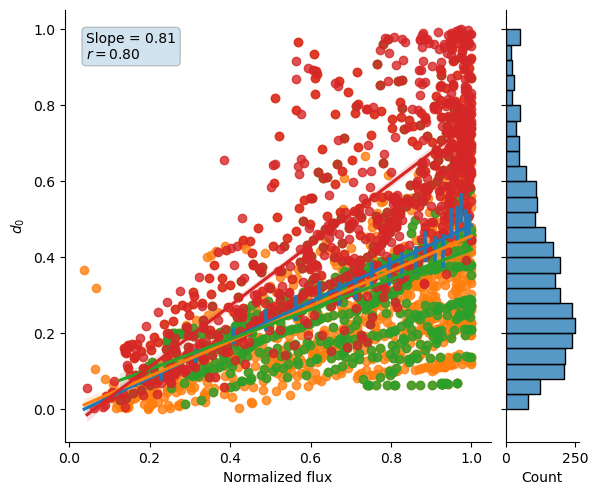

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calcular la pendiente y el coeficiente de correlación
x = DF2['fint']
y = DF2['da']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=DF2, x="fint", y="da", marginal_ticks=True)

# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=DF2, x="fint", y="da", ax=g.ax_joint, x_bins=20)

# Eliminar la marginal del eje x y mantener la del eje y
g.ax_marg_x.remove()  # Elimina la marginal superior
sns.histplot(data=DF2, y="da", ax=g.ax_marg_y, kde=False)

for i in [4,5]:
    DFxx=DF2.loc[DF2['AR'].isin(DF2.loc[DF2['day'] == i,'AR'].unique().tolist())]
    
    # Dibujar el regplot en el centro con 20 bins
    sns.regplot(data=DFxx, x="fint", y="da", ax=g.ax_joint)
    # Calcular la pendiente y el coeficiente de correlación
    x = DFxx['fint']
    y = DFxx['da']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print('day ',i, ': ' ,slope,' ,',r_value,', ',len(DF2.loc[DF2['day'] >= i,'AR'].unique().tolist()))
    
for i in [0.7]:
    DFxx=DF2.loc[DF2['AR'].isin(DF2.loc[DF2['da'] >= i,'AR'].unique().tolist())]
    
    # Dibujar el regplot en el centro con 20 bins
    sns.regplot(data=DFxx, x="fint", y="da", ax=g.ax_joint)
    # Calcular la pendiente y el coeficiente de correlación
    x = DFxx['fint']
    y = DFxx['da']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print('da >', i, ': ' ,slope,' ,',r_value,', ',len(DF2.loc[DF2['da'] >= i,'AR'].unique().tolist()))

# Etiquetas de los ejes
g.ax_joint.set_xlabel('Normalized flux')
g.ax_joint.set_ylabel(r'$d_0$')

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.95, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.2))


#plt.savefig('./plots/da-a-1.pdf',dpi=300)


In [33]:
len(DF2.loc[DF2['day'] == i,'AR'].unique().tolist())*30

720

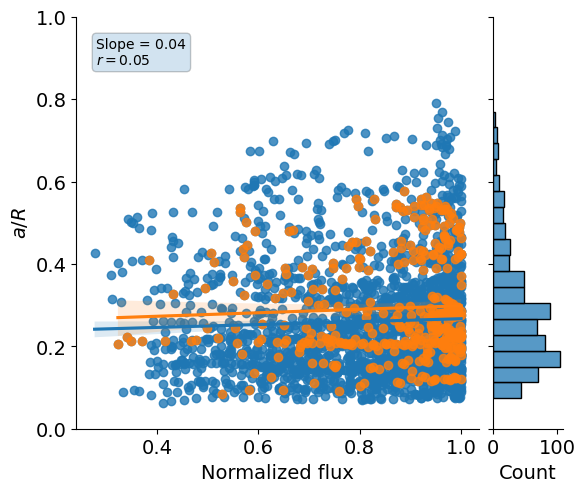

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

DF20=DF20.assign(test=lambda x: x.a/x.R)
# Calcular la pendiente y el coeficiente de correlación
x = DF2['fint']
y = DF2['test']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=DF20, x="fint", y="test", marginal_ticks=True)

# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=DF20, x="fint", y="test", ax=g.ax_joint)
sns.regplot(data=DF2, x="fint", y="test", ax=g.ax_joint)

# Eliminar la marginal del eje x y mantener la del eje y
g.ax_marg_x.remove()  # Elimina la marginal superior
sns.histplot(data=DF20[DF20['fint']>0.95], y="test", ax=g.ax_marg_y, kde=False)

# Etiquetas de los ejes
g.ax_joint.set_xlabel('Normalized flux')
g.ax_joint.set_ylabel(r'$a/R$')

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.95, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.2))

plt.ylim(0,1)


plt.savefig('./plots/da-a-2.pdf',dpi=300)


<AxesSubplot: xlabel='flux', ylabel='a'>

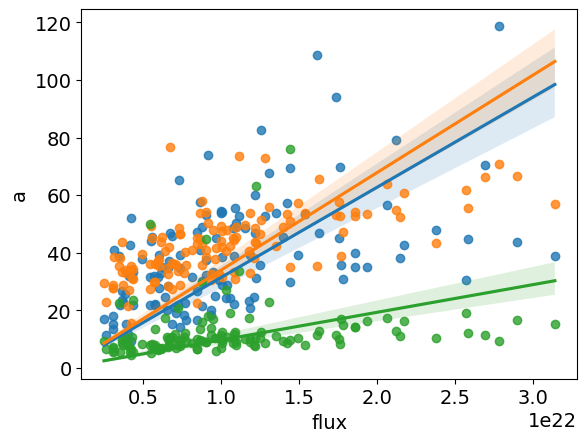

In [49]:
sns.regplot(data=DF.groupby('AR').max(),x='flux',y='R')
sns.regplot(data=DF.groupby('AR').max(),x='flux',y='sar')
plt.plot()


<AxesSubplot: xlabel='flux', ylabel='N0'>

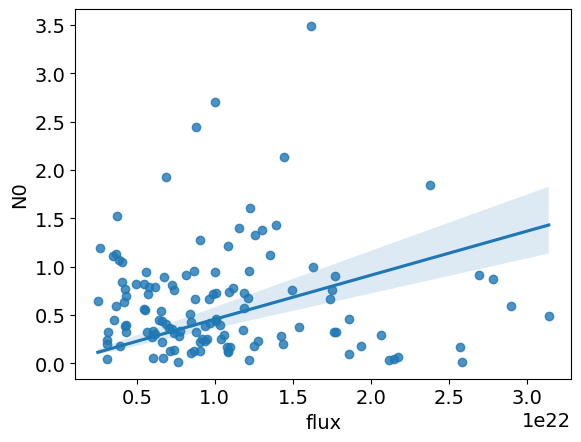

In [53]:
sns.regplot(data=DF.groupby('AR').max().abs(),x='flux',y='N0')

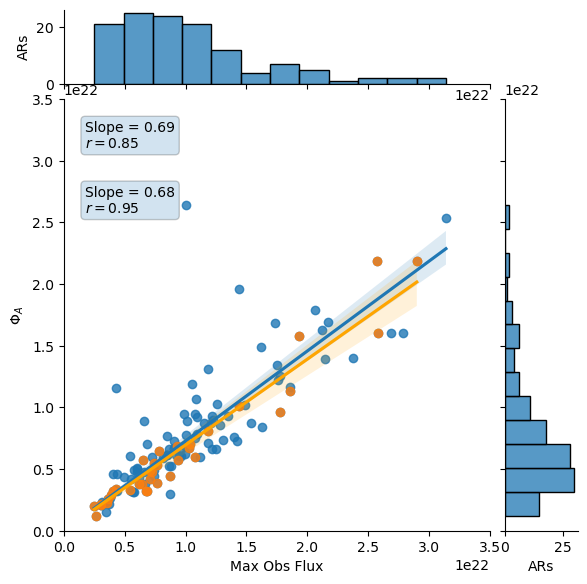

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

for i in [0.7]:
    list1=DF2.loc[DF2['da'] >= i,'AR'].unique().tolist()

# Agrupar los datos y calcular las métricas necesarias
grouped_data = DF.groupby('AR').max()
x = grouped_data['flux']
y = grouped_data['axf']

grouped_data2=grouped_data.reset_index()[grouped_data.reset_index()['AR'].isin(list1)]
x2 = grouped_data2['sar']
y2 = grouped_data2['R']

# Calcular la pendiente y el coeficiente de correlación
slope, intercept, r_value, p_value, std_err = linregress(x, y)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)

# Crear el JointGrid
g = sns.JointGrid(data=grouped_data, x="flux", y="axf", marginal_ticks=True)

# Graficar la regresión en el centro
sns.regplot(data=grouped_data, x="flux", y="axf", ax=g.ax_joint, line_kws=dict(color="tab:blue"))
sns.regplot(data=grouped_data2, x="flux", y="axf", ax=g.ax_joint, line_kws=dict(color="orange"))

# Graficar las marginales
sns.histplot(data=grouped_data, x="flux", ax=g.ax_marg_x, kde=False)
sns.histplot(data=grouped_data, y="axf", ax=g.ax_marg_y, kde=False)

# Agregar la pendiente y el coeficiente de correlación al gráfico central
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.95, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.2))


# Agregar la pendiente y el coeficiente de correlación al gráfico central
textstr = f"Slope = {slope2:.2f}\n$r = {r_value2:.2f}$"
g.ax_joint.text(0.05, 0.8, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.2))

# Configurar los límites de los ejes
g.ax_joint.set_xlim(0, 3.5e22)
g.ax_joint.set_ylim(0, 3.5e22)

# Etiquetas de los ejes
g.ax_joint.set_xlabel(r'Max Obs Flux')
g.ax_joint.set_ylabel(r'$\Phi_A$')

g.ax_marg_x.set_ylabel('ARs')
g.ax_marg_y.set_xlabel('ARs')


plt.savefig('./plots/axf.pdf',dpi=300)


In [43]:
grouped_data.keys()

Index(['mag', 'da', 'alpha', 'a', 'R', 'N0', 'axf', 'xc', 'yc', 'alphab',
       'Dalpha', 'Dalphab', 'MSP', 'MSN', 'sar', 'elon', 'lead', 'flux',
       'fluxp', 'fluxn', 'fint', 'lat', 'spt', 'day', 'slead', 'sfol', 'flead',
       'ffol'],
      dtype='object')

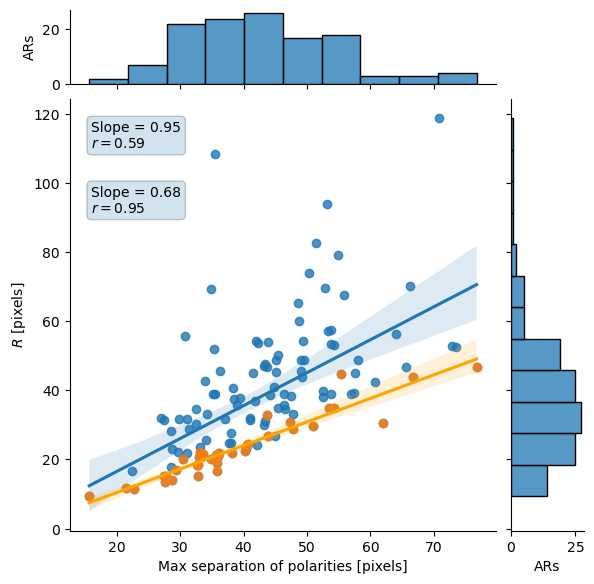

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

for i in [0.7]:
    list1=DF2.loc[DF2['da'] >= i,'AR'].unique().tolist()
    
# Agrupar los datos y calcular las métricas necesarias
grouped_data = DF.groupby('AR').max()
x = grouped_data['sar']
y = grouped_data['R']

grouped_data2=grouped_data.reset_index()[grouped_data.reset_index()['AR'].isin(list1)]
x2 = grouped_data2['sar']
y2 = grouped_data2['R']

# Calcular la pendiente y el coeficiente de correlación
slope, intercept, r_value, p_value, std_err = linregress(x, y)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)

# Crear el JointGrid
g = sns.JointGrid(data=grouped_data, x="sar", y="R", marginal_ticks=True)

# Graficar la regresión en el centro
sns.regplot(data=grouped_data, x="sar", y="R", ax=g.ax_joint, line_kws=dict(color="tab:blue"))
sns.regplot(data=grouped_data2, x="sar", y="R", ax=g.ax_joint, line_kws=dict(color="orange"))


# Graficar las marginales
sns.histplot(data=grouped_data, x="sar", ax=g.ax_marg_x, kde=False)
sns.histplot(data=grouped_data, y="R", ax=g.ax_marg_y, kde=False)

# Agregar la pendiente y el coeficiente de correlación al gráfico central
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.95, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.2))

# Agregar la pendiente y el coeficiente de correlación al gráfico central
textstr = f"Slope = {slope2:.2f}\n$r = {r_value2:.2f}$"
g.ax_joint.text(0.05, 0.8, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.2))

# Configurar los límites de los ejes
#g.ax_joint.set_xlim(0, 3.5e22)
#g.ax_joint.set_ylim(0, 3.5e22)

# Etiquetas de los ejes
g.ax_joint.set_xlabel(r'Max separation of polarities [pixels]')
g.ax_joint.set_ylabel(r'$R$ [pixels]')
g.ax_marg_x.set_ylabel('ARs')
g.ax_marg_y.set_xlabel('ARs')



plt.savefig('./plots/R.pdf',dpi=300)


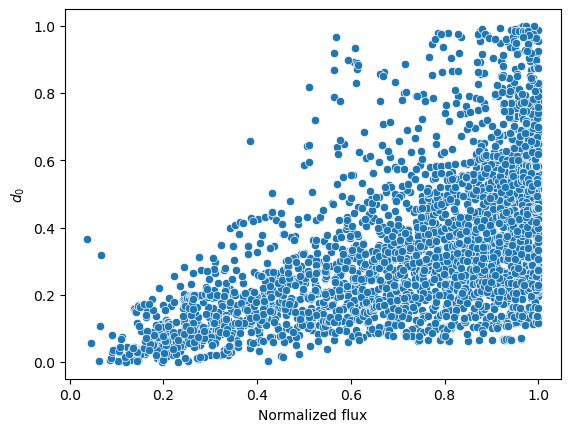

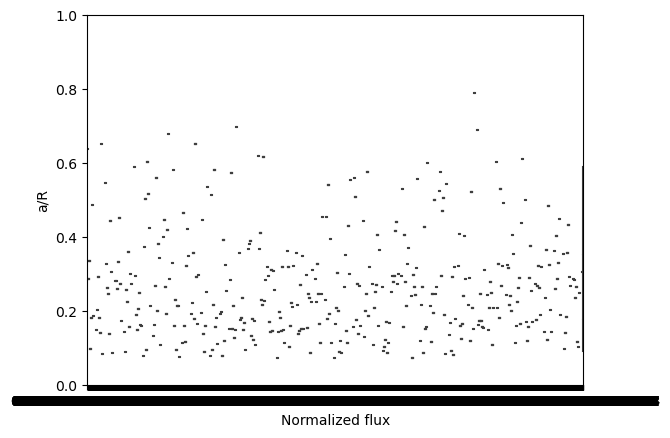

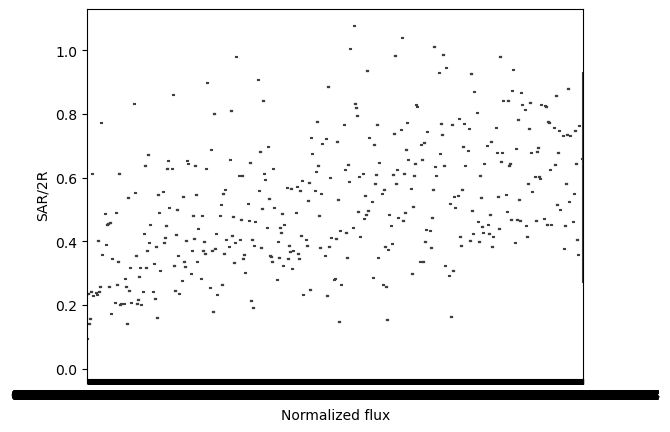

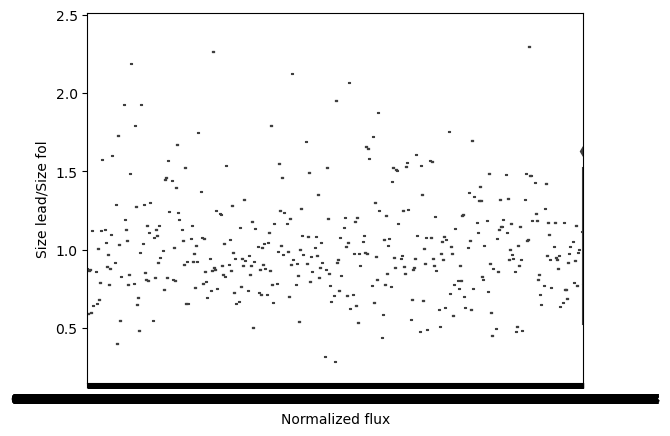

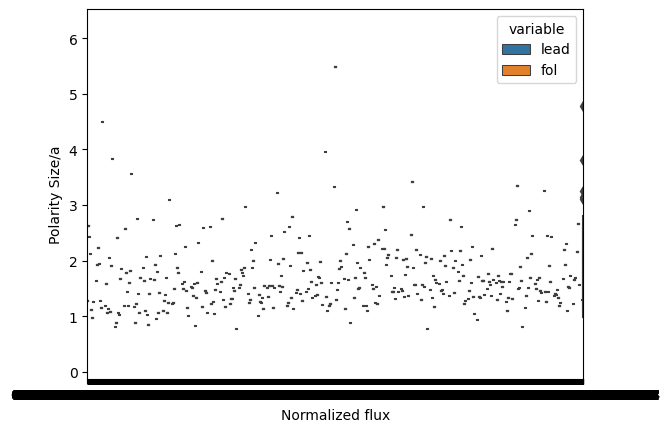

KeyboardInterrupt: 

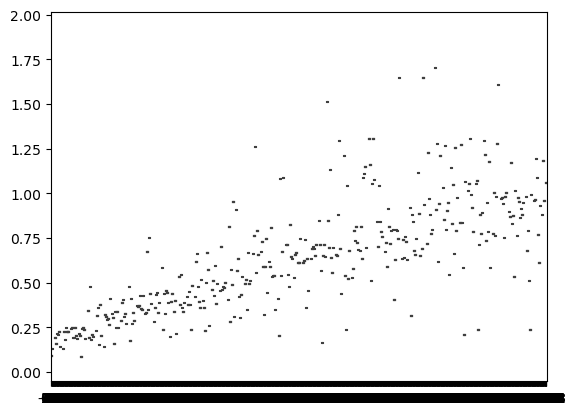

In [15]:
DF2=DF.groupby(['AR','fint']).mean().reset_index()
DF2['alpha']=DF['alpha'].apply(lambda x: x*180/np.pi)


sns.scatterplot(data=DF2,y='da',x='fint',color='tab:blue',bins=20)
plt.ylabel(r'$d_0$')
plt.xlabel('Normalized flux')

plt.show()
sns.boxplot(data=DF2.assign(test=lambda x: x.a/x.R),y='test',x='fint',color='tab:blue')
plt.ylim(0,1)
plt.ylabel('a/R')
plt.xlabel('Normalized flux')
plt.show()


plt.show()
sns.boxplot(data=DF2.assign(test=lambda x: x.sar/(2*x.R)),y='test',x='fint',color='tab:blue')
#plt.ylim(0,1)
plt.ylabel('SAR/2R')
plt.xlabel('Normalized flux')
plt.show()


plt.show()

sns.boxplot(data=DF2.assign(test=lambda x: x.slead/(x.sfol)),y='test',x='fint',color='tab:blue')
#plt.ylim(0,1)
plt.ylabel('Size lead/Size fol')
plt.xlabel('Normalized flux')
plt.show()


plt.show()




sns.boxplot(data=pd.melt(DF2.assign(lead=lambda x: x.slead/x.a,fol=lambda x: x.sfol/x.a),id_vars='fint',value_vars=['lead','fol']),
                         y='value',x='fint',hue='variable')
#plt.ylim(0,1)
plt.ylabel('Polarity Size/a')
plt.xlabel('Normalized flux')
plt.show()


sns.boxplot(data=pd.melt(DF2.assign(lead=lambda x: x.flead/x.axf,fol=lambda x: x.ffol/x.axf),id_vars='fint',value_vars=['lead','fol']),
                         y='value',x='fint',hue='variable')
#plt.ylim(0,1)
plt.ylabel('Flux/Axial F')
plt.xlabel('Normalized flux')
plt.show()

'''
DFtilt=pd.concat([DF2[['Dalphab','fint','lat','N0','AR']].assign(method='Barycenters').rename(columns={"Dalphab": "Dalpha"}),
           DF2[['Dalpha','fint','lat','N0','AR']].assign(method='Bayes')])





f=plt.figure()

ax=f.gca()

s1=sns.boxplot(data=DFtilt[DFtilt['Dalpha'] >= 0],y='Dalpha',x='fint',hue='method',ax=ax)
plt.ylim(-50,50)
ax.legend([],[],frameon=False)
s2=sns.boxplot(data=DFtilt[DFtilt['Dalpha'] <= 0],y='Dalpha',x='fint',hue='method',ax=ax)
plt.hlines(0,0,9,color='black',linestyle='dashed')
plt.xlabel('Normalized flux')
plt.ylabel(r'$\Delta \alpha$ [Degree]')
plt.show()


f=plt.figure()

ax=f.gca()


DFx1=DFtilt[DFtilt['Dalpha'] >= 0]
DFx2=DFtilt[DFtilt['Dalpha'] < 0]

s1=sns.boxplot(data=DFx1[DFx1['lat'] > 0],y='Dalpha',x='fint',hue='method',ax=ax)
plt.ylim(-50,50)
ax.legend([],[],frameon=False)
s2=sns.boxplot(data=DFx2[DFx2['lat'] > 0],y='Dalpha',x='fint',hue='method',ax=ax)
plt.hlines(0,0,9,color='black',linestyle='dashed')
plt.xlabel('Normalized flux')
plt.ylabel(r'$\Delta \alpha$ [Degree]')
plt.title('Northern Hemisphere')
plt.show()

f=plt.figure()

ax=f.gca()


DFx1=DFtilt[DFtilt['Dalpha'] >= 0]
DFx2=DFtilt[DFtilt['Dalpha'] < 0]

s1=sns.boxplot(data=DFx1[DFx1['lat'] < 0],y='Dalpha',x='fint',hue='method',ax=ax)
plt.ylim(-50,50)
ax.legend([],[],frameon=False)
s2=sns.boxplot(data=DFx2[DFx2['lat'] < 0],y='Dalpha',x='fint',hue='method',ax=ax)
plt.hlines(0,0,9,color='black',linestyle='dashed')
plt.xlabel('Normalized flux')
plt.ylabel(r'$\Delta \alpha$ [Degree]')
plt.title('Southern Hemisphere')
plt.show()

'''

In [15]:
DF2

AR  fint   mag        da      alpha         a          R        N0  \
0     7982   0.2   9.0  0.016022 -12.909682  6.449470  28.326319 -0.441226   
1     7982   0.3  24.0  0.074673 -11.714187  9.256711  28.326319 -0.441226   
2     7982   0.4  30.0  0.120750  -7.186112  9.278252  28.326319 -0.441226   
3     7982   0.5  34.5  0.167374  -2.795273  8.756902  28.326319 -0.441226   
4     7982   0.6  39.0  0.207191   1.645527  9.431350  28.326319 -0.441226   
..     ...   ...   ...       ...        ...       ...        ...       ...   
858  11024   0.6  10.5  0.238161  17.333916  6.874747  39.028202 -0.760674   
859  11024   0.7  16.5  0.323021  16.309627  7.471409  39.028202 -0.760674   
860  11024   0.8  23.5  0.371481  16.902818  7.811699  39.028202 -0.760674   
861  11024   0.9  29.0  0.407651  16.548368  7.658341  39.028202 -0.760674   
862  11024   1.0  37.5  0.450484  15.896898  7.152674  39.028202 -0.760674   

              axf         xc  ...          flux         fluxp         fluxn  \
0    8.877730e+21  40.798288  ...  1.409679e+21  1.336664e+21  1.482694e+21   
1    8.877730e+21  45.519254  ...  2.055014e+21  1.911784e+21  2.198244e+21   
2    8.877730e+21  47.706188  ...  2.573484e+21  2.410738e+21  2.736231e+21   
3    8.877730e+21  49.681055  ...  3.400351e+21  3.236478e+21  3.564224e+21   
4    8.877730e+21  50.733765  ...  4.058393e+21  3.915134e+21  4.201653e+21   
..            ...        ...  ...           ...           ...           ...   
858  4.890881e+21  54.822189  ...  4.488467e+21  4.364835e+21  4.612099e+21   
859  4.890881e+21  57.274372  ...  5.235370e+21  5.437597e+21  5.033142e+21   
860  4.890881e+21  59.782444  ...  5.958540e+21  6.224124e+21  5.692955e+21   
861  4.890881e+21  60.503576  ...  6.654526e+21  6.845961e+21  6.463090e+21   
862  4.890881e+21  63.137680  ...  7.285695e+21  7.443441e+21  7.127949e+21   

      lat  spt       day      slead       sfol         flead          ffol  
0    11.0  3.0  1.285714  10.179945  12.060441  1.482694e+21  1.336664e+21  
1    11.0  3.0  2.000000  12.112709  12.362036  2.198244e+21  1.911784e+21  
2    11.0  3.0  3.000000  11.109289  10.632187  2.736231e+21  2.410738e+21  
3    11.0  3.0  3.000000  11.105127  10.056231  3.564224e+21  3.236478e+21  
4    11.0  3.0  3.000000  12.574023   9.670690  4.201653e+21  3.915134e+21  
..    ...  ...       ...        ...        ...           ...           ...  
858 -25.0  1.0  1.000000  11.839977  10.723696  4.364835e+21  4.612099e+21  
859 -25.0  1.0  1.875000  13.260846  12.125192  5.437597e+21  5.033142e+21  
860 -25.0  1.0  2.000000  12.697880  13.360765  6.224124e+21  5.692955e+21  
861 -25.0  1.0  2.400000  13.104778  13.754501  6.845961e+21  6.463090e+21  
862 -25.0  1.0  3.000000  12.208235  16.694506  7.443441e+21  7.127949e+21  

[863 rows x 29 columns]

AttributeError: PathCollection.set() got an unexpected keyword argument 'x_bins'

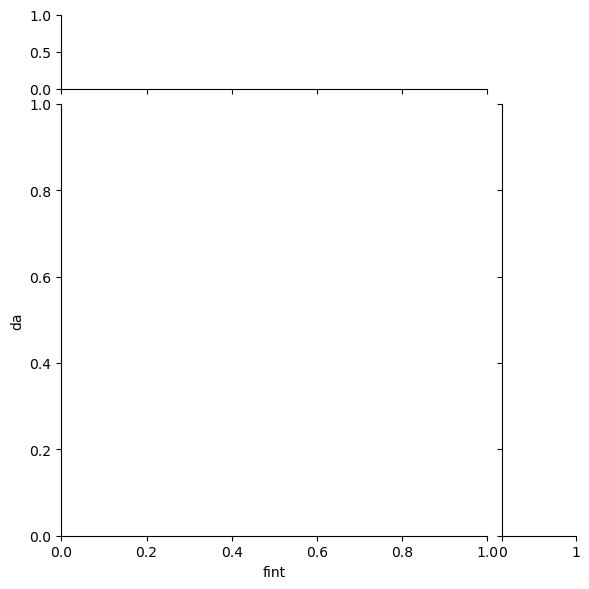

In [14]:
#sns.lmplot(data=DF2,y='da',x='fint',x_bins=5)
g=sns.jointplot(data=DF2,x='fint',y='da', marginal_ticks=True,x_bins=5)
plt.ylabel(r'$d_0$')
plt.xlabel('Normalized flux')

# Group by day

In [8]:
DF_d=DF.groupby(['AR','day']).mean().reset_index()
DF_d['alpha']=DF['alpha'].apply(lambda x: x*180/np.pi)

In [9]:
AR3=DF_d.loc[DF_d['day']>3,'AR'].values
AR4=DF_d.loc[DF_d['da']>.7,'AR'].values

In [107]:
DF_d=DF_d.assign(Fdif=(DF_d.flux-DF_d.da*DF_d.axf)/DF_d.axf)

<AxesSubplot: xlabel='day', ylabel='Fdif'>

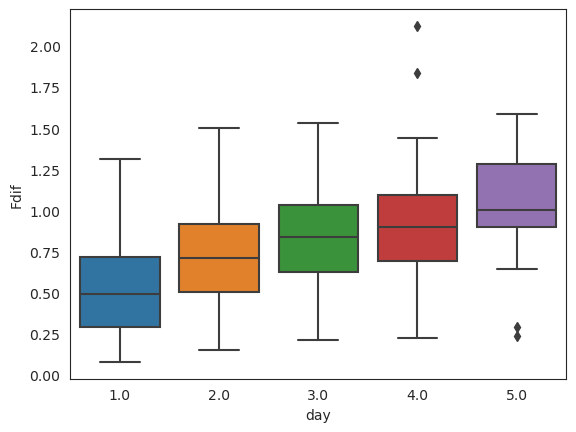

In [108]:
sns.boxplot(data=DF_d,x='day',y='Fdif')

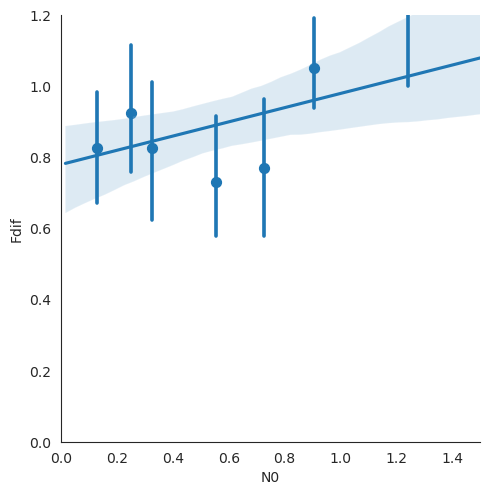

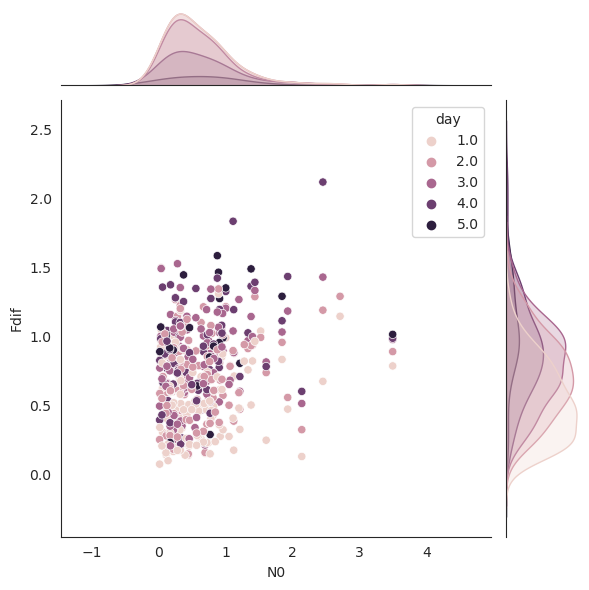

In [138]:
sns.lmplot(data=np.abs(DF_d[DF_d['day']==4]),x='N0',y='Fdif',x_bins=7)
plt.xlim(0,1.5)
plt.ylim(0,1.2)

plt.show()

sns.jointplot(data=np.abs(DF_d),x='N0',y='Fdif',hue='day')

plt.show()


#plt.xlim(0,1.5)
#plt.ylim(0,1.2)


In [97]:
df10268=DF_d.loc[DF_d['AR'].isin([10268])]

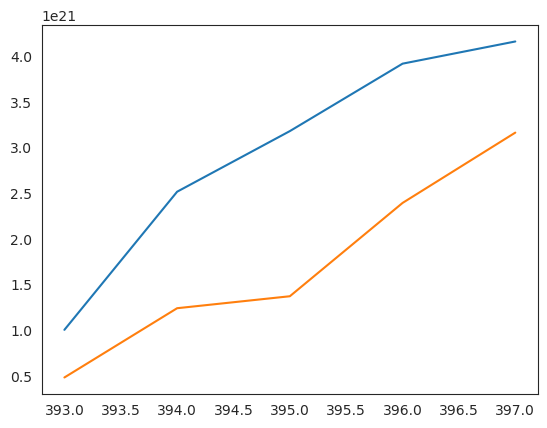

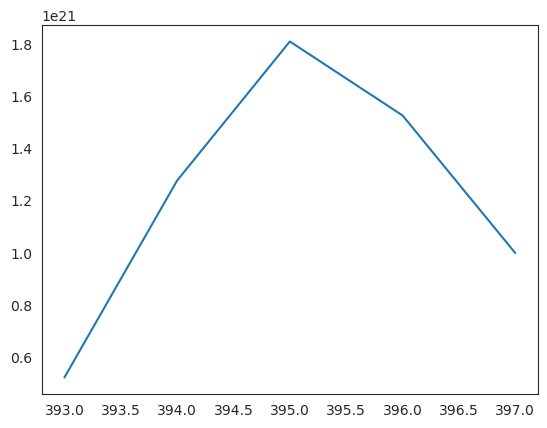

In [104]:
plt.plot(df10268.flux)
plt.plot(df10268.da*df10268.axf)
plt.show()


plt.plot(df10268.flux-df10268.da*df10268.axf)
plt.show()

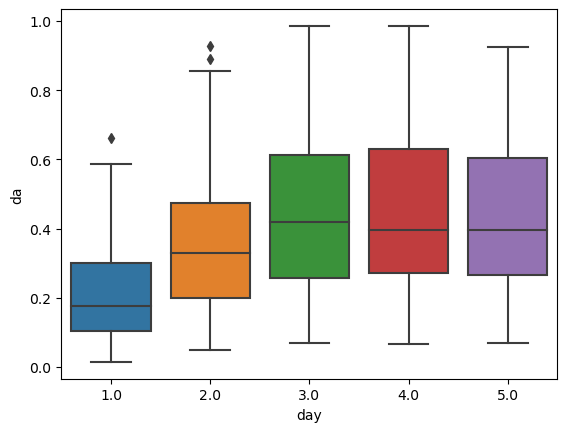

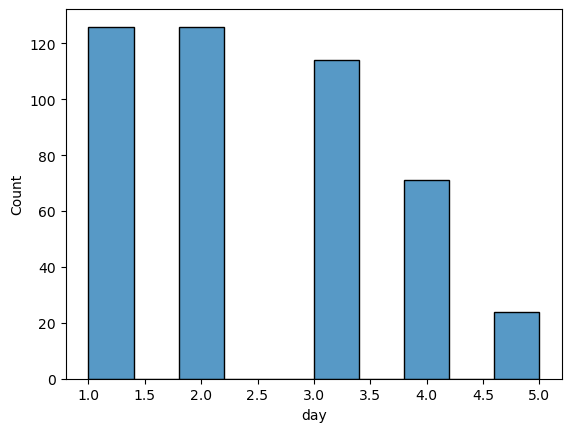

In [12]:
sns.boxplot(data=DF_d,x='day',y='da')
plt.show()

sns.histplot(data=DF_d
            ,x='day')
plt.show()

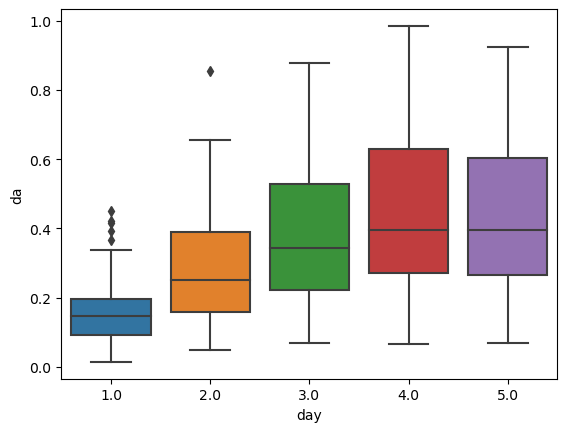

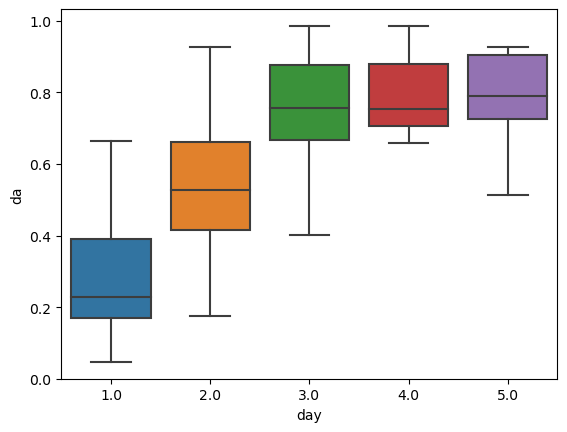

In [13]:
sns.boxplot(data=DF_d.loc[DF_d['AR'].isin(AR3)],x='day',y='da')
plt.show()

sns.boxplot(data=DF_d.loc[DF_d['AR'].isin(AR4)],x='day',y='da')
plt.show()


# Tilt Plots differences by day

In [24]:
#DF['alpha']=DF['alpha'].apply(lambda x: x*180/np.pi)
DF=DF.assign(ratio=lambda x: np.abs(x.alphab-x.alpha))

In [18]:
DF.day

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2980    4.0
2981    4.0
2982    4.0
2983    5.0
2984    5.0
Name: day, Length: 2985, dtype: float64

In [25]:
DF2=DF.groupby(['AR','day']).mean().reset_index()
DF2['alpha']=DF2['alpha'].apply(lambda x: x*180/np.pi)
DF2m=DF.groupby(['AR','day']).max().reset_index()
#DF2m['alpha']=DF2m['alpha'].apply(lambda x: x*180/np.pi)

DF2['day']=DF2.day.apply(lambda x: str(int(x)))
#DF2['alphab']=DF2['alphab'].apply(lambda x: x)

In [26]:
DF2['alpha']=DF2.apply(lambda x: -1*np.sign(x.lat)*x.alpha,axis=1)
DF2['alphab']=DF2.apply(lambda x: -1*np.sign(x.lat)*x.alphab,axis=1)

In [27]:
DF2['lat']=DF2['lat'].apply(lambda x: -1*np.sign(x))

In [10]:
DF2.apply(lambda x: x.lat*x.alpha, axis=1)

0      -4.075852
1     -37.114585
2     -27.598294
3     -26.441801
4       0.266401
         ...    
456   -12.218902
457    -7.510755
458    29.387218
459    22.873291
460    18.167383
Length: 461, dtype: float64

In [28]:
DF2.loc[DF2['AR']==10268][['alpha','alphab','ratio']]

alpha     alphab      ratio
393  12.362274 -20.124290  20.340052
394   6.389152 -28.443548  28.555060
395  19.023040 -15.449089  15.781104
396  20.440276   3.842927   5.088692
397  20.143961  12.353063  12.001484

<AxesSubplot: xlabel='alpha', ylabel='Count'>

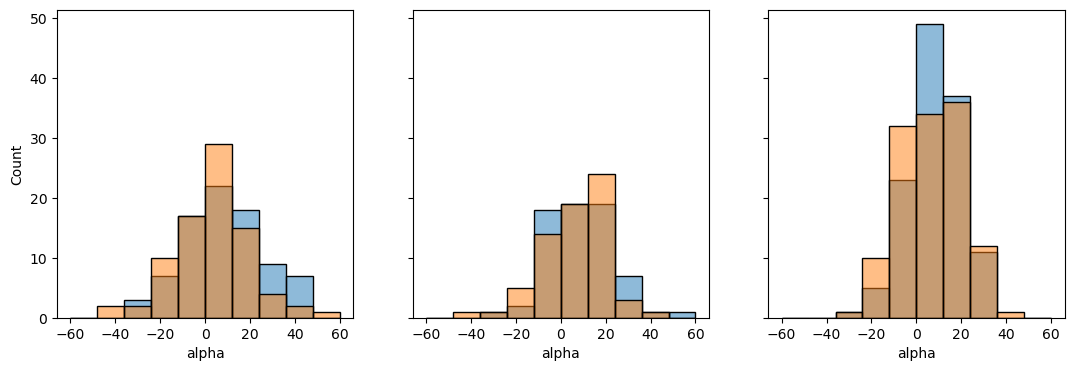

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4),sharey=True)

axs=np.ravel(axs)

sns.histplot(data=DF2[DF2['fint']<0.5],x='alpha',alpha=0.5,bins=10,binrange=(-60,60),ax=axs[0])
sns.histplot(data=DF2[DF2['fint']<0.5],x='alphab',alpha=0.5,bins=10,binrange=(-60,60),ax=axs[0])

sns.histplot(data=DF2[(DF2['fint']>=0.5) & (DF2['fint']<0.7)],x='alpha',alpha=0.5,bins=10,binrange=(-60,60),ax=axs[1])
sns.histplot(data=DF2[(DF2['fint']>=0.5) & (DF2['fint']<0.7)],x='alphab',alpha=0.5,bins=10,binrange=(-60,60),ax=axs[1])

sns.histplot(data=DF2[(DF2['fint']>=0.7) & (DF2['fint']<0.9)],x='alpha',alpha=0.5,bins=10,binrange=(-60,60),ax=axs[2])
sns.histplot(data=DF2[(DF2['fint']>=0.7) & (DF2['fint']<0.9)],x='alphab',alpha=0.5,bins=10,binrange=(-60,60),ax=axs[2])


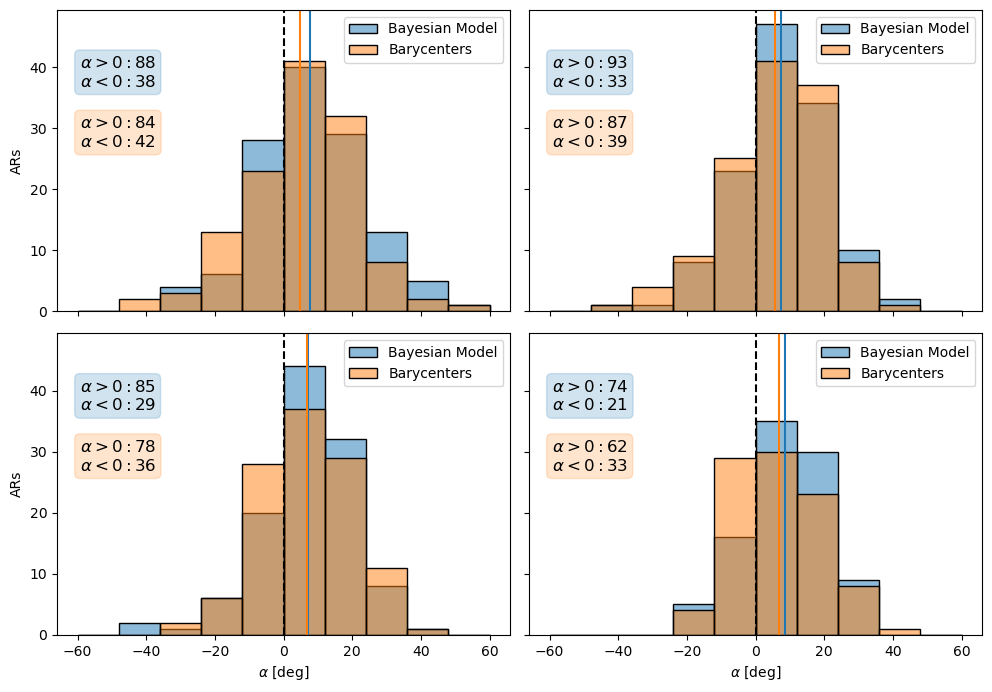

In [31]:


fig, axs = plt.subplots(2, 2, figsize=(10, 7),sharey=True,sharex=True)

axs=np.ravel(axs)

for d in [1,2,3,4]:

    
    DFx=DF2[DF2['day']==str(d)]
    
    if d >= 4:
        DFx=DF2[(DF2['day']==str(d)) | (DF2['day']==str(d+1))] 

    sns.histplot(data=DFx,x='alpha',alpha=0.5,bins=10,binrange=(-60,60),label='Bayesian Model',ax=axs[d-1])

    sns.histplot(data=DFx,x='alphab',alpha=0.5,bins=10,binrange=(-60,60),label='Barycenters',ax=axs[d-1])
    
   # sns.histplot(data=DFx,x='ratio',alpha=0.5,bins=10,binrange=(-60,60),label='Model-Barycenters')
    


    axs[d-1].axvline(0,color='black',linestyle='dashed')

    axs[d-1].axvline(DFx.alpha.mean(),color='tab:blue')
    axs[d-1].axvline(DFx.alphab.mean(),color='tab:orange')
    
    for en,at in enumerate(['alpha','alphab']):
        # Calcular los valores mayores y menores que cero
        mayores_cero = (DFx[at] > 0).sum()
        menores_cero = (DFx[at] < 0).sum()

        # Agregar texto con la información
        # Agregar texto con formato LaTeX
        axs[d-1].text(
        0.05, 0.85-en/5,
        rf"$\alpha > 0: {mayores_cero}$"+f"\n"+ 
        rf"$\alpha < 0: {menores_cero}$",
        transform=axs[d-1].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", alpha=0.2,color=plt.cm.get_cmap('tab10')(en)))
   
    
    axs[d-1].legend()
    
axs[0].set_ylabel('ARs')
axs[2].set_ylabel('ARs')

axs[2].set_xlabel(r'$\alpha$ [deg]')
axs[3].set_xlabel(r'$\alpha$ [deg]')


fig.tight_layout(pad=1.0)
#plt.savefig('./plots/alphas.pdf',dpi=300)

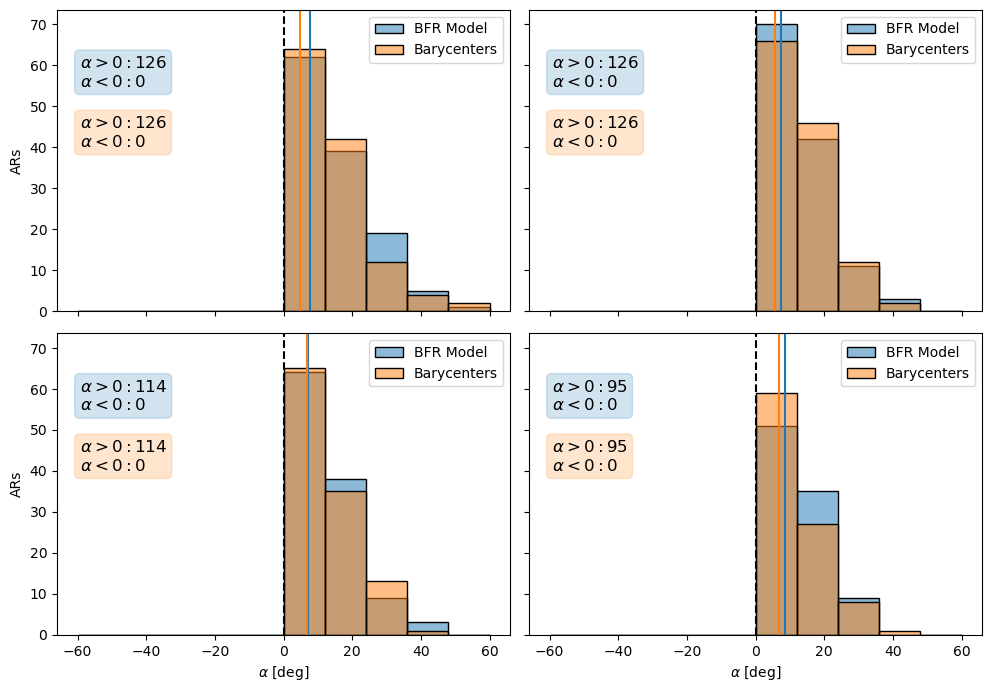

In [41]:


fig, axs = plt.subplots(2, 2, figsize=(10, 7),sharey=True,sharex=True)

axs=np.ravel(axs)

for d in [1,2,3,4]:

    
    DFx=DF2[DF2['day']==str(d)]
    
    if d >= 4:
        DFx=DF2[(DF2['day']==str(d)) | (DF2['day']==str(d+1))] 

    sns.histplot(data=DFx,x='absalp',alpha=0.5,bins=10,binrange=(-60,60),label='BFR Model',ax=axs[d-1])

    sns.histplot(data=DFx,x='absalpb',alpha=0.5,bins=10,binrange=(-60,60),label='Barycenters',ax=axs[d-1])
    
   # sns.histplot(data=DFx,x='ratio',alpha=0.5,bins=10,binrange=(-60,60),label='Model-Barycenters')
    


    axs[d-1].axvline(0,color='black',linestyle='dashed')

    axs[d-1].axvline(DFx.alpha.mean(),color='tab:blue')
    axs[d-1].axvline(DFx.alphab.mean(),color='tab:orange')
    
    for en,at in enumerate(['absalp','absalpb']):
        # Calcular los valores mayores y menores que cero
        mayores_cero = (DFx[at] > 0).sum()
        menores_cero = (DFx[at] < 0).sum()

        # Agregar texto con la información
        # Agregar texto con formato LaTeX
        axs[d-1].text(
        0.05, 0.85-en/5,
        rf"$\alpha > 0: {mayores_cero}$"+f"\n"+ 
        rf"$\alpha < 0: {menores_cero}$",
        transform=axs[d-1].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", alpha=0.2,color=plt.cm.get_cmap('tab10')(en)))
   
    
    axs[d-1].legend()
    
axs[0].set_ylabel('ARs')
axs[2].set_ylabel('ARs')

axs[2].set_xlabel(r'$\alpha$ [deg]')
axs[3].set_xlabel(r'$\alpha$ [deg]')


fig.tight_layout(pad=1.0)
plt.savefig('./plots/absalphas.pdf',dpi=300)

In [50]:
DF

mag        da     alpha         a          R        N0           axf  \
0      0.0  0.062364 -0.225316  6.537552  16.688203  0.108973  7.688288e+21   
1      1.0  0.086887 -0.204451  6.548038  16.688203  0.108973  7.688288e+21   
2      2.0  0.112034 -0.125421  6.283701  16.688203  0.108973  7.688288e+21   
3      3.0  0.128991 -0.048787  6.213070  16.688203  0.108973  7.688288e+21   
4      4.0  0.140907  0.028720  6.087542  16.688203  0.108973  7.688288e+21   
...    ...       ...       ...       ...        ...       ...           ...   
2980  51.0  0.274667 -0.103037  7.383943  53.570456  0.371392  8.698787e+21   
2981  54.0  0.271274 -0.113010  7.265294  53.570456  0.371392  8.698787e+21   
2982  57.0  0.273150 -0.125062  7.290054  53.570456  0.371392  8.698787e+21   
2983  60.0  0.276488 -0.133729  7.111921  53.570456  0.371392  8.698787e+21   
2984  63.0  0.275052 -0.135395  6.903571  53.570456  0.371392  8.698787e+21   

             xc         yc     alphab  ...     AR  spt  day      ratio  \
0     47.208079  36.376521 -23.806271  ...  10132    1  1.0  23.580954   
1     47.133395  36.253265 -26.198798  ...  10132    1  1.0  25.994347   
2     46.938465  35.975563 -19.731521  ...  10132    1  1.0  19.606100   
3     46.862498  35.730582 -13.836382  ...  10132    1  1.0  13.787595   
4     46.751960  35.577666  -8.551407  ...  10132    1  1.0   8.580127   
...         ...        ...        ...  ...    ...  ...  ...        ...   
2980  82.554352  30.542268  -5.774191  ...   9987    3  4.0   5.671155   
2981  83.820409  30.269756  -6.252999  ...   9987    3  4.0   6.139989   
2982  84.640428  30.066114  -6.542930  ...   9987    3  4.0   6.417868   
2983  85.276118  29.737847  -6.966293  ...   9987    3  5.0   6.832564   
2984  85.710229  29.619871  -7.621635  ...   9987    3  5.0   7.486240   

           rot      rotb    absalp    absalpb    absrot   absrotb  
0     0.013910 -1.595019  0.225316  23.806271 -0.013910  1.595019  
1     0.033298  1.358250  0.204451  26.198798 -0.033298 -1.358250  
2     0.051888  4.120805  0.125421  19.731521 -0.051888 -4.120805  
3     0.051380  3.726705  0.048787  13.836382 -0.032234 -3.726705  
4     0.044446  3.438305  0.028720   8.551407  0.011921 -3.438305  
...        ...       ...       ...        ...       ...       ...  
2980 -0.001905 -0.083089  0.103037   5.774191  0.001905  0.083089  
2981 -0.002447 -0.085415  0.113010   6.252999  0.002447  0.085415  
2982 -0.002302 -0.079255  0.125062   6.542930  0.002302  0.079255  
2983 -0.001148 -0.119856  0.133729   6.966293  0.001148  0.119856  
2984 -0.000370 -0.145632  0.135395   7.621635  0.000370  0.145632  

[2985 rows x 32 columns]

In [68]:
DF=pd.read_csv('compare-params-TM3.csv')

In [69]:
DF['alpha']=DF.apply(lambda x: -1*180*np.sign(x.lat)*x.alpha/np.pi,axis=1)
DF['alphab']=DF.apply(lambda x: -1*np.sign(x.lat)*x.alphab,axis=1)

In [70]:
DF=DF.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DF=DF.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)

In [71]:
DF=DF.assign(absalp= lambda x: np.abs(x.alpha))
DF=DF.assign(absalpb= lambda x: np.abs(x.alphab))

DF=DF.assign(absrot= lambda x: np.gradient(x.absalp,x.mag)/1.5)
DF=DF.assign(absrotb= lambda x: np.gradient(x.absalpb,x.mag)/1.5)

In [72]:
DF2=DF.groupby(['AR','day']).mean().reset_index()

In [73]:
DF2['day']=DF2.day.apply(lambda x: str(int(x)))

In [74]:
DF2

AR day   mag        da      alpha         a          R        N0  \
0     7982   1   6.0  0.014320   4.075852  6.341445  28.326319 -0.441226   
1     7982   2  21.0  0.052915  37.114585  8.241839  28.326319 -0.441226   
2     7982   3  36.0  0.176296  27.598294  9.050980  28.326319 -0.441226   
3     7982   4  46.5  0.234046  26.441801  8.121864  28.326319 -0.441226   
4     8016   1   6.5  0.398567   0.266401  5.900602  22.970716  1.521188   
..     ...  ..   ...       ...        ...       ...        ...       ...   
456  11007   3  36.0  0.279911  12.218902  5.002691  38.883156 -1.109657   
457  11007   4  48.0  0.276018   7.510755  4.848698  38.883156 -1.109657   
458  11024   1   6.5  0.171319  29.387218  7.349434  39.028202 -0.760674   
459  11024   2  21.5  0.358545  22.873291  7.688858  39.028202 -0.760674   
460  11024   3  36.5  0.445710  18.167383  7.197787  39.028202 -0.760674   

              axf         xc  ...         fluxn      fint   lat  spt  \
0    8.877730e+21  39.935610  ...  1.447591e+21  0.202755  11.0  3.0   
1    8.877730e+21  44.493546  ...  1.947126e+21  0.266791  11.0  3.0   
2    8.877730e+21  49.603829  ...  3.828070e+21  0.536678  11.0  3.0   
3    8.877730e+21  50.124184  ...  6.827242e+21  0.926231  11.0  3.0   
4    2.192834e+21  60.230012  ...  2.723180e+21  0.843292 -21.0  1.0   
..            ...        ...  ...           ...       ...   ...  ...   
456  1.542822e+21  42.316215  ...  2.026097e+21  0.588994  35.0  3.0   
457  1.542822e+21  56.551996  ...  3.567197e+21  0.941414  35.0  3.0   
458  4.890881e+21  52.589243  ...  3.710023e+21  0.467122 -25.0  1.0   
459  4.890881e+21  58.862117  ...  5.533774e+21  0.779843 -25.0  1.0   
460  4.890881e+21  62.822482  ...  7.064630e+21  0.977130 -25.0  1.0   

          rot      rotb     absalp    absalpb    absrot   absrotb  
0    0.301008  0.212712   4.075852   2.351784  0.301008  0.212712  
1    1.321911  0.489353  37.114585  12.413537  1.321911  0.489353  
2   -0.464060 -0.025012  27.598294  16.616624 -0.464060 -0.025012  
3    0.162018 -0.097124  26.441801  14.891708  0.188679 -0.074719  
4    2.242843  1.012001   4.408601  12.407203 -1.927631 -1.012619  
..        ...       ...        ...        ...       ...       ...  
456 -0.509142 -0.173757  12.218902   8.612975 -0.509142 -0.173757  
457 -0.245946 -0.184033   7.510755   6.012116 -0.245946 -0.184033  
458 -0.437120 -0.662318  29.387218  39.825885 -0.439646 -0.662374  
459 -0.368456 -0.407839  22.873291  30.071342 -0.368456 -0.407839  
460  0.021844 -0.034793  18.167383  24.215101  0.022285 -0.034602  

[461 rows x 31 columns]

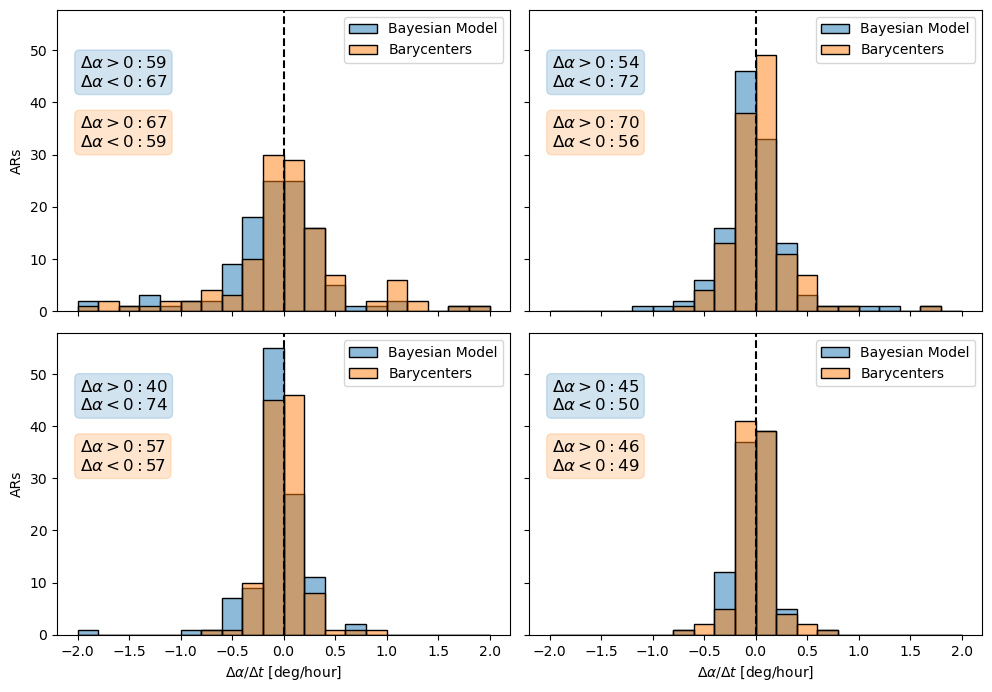

In [84]:

fig, axs = plt.subplots(2, 2, figsize=(10, 7),sharey=True,sharex=True)

axs=np.ravel(axs)

for d in [1,2,3,4]:

    
    DFx=DF2[DF2['day']==str(d)]
    
    
    if d >= 4:
        DFx=DF2[(DF2['day']==str(d)) | (DF2['day']==str(d+1))] 

    sns.histplot(data=DFx,x='rot',alpha=0.5,label='Bayesian Model',ax=axs[d-1],binrange=(-2,2),bins=20)

    sns.histplot(data=DFx,x='rotb',alpha=0.5,label='Barycenters',ax=axs[d-1],binrange=(-2,2),bins=20)
    
   # sns.histplot(data=DFx,x='ratio',alpha=0.5,bins=10,binrange=(-60,60),label='Model-Barycenters')
    

    axs[d-1].set_xlabel('')
    axs[d-1].axvline(0,color='black',linestyle='dashed')

#    axs[d-1].axvline(DFx.rot.mean(),color='tab:blue')
#    axs[d-1].axvline(DFx.rotb.mean(),color='tab:orange')
    
    for en,at in enumerate(['rot','rotb']):
        # Calcular los valores mayores y menores que cero
        mayores_cero = (DFx[at] > 0).sum()
        menores_cero = (DFx[at] < 0).sum()
        

        # Agregar texto con la información
        # Agregar texto con formato LaTeX
        axs[d-1].text(
        0.05, 0.85-en/5,
        rf"$\Delta\alpha > 0: {mayores_cero}$"+f"\n"+ 
        rf"$\Delta\alpha < 0: {menores_cero}$",
        transform=axs[d-1].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", alpha=0.2,color=plt.cm.get_cmap('tab10')(en)))
   
    
    axs[d-1].legend()
    
axs[0].set_ylabel('ARs')
axs[2].set_ylabel('ARs')

axs[2].set_xlabel(r'$\Delta \alpha / \Delta t$ [deg/hour]')
axs[3].set_xlabel(r'$\Delta \alpha / \Delta t$ [deg/hour]')


fig.tight_layout(pad=1.0)
plt.savefig('./plots/Dalphas2.pdf',dpi=300)



<AxesSubplot: xlabel='rot', ylabel='Count'>

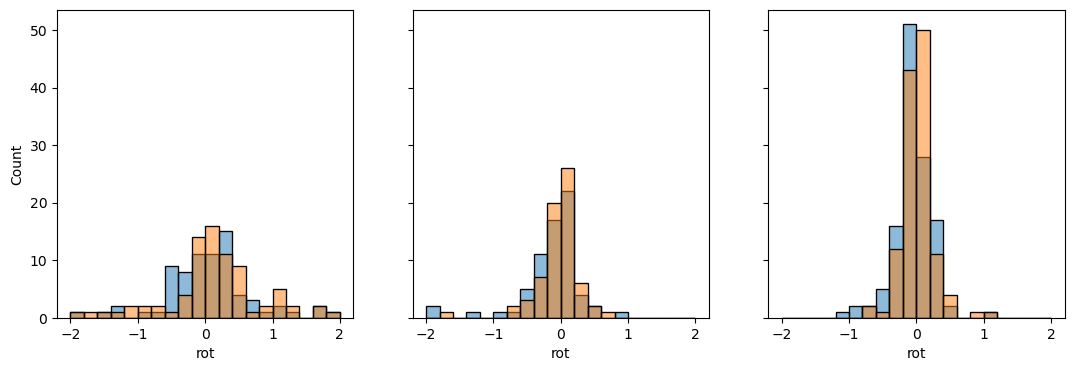

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4),sharey=True)

axs=np.ravel(axs)

sns.histplot(data=DF2[DF2['fint']<0.5],x='rot',alpha=0.5,bins=20,binrange=(-2,2),ax=axs[0])
sns.histplot(data=DF2[DF2['fint']<0.5],x='rotb',alpha=0.5,bins=20,binrange=(-2,2),ax=axs[0])

sns.histplot(data=DF2[(DF2['fint']>=0.5) & (DF2['fint']<0.7)],x='rot',alpha=0.5,bins=20,binrange=(-2,2),ax=axs[1])
sns.histplot(data=DF2[(DF2['fint']>=0.5) & (DF2['fint']<0.7)],x='rotb',alpha=0.5,bins=20,binrange=(-2,2),ax=axs[1])

sns.histplot(data=DF2[(DF2['fint']>=0.7) & (DF2['fint']<0.9)],x='rot',alpha=0.5,bins=20,binrange=(-2,2),ax=axs[2])
sns.histplot(data=DF2[(DF2['fint']>=0.7) & (DF2['fint']<0.9)],x='rotb',alpha=0.5,bins=20,binrange=(-2,2),ax=axs[2])

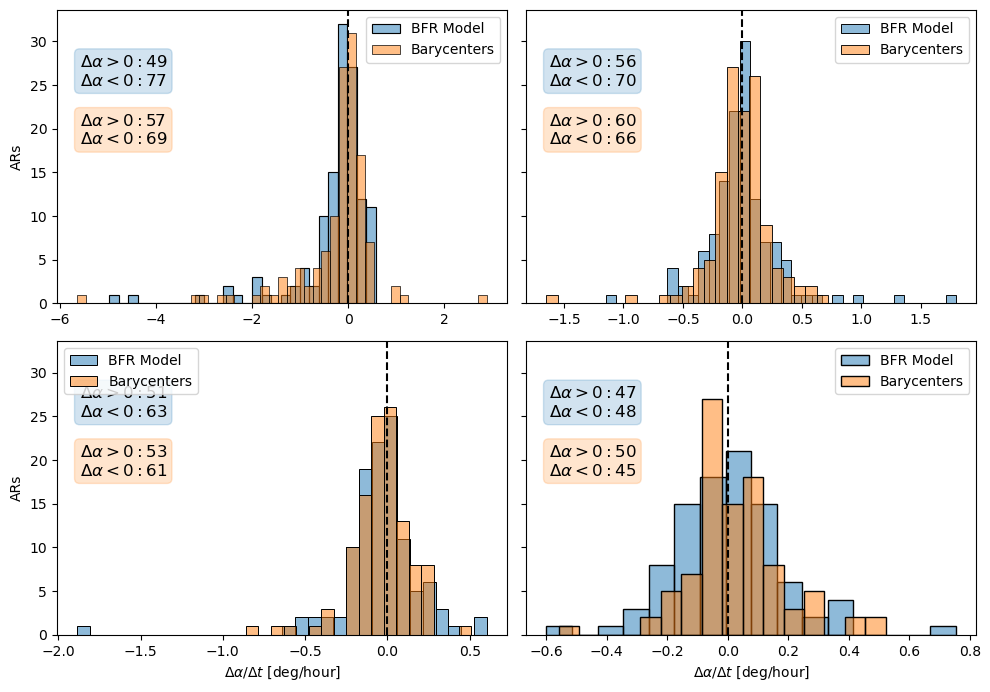

In [40]:

fig, axs = plt.subplots(2, 2, figsize=(10, 7),sharey=True,sharex=False)

axs=np.ravel(axs)

for d in [1,2,3,4]:

    
    DFx=DF2[DF2['day']==str(d)]
    
    
    if d >= 4:
        DFx=DF2[(DF2['day']==str(d)) | (DF2['day']==str(d+1))] 

    sns.histplot(data=DFx,x='absrot',alpha=0.5,label='BFR Model',ax=axs[d-1])

    sns.histplot(data=DFx,x='absrotb',alpha=0.5,label='Barycenters',ax=axs[d-1])
    
   # sns.histplot(data=DFx,x='ratio',alpha=0.5,bins=10,binrange=(-60,60),label='Model-Barycenters')
    

    axs[d-1].set_xlabel('')
    axs[d-1].axvline(0,color='black',linestyle='dashed')

#    axs[d-1].axvline(DFx.rot.mean(),color='tab:blue')
#    axs[d-1].axvline(DFx.rotb.mean(),color='tab:orange')
    
    for en,at in enumerate(['absrot','absrotb']):
        # Calcular los valores mayores y menores que cero
        mayores_cero = (DFx[at] > 0).sum()
        menores_cero = (DFx[at] < 0).sum()
        

        # Agregar texto con la información
        # Agregar texto con formato LaTeX
        axs[d-1].text(
        0.05, 0.85-en/5,
        rf"$\Delta\alpha > 0: {mayores_cero}$"+f"\n"+ 
        rf"$\Delta\alpha < 0: {menores_cero}$",
        transform=axs[d-1].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", alpha=0.2,color=plt.cm.get_cmap('tab10')(en)))
   
    
    axs[d-1].legend()
    
axs[0].set_ylabel('ARs')
axs[2].set_ylabel('ARs')

axs[2].set_xlabel(r'$\Delta \alpha / \Delta t$ [deg/hour]')
axs[3].set_xlabel(r'$\Delta \alpha / \Delta t$ [deg/hour]')


fig.tight_layout(pad=1.0)
plt.savefig('./plots/absDalphas2.pdf',dpi=300)



/tmp/ipykernel_22419/904656670.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFx['lat']=DFx['lat'].apply(lambda x: np.abs(x))


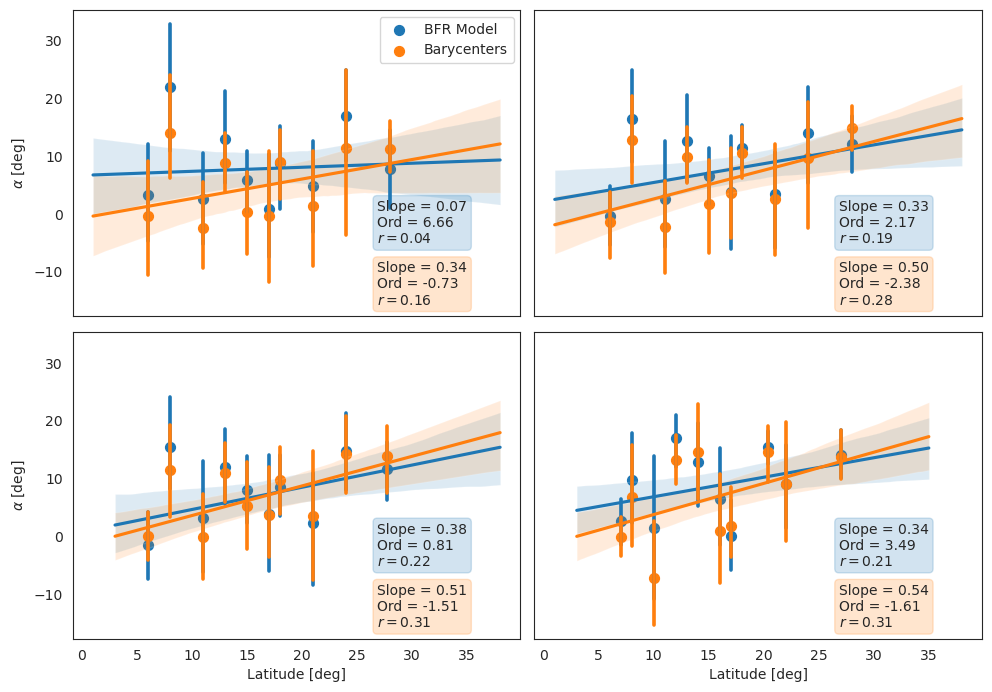

In [373]:

fig, axs = plt.subplots(2, 2, figsize=(10, 7),sharex=True,sharey=True)

axs=np.ravel(axs)

for d in [1,2,3,4]:

    
    DFx=DF2[DF2['day']==str(d)]#.applymap(lambda x: abs(x) if isinstance(x, (int, float)) else x)
    
    if d >= 4:
        DFx=DF2[(DF2['day']==str(d)) | (DF2['day']==str(d+1))] 
    
    DFx['lat']=DFx['lat'].apply(lambda x: np.abs(x))
    sns.regplot(data=DFx,y='alpha',x='lat',label='BFR Model',ax=axs[d-1], x_bins=10)

    sns.regplot(data=DFx,y='alphab',x='lat',label='Barycenters',ax=axs[d-1], x_bins=10)
    
   # sns.histplot(data=DFx,x='ratio',alpha=0.5,bins=10,binrange=(-60,60),label='Model-Barycenters')
    

    axs[d-1].set_ylabel('')
    axs[d-1].set_xlabel('')
    
    for en,at in enumerate(['alpha','alphab']):
        # Calcular los valores mayores y menores que cero
        
        x = DFx['lat']
        y = DFx[at]

        # Calcular la pendiente y el coeficiente de correlación
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        # Agregar la pendiente y el coeficiente de correlación al gráfico central
        textstr = f"Slope = {slope:.2f}\nOrd = {intercept:.2f}\n$r = {r_value:.2f}$"
        axs[d-1].text(0.68, 0.38-en/5, textstr, transform=axs[d-1].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.2,color=plt.cm.get_cmap('tab10')(en)))
   
    
axs[0].legend()
 
axs[0].set_ylabel(r'$\alpha$ [deg]')
axs[2].set_ylabel(r'$\alpha$ [deg]')

axs[2].set_xlabel(r'Latitude [deg]')
axs[3].set_xlabel(r'Latitude [deg]')


fig.tight_layout(pad=1.0)
plt.savefig('./plots/joy-day.pdf',dpi=300)



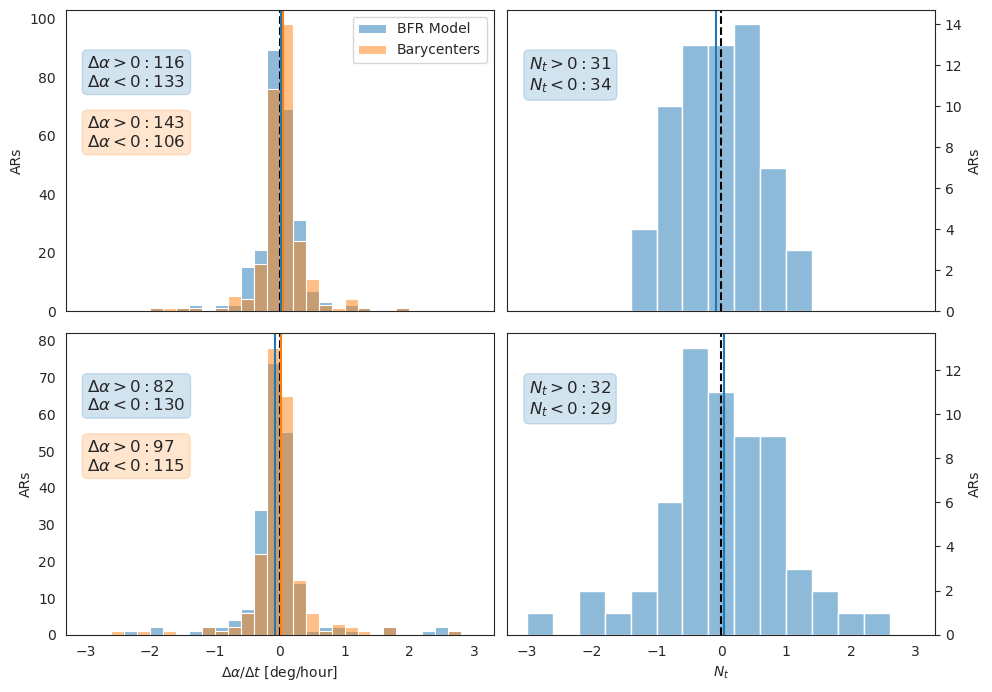

In [409]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7),sharey=False,sharex=True)

axs=np.ravel(axs)

day=1

for d,hemis in [(1,'N'),(3,'S')]:

#    if hemis=='S':
 #       DFx=DF2[(DF2['day']==str(day)) & (DF2['lat']<0)]
  #  else:
   #     DFx=DF2[(DF2['day']==str(day)) & (DF2['lat']>0)]
        
    if hemis=='S':
        DFx=DF2[(DF2['lat']<0)]
    else:
        DFx=DF2[(DF2['lat']>0)]    


    sns.histplot(data=DFx,x='rot',alpha=0.5,bins=30,binrange=(-3,3),label='BFR Model',ax=axs[d-1])

    sns.histplot(data=DFx,x='rotb',alpha=0.5,bins=30,binrange=(-3,3),label='Barycenters',ax=axs[d-1])
    
   # sns.histplot(data=DFx,x='ratio',alpha=0.5,bins=10,binrange=(-60,60),label='Model-Barycenters')
    


    axs[d-1].axvline(0,color='black',linestyle='dashed')

    axs[d-1].axvline(DFx.rot.mean(),color='tab:blue')
    axs[d-1].axvline(DFx.rotb.mean(),color='tab:orange')
    
    for en,at in enumerate(['rot','rotb']):
        # Calcular los valores mayores y menores que cero
        mayores_cero = (DFx[at] > 0).sum()
        menores_cero = (DFx[at] < 0).sum()
        

        # Agregar texto con la información
        # Agregar texto con formato LaTeX
        axs[d-1].text(
        0.05, 0.85-en/5,
        rf"$\Delta\alpha > 0: {mayores_cero}$"+f"\n"+ 
        rf"$\Delta\alpha < 0: {menores_cero}$",
        transform=axs[d-1].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", alpha=0.2,color=plt.cm.get_cmap('tab10')(en)))
        
        
for d,hemis in [(2,'N'),(4,'S')]:

    if hemis=='S':
        DFx=DF2[(DF2['day']==str(day)) & (DF2['lat']<0)]
    else:
        DFx=DF2[(DF2['day']==str(day)) & (DF2['lat']>0)]
    


    sns.histplot(data=DFx,x='N0',alpha=0.5,bins=15,binrange=(-3,3),label='BFR Model',ax=axs[d-1])

#    sns.histplot(data=DFx,x='rotb',alpha=0.5,bins=15,binrange=(-3,3),label='Barycenters',ax=axs[d-1])
    
   # sns.histplot(data=DFx,x='ratio',alpha=0.5,bins=10,binrange=(-60,60),label='Model-Barycenters')
    

    axs[d-1].set_ylabel('ARs')
    axs[d-1].axvline(0,color='black',linestyle='dashed')

    axs[d-1].axvline(DFx.N0.mean(),color='tab:blue')
  #  axs[d-1].axvline(DFx.rotb.mean(),color='tab:orange')
    
    for en,at in enumerate(['N0']):
        # Calcular los valores mayores y menores que cero
        mayores_cero = (DFx[at] > 0).sum()
        menores_cero = (DFx[at] < 0).sum()
        

        # Agregar texto con la información
        # Agregar texto con formato LaTeX
        axs[d-1].text(
        0.05, 0.85-en/5,
        rf"$N_t > 0: {mayores_cero}$"+f"\n"+ 
        rf"$N_t < 0: {menores_cero}$",
        transform=axs[d-1].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", alpha=0.2,color=plt.cm.get_cmap('tab10')(en)))
   
    
axs[0].legend()
    
axs[0].set_ylabel('ARs')
axs[2].set_ylabel('ARs')

# Mover el y-axis al lado derecho
axs[1].yaxis.set_label_position("right")  # Mueve la etiqueta (ylabel) a la derecha
axs[1].yaxis.tick_right()                # Mueve los ticks (marcas) al lado derecho
# Mover el y-axis al lado derecho
axs[3].yaxis.set_label_position("right")  # Mueve la etiqueta (ylabel) a la derecha
axs[3].yaxis.tick_right()                # Mueve los ticks (marcas) al lado derecho

axs[2].set_xlabel(r'$\Delta \alpha / \Delta t$ [deg/hour]')
axs[3].set_xlabel(r'$N_t$')


fig.tight_layout(pad=1.0)
plt.savefig('./plots/hemis2.pdf',dpi=300)


<AxesSubplot: xlabel='fint', ylabel='rotb'>

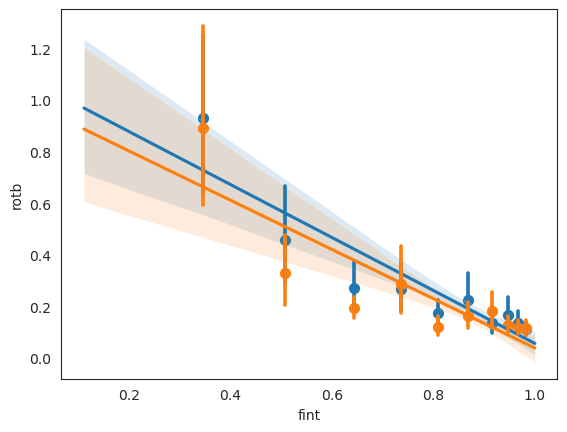

In [400]:
sns.regplot(data=DF2.applymap(lambda x: abs(x) if isinstance(x, (int, float)) else x),x='fint',y='rot',x_bins=10)
sns.regplot(data=DF2.applymap(lambda x: abs(x) if isinstance(x, (int, float)) else x),x='fint',y='rotb',x_bins=10)


<AxesSubplot: xlabel='lat', ylabel='rotb'>

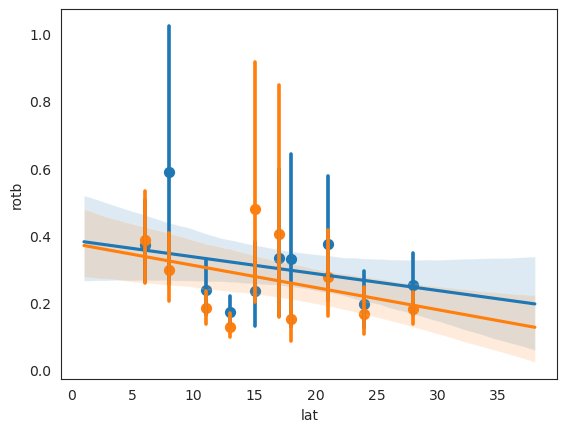

In [426]:
sns.regplot(data=DF2.applymap(lambda x: abs(x) if isinstance(x, (int, float)) else x),x='lat',y='rot',x_bins=10)
sns.regplot(data=DF2.applymap(lambda x: abs(x) if isinstance(x, (int, float)) else x),x='lat',y='rotb',x_bins=10)

In [429]:
DF2=DF2.assign(heli=lambda x: x.N0*x.axf*x.axf)

<AxesSubplot: xlabel='lat', ylabel='N0'>

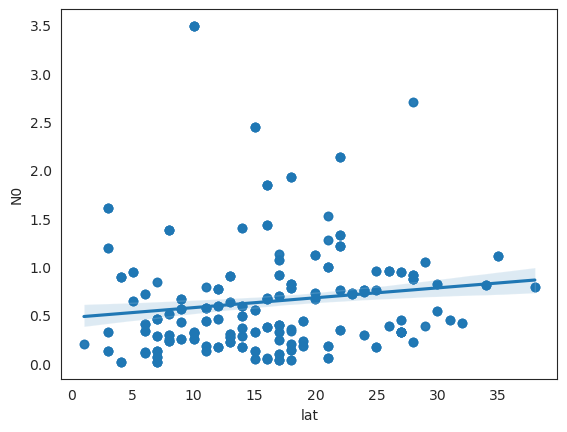

In [435]:
sns.regplot(data=DF2.applymap(lambda x: abs(x) if isinstance(x, (int, float)) else x),x='lat',y='N0')


<AxesSubplot: xlabel='lat', ylabel='R'>

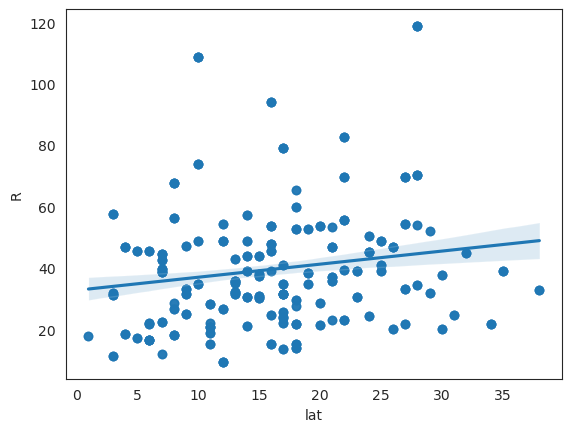

In [432]:
sns.regplot(data=DF2.applymap(lambda x: abs(x) if isinstance(x, (int, float)) else x),x='lat',y='R')


<AxesSubplot: xlabel='lat', ylabel='heli'>

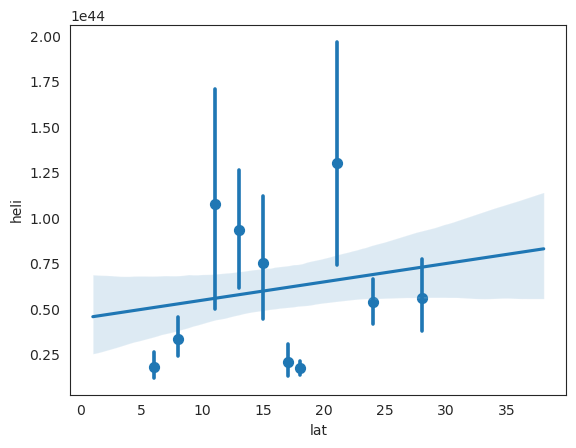

In [431]:
sns.regplot(data=DF2.applymap(lambda x: abs(x) if isinstance(x, (int, float)) else x),x='lat',y='heli',x_bins=10)


In [398]:
DF=DF.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DF=DF.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)

AR day   mag        da      alpha         a          R        N0  \
0     7982   1   6.0  0.014320   4.075852  6.341445  28.326319 -0.441226   
1     7982   2  21.0  0.052915  37.114585  8.241839  28.326319 -0.441226   
2     7982   3  36.0  0.176296  27.598294  9.050980  28.326319 -0.441226   
3     7982   4  46.5  0.234046  26.441801  8.121864  28.326319 -0.441226   
4     8016   1   6.5  0.398567   0.266401  5.900602  22.970716  1.521188   
..     ...  ..   ...       ...        ...       ...        ...       ...   
456  11007   3  36.0  0.279911  12.218902  5.002691  38.883156 -1.109657   
457  11007   4  48.0  0.276018   7.510755  4.848698  38.883156 -1.109657   
458  11024   1   6.5  0.171319  29.387218  7.349434  39.028202 -0.760674   
459  11024   2  21.5  0.358545  22.873291  7.688858  39.028202 -0.760674   
460  11024   3  36.5  0.445710  18.167383  7.197787  39.028202 -0.760674   

              axf         xc  ...      fint   lat  spt      slead       sfol  \
0    8.877730e+21  39.935610  ...  0.202755  11.0  3.0   9.987270  12.272466   
1    8.877730e+21  44.493546  ...  0.266791  11.0  3.0  11.532278  12.029372   
2    8.877730e+21  49.603829  ...  0.536678  11.0  3.0  11.920818   9.960167   
3    8.877730e+21  50.124184  ...  0.926231  11.0  3.0  11.945131  10.478800   
4    2.192834e+21  60.230012  ...  0.843292 -21.0  1.0  12.702300   9.346545   
..            ...        ...  ...       ...   ...  ...        ...        ...   
456  1.542822e+21  42.316215  ...  0.588994  35.0  3.0  11.585702  12.194429   
457  1.542822e+21  56.551996  ...  0.941414  35.0  3.0  12.476195  18.003780   
458  4.890881e+21  52.589243  ...  0.467122 -25.0  1.0  12.115873  10.782596   
459  4.890881e+21  58.862117  ...  0.779843 -25.0  1.0  13.026473  12.889660   
460  4.890881e+21  62.822482  ...  0.977130 -25.0  1.0  12.345415  16.355033   

            flead          ffol      ratio       rot      rotb  
0    1.447591e+21  1.321661e+21   1.724068  0.301008  0.212712  
1    1.947126e+21  1.696739e+21  24.701048  1.321911  0.489353  
2    3.828070e+21  3.501938e+21  10.981670 -0.464060 -0.025012  
3    6.827242e+21  5.823334e+21  11.550093  0.162018 -0.097124  
4    2.723180e+21  3.596572e+21  13.330159  2.242843  1.012001  
..            ...           ...        ...       ...       ...  
456  2.026097e+21  2.055240e+21   3.605926 -0.509142 -0.173757  
457  3.567197e+21  2.956177e+21   1.498639 -0.245946 -0.184033  
458  3.199189e+21  3.710023e+21  10.438667 -0.437120 -0.662318  
459  6.000909e+21  5.533774e+21   7.198052 -0.368456 -0.407839  
460  7.388125e+21  7.064630e+21   6.047718  0.021844 -0.034793  

[461 rows x 32 columns]

In [306]:
DF.loc[DF['AR']==10268][['alpha','alphab','rot','Dalpha']]

alpha     alphab       rot     Dalpha
1597 -16.572604  21.005488  0.237597   3.571357
1598 -16.119880  16.970710  0.866986   4.024081
1599 -13.104659  17.915845  1.874300   7.039302
1600  -8.622681  19.538571  1.428278  11.521280
1601  -7.391547  25.190836  1.763029  12.752414
1602  -1.570566  29.651023  0.935968  18.573395
1603  -3.647674  30.298176 -1.281387  16.496288
1604  -6.696116  29.217896 -1.285382  13.447845
1605  -8.789200  26.526479 -1.136522  11.354762
1606 -11.242203  26.524168 -1.913655   8.901758
1607 -16.443821  22.049547 -1.817821   3.700140
1608 -18.513488  19.538725 -0.674934   1.630473
1609 -19.143558  16.942166 -0.277916   1.000403
1610 -19.625153  12.165772 -0.561405   0.518808
1611 -21.389178   6.549235 -0.274284  -1.245217
1612 -20.722289   3.347713  0.506992  -0.578327
1613 -19.361211  -0.041015  0.002995   0.782750
1614 -20.710307  -4.513785 -0.456159  -0.566346
1615 -21.185846  -7.754282  0.122144  -1.041885
1616 -20.221730 -10.253268  0.260471  -0.077769
1617 -20.143961 -12.353063  0.031026   0.000000

In [205]:
DF2['day']=DF2.day.apply(lambda x: str(int(x)))
DF2m['day']=DF2m.day.apply(lambda x: str(int(x)))

In [72]:
DF2.day

0      1
1      2
2      3
3      4
4      1
      ..
456    3
457    4
458    1
459    2
460    3
Name: day, Length: 461, dtype: object

In [90]:
sns.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

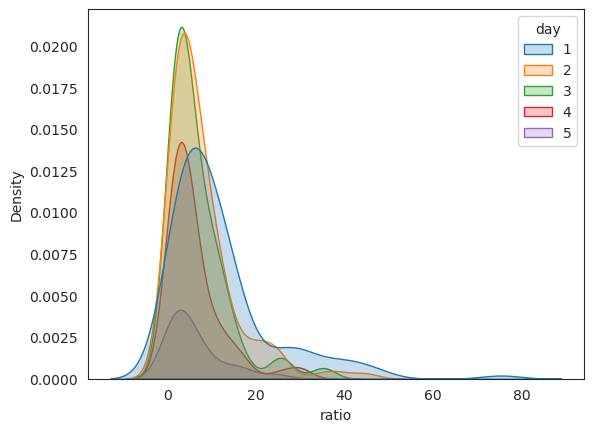

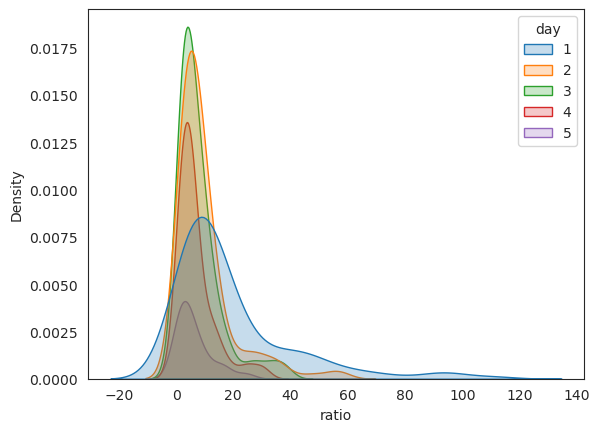

In [147]:
sns.kdeplot(data=DF2,x='ratio',hue='day',fill=True)
plt.show()
sns.kdeplot(data=DF2m,x='ratio',hue='day',fill=True)
plt.show()

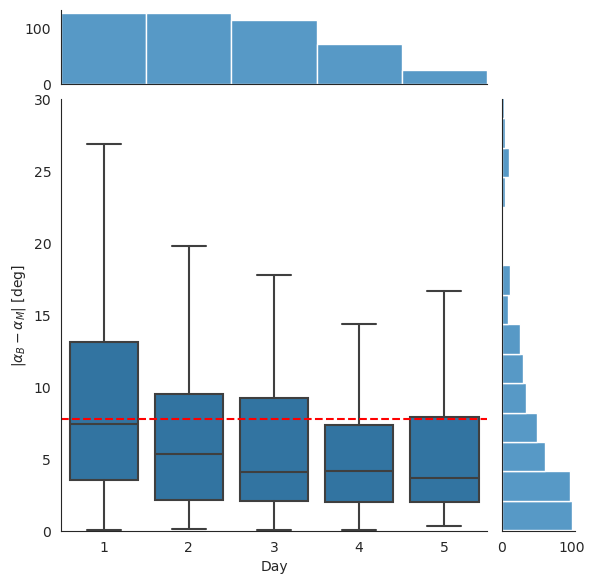

In [96]:
sns.set_style("white")
g=sns.jointplot(data=DF2,x='day',y='ratio', alpha=0, marginal_ticks=True)
g.plot_joint(sns.boxplot, showfliers=False,color=sns.color_palette()[0])
plt.ylim(0,30)
plt.xlabel('Day')
plt.ylabel(r'$|\alpha_B - \alpha_M|$ [deg]')
plt.axhline(DF2.ratio.mean(),linestyle='dashed',color='red')

plt.savefig('./plots/tiltdif.pdf',dpi=300)
plt.savefig('./plots/tiltdif.png',dpi=300)

slope: 8.920334949898647
ord_o: 2.878739505165158
rho_p: 0.44376176254691313
0.9587869613418468


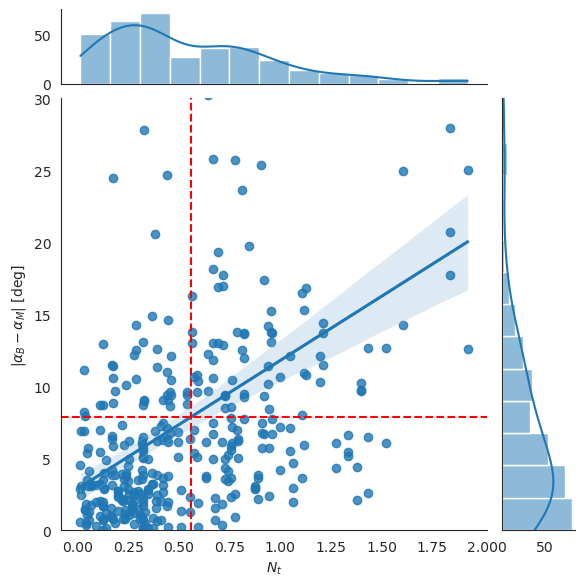

In [124]:
sns.set_style("white")
g=sns.jointplot(data=DF2.assign(N0=DF2['N0'].abs())[(DF2['day']!='4') & (DF2['day']!='5') & (DF2['N0'].abs()<2)],
                x='N0',y='ratio', marginal_ticks=True,kind='reg')
#g.plot_joint(sns.boxplot, showfliers=False,color=sns.color_palette()[0])
plt.ylim(0,30)
plt.xlabel(r'$N_t$')
plt.ylabel(r'$|\alpha_B - \alpha_M|$ [deg]')
plt.axhline(DF2[(DF2['day']!='4') & (DF2['day']!='5') & (DF2['N0'].abs()<2)].ratio.mean(),linestyle='dashed',color='red')
plt.axvline(DF2[(DF2['day']!='4') & (DF2['day']!='5') & (DF2['N0'].abs()<2)].N0.abs().mean(),linestyle='dashed',color='red')


plt.savefig('./plots/tiltdifvsN0.pdf',dpi=300)
plt.savefig('./plots/tiltdifvsN0.png',dpi=300)

x=DF2.assign(N0=DF2['N0'].abs())[(DF2['day']!='4') & (DF2['day']!='5') & (DF2['N0'].abs()<2)].N0
y=DF2.assign(N0=DF2['N0'].abs())[(DF2['day']!='4') & (DF2['day']!='5') & (DF2['N0'].abs()<2)].ratio

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)


#print('      ','bayes             ','Barycenters')
print('slope:',slope)
print('ord_o:',intercept)
print('rho_p:',r_value)
print(std_err)

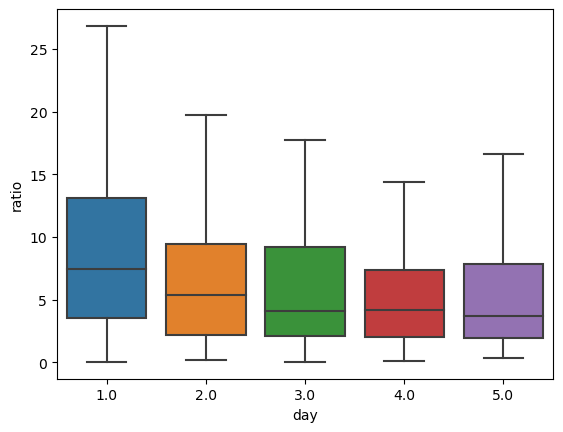

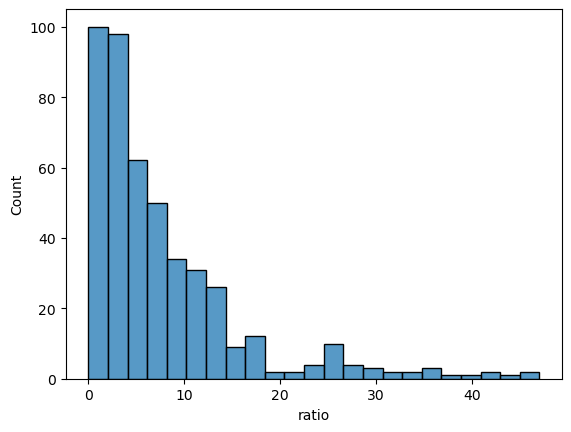

In [50]:
sns.boxplot(data=DF2,x='day',y='ratio', showfliers=False)
plt.show()
sns.histplot(data=DF2[DF2['ratio'] < 300],x='ratio')
plt.show()

In [18]:
DFtilt=pd.concat([DF2[['alphab','Dalphab','fint','lat','N0','AR','day']].assign(method='Barycenters').rename(columns={"Dalphab": "Dalpha","alphab":"alpha"}),
           DF2[['alpha','Dalpha','fint','lat','N0','AR','day']].assign(method='Bayes')])

for l1,l2 in [(0,5),(5,10),(10,15),(15,20),(20,25),(25,30),(30,36)]:
    

    DFtilt.loc[(DFtilt['lat'].abs()>=l1) & (DFtilt['lat'].abs()<l2),'latr']=np.mean([l1,l2])#

In [19]:
DFtilt=DFtilt.assign(alpha=lambda x: -1*x.alpha*np.sign(x.lat))

In [20]:
DFtilt2=DFtilt
DFtilt2['lat']=DFtilt2['lat'].apply(lambda x: np.abs(x))

In [21]:
DFtilt2

alpha     Dalpha      fint   lat        N0     AR  day       method  \
0     2.351784  11.921676  0.200000  11.0 -0.441226   7982  1.0  Barycenters   
1    12.413537   1.859923  0.260000  11.0 -0.441226   7982  2.0  Barycenters   
2    16.616624  -2.343163  0.540000  11.0 -0.441226   7982  3.0  Barycenters   
3    14.891708  -0.618248  0.950000  11.0 -0.441226   7982  4.0  Barycenters   
4   -12.407203  -8.590711  0.850000  21.0  1.521188   8016  1.0  Barycenters   
..         ...        ...       ...   ...       ...    ...  ...          ...   
456  12.218902  -5.856164  0.600000  35.0 -1.109657  11007  3.0        Bayes   
457   7.510755  -1.148017  0.966667  35.0 -1.109657  11007  4.0        Bayes   
458  29.387218  10.415415  0.464286  25.0 -0.760674  11024  1.0        Bayes   
459  22.873291   3.901488  0.775000  25.0 -0.760674  11024  2.0        Bayes   
460  18.167383  -0.804420  0.985714  25.0 -0.760674  11024  3.0        Bayes   

     latr  
0    12.5  
1    12.5  
2    12.5  
3    12.5  
4    22.5  
..    ...  
456  33.0  
457  33.0  
458  27.5  
459  27.5  
460  27.5  

[922 rows x 9 columns]

       bayes              Barycenters
slope: 0.25560934898764404 0.4464834874874312
ord_o: 3.294991542994471 -1.5391140239951735
rho_p: 0.1399763524396601 0.23537324353468658


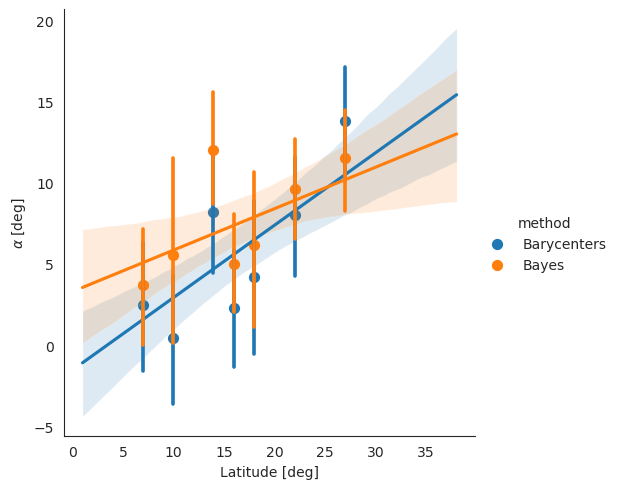

In [162]:

#sns.histplot(data=DFtilt2[DFtilt2['method']=='Bayes'],x='lat',bins=7)
#plt.show()
sns.lmplot(data=DFtilt2[DFtilt2['day']<4],x='lat',y='alpha',hue='method',x_bins=7,order=1)

plt.ylabel(r'$\alpha$ [deg]')

plt.xlabel('Latitude [deg]')

plt.savefig('./plots/joy.pdf',dpi=300)
plt.savefig('./plots/joy.png',dpi=300)

slope, intercept, r_value, p_value, std_err = stats.linregress(DFtilt2[(DFtilt2['method']=='Bayes') & (DFtilt2['day']<4)].lat,
                                                               DFtilt2[(DFtilt2['method']=='Bayes') & (DFtilt2['day']<4)].alpha)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(DFtilt2[(DFtilt2['method']=='Barycenters') & (DFtilt2['day']<4)].lat,
                                                                    DFtilt2[(DFtilt2['method']=='Barycenters') & (DFtilt2['day']<4)].alpha)




print('      ','bayes             ','Barycenters')
print('slope:',slope,slope2)
print('ord_o:',intercept,intercept2)
print('rho_p:',r_value,r_value2)


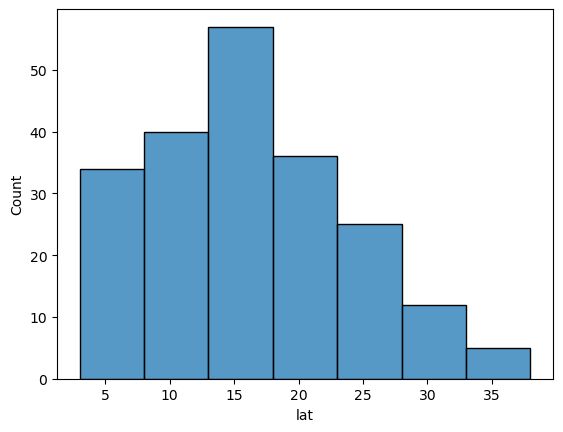

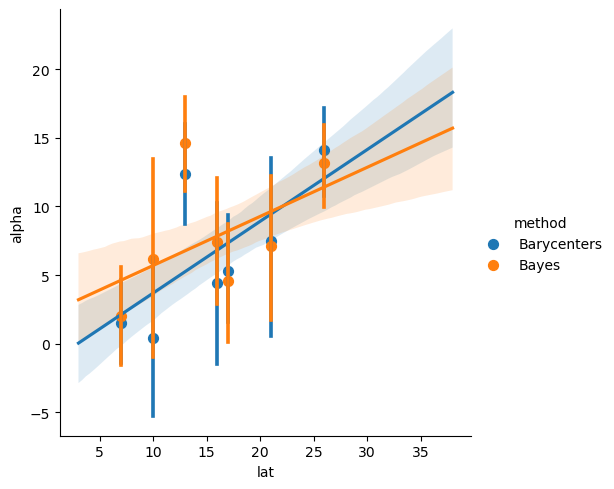

       bayes              Barycenters
slope: 0.3571441487492507 0.5220013201493309
ord_o: 2.1324537603078566 -1.523107041594515
rho_p: 0.21265786113503135 0.3089246080415385


In [25]:

sns.histplot(data=DFtilt2[(DFtilt2['method']=='Bayes') & (DFtilt2['day']>2)],x='lat',bins=7)
plt.show()
sns.lmplot(data=DFtilt2[DFtilt2['day']>2],x='lat',y='alpha',hue='method',x_bins=7,order=1)
plt.show()



slope, intercept, r_value, p_value, std_err = stats.linregress(DFtilt2[(DFtilt2['method']=='Bayes') & (DFtilt2['day']>2)].lat,
                                                               DFtilt2[(DFtilt2['method']=='Bayes') & (DFtilt2['day']>2)].alpha)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(DFtilt2[(DFtilt2['method']=='Barycenters') & (DFtilt2['day']>2)].lat,
                                                                    DFtilt2[(DFtilt2['method']=='Barycenters') & (DFtilt2['day']>2)].alpha)


print('      ','bayes             ','Barycenters')
print('slope:',slope,slope2)
print('ord_o:',intercept,intercept2)
print('rho_p:',r_value,r_value2)

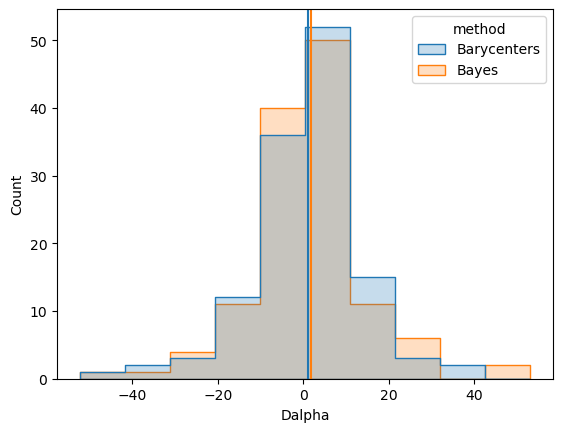

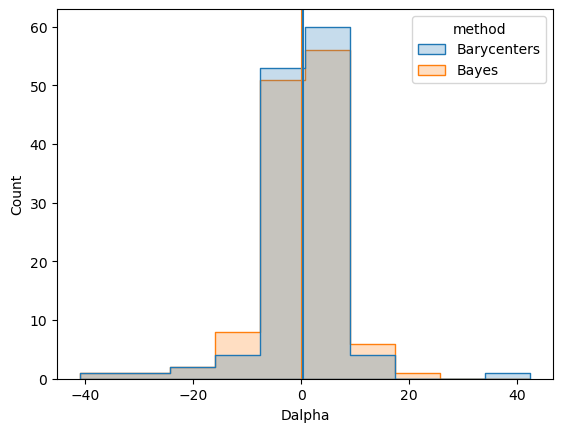

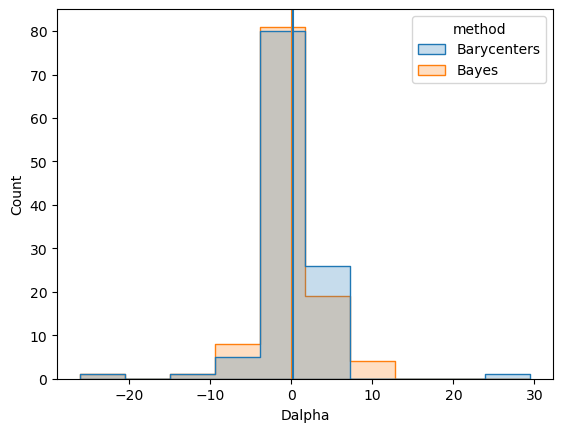

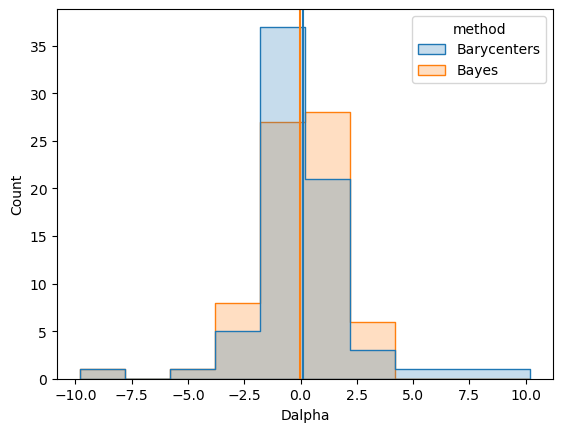

In [29]:


for dd in [1,2,3,4]:
    x=DFtilt2[(DFtilt2['day']==dd)]

    sns.histplot(data=x,hue='method',x='Dalpha',bins=10, element="step")
    plt.axvline(x[x['method']=='Bayes'].Dalpha.mean(),c='tab:orange')
    plt.axvline(x[x['method']=='Barycenters'].Dalpha.mean(),c='tab:blue')

    plt.show()

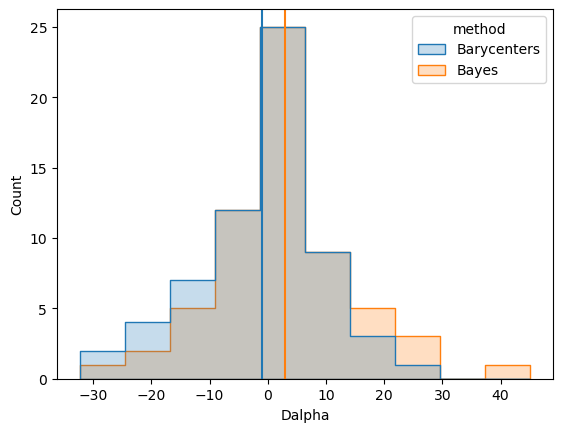

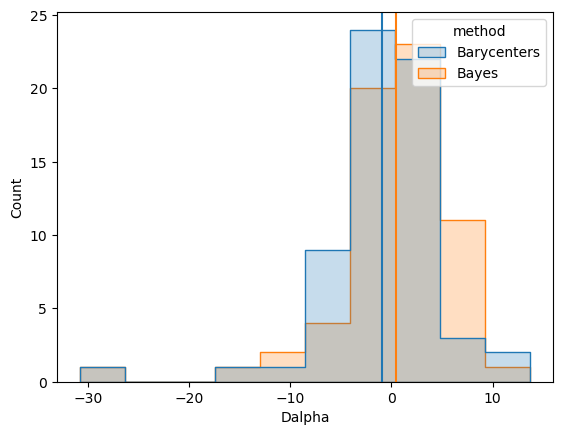

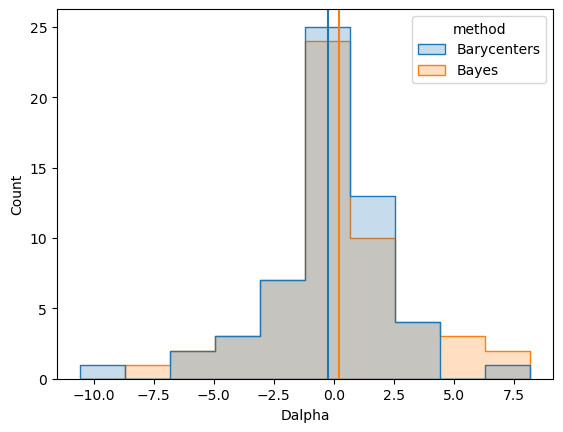

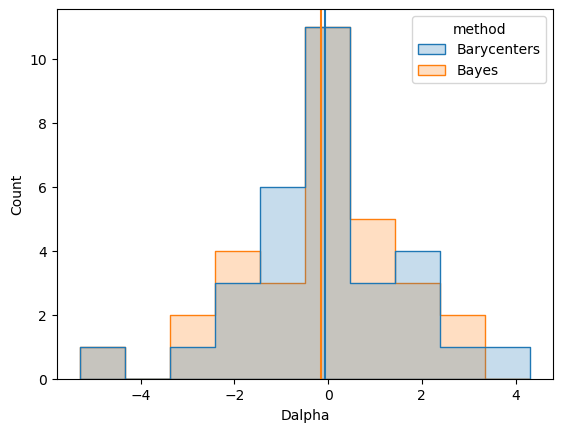

In [27]:


for dd in [1,2,3,4]:
    x=DFtilt2[(DFtilt2['N0']>0) & (DFtilt2['day']==dd)]

    sns.histplot(data=x,hue='method',x='Dalpha',bins=10, element="step")
    plt.axvline(x[x['method']=='Bayes'].Dalpha.mean(),c='tab:orange')
    plt.axvline(x[x['method']=='Barycenters'].Dalpha.mean(),c='tab:blue')

    plt.show()

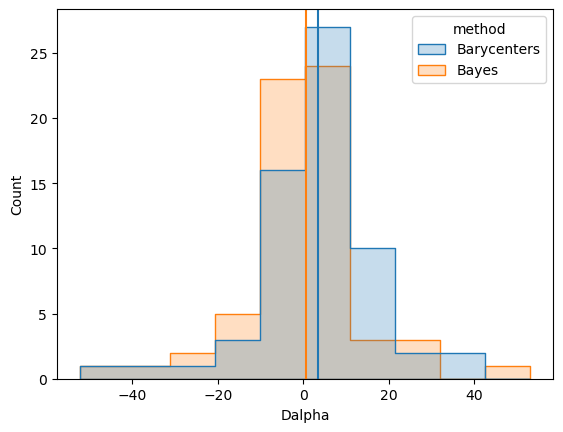

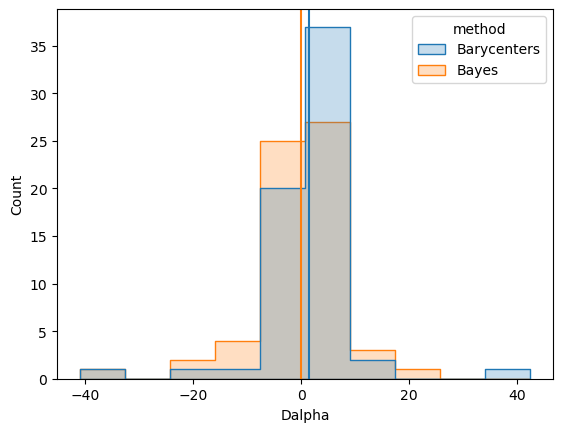

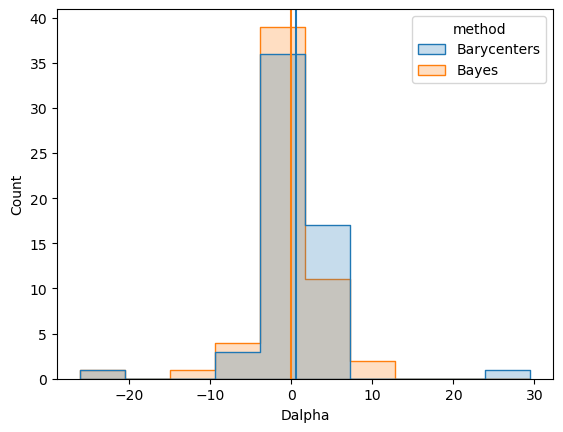

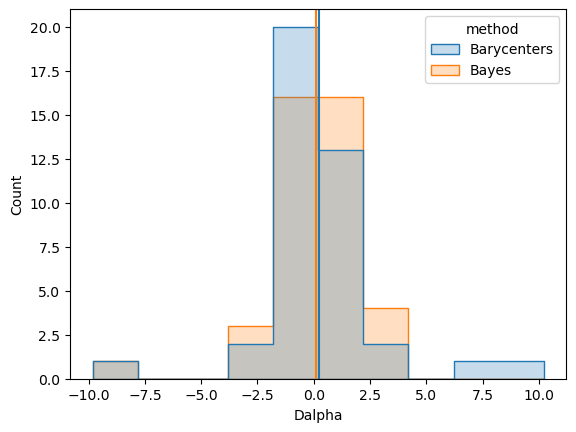

In [28]:


for dd in [1,2,3,4]:
    x=DFtilt2[(DFtilt2['N0']<0) & (DFtilt2['day']==dd)]

    sns.histplot(data=x,hue='method',x='Dalpha',bins=10, element="step")
    plt.axvline(x[x['method']=='Bayes'].Dalpha.mean(),c='tab:orange')
    plt.axvline(x[x['method']=='Barycenters'].Dalpha.mean(),c='tab:blue')

    plt.show()

# Tilt Plots differences by flux

In [108]:
DF2.keys()
DF2=DF2.assign(ratio=lambda x: np.abs(x.alphab-x.alpha))

In [112]:
grouped_data[grouped_data['lat']>0][['alpha','alphab','ratio']]

alpha     alphab      ratio
AR                                    
7982   16.444794   0.199957  31.075150
8016   22.517168   3.816492  42.291715
8040   13.196164   4.283466  12.829671
8052   11.798209  10.261336   7.295025
8056   10.364581  88.910262  78.545681
...          ...        ...        ...
10900  41.486721   3.912694  51.268385
10971  14.789953   2.587836  20.109821
10987  20.755718   4.843283  17.103831
11007  18.698955   3.642645  22.431029
11024   0.603755  48.786522  76.589610

[126 rows x 3 columns]

Text(0.05, 0.95, 'Slope = -9.44\n$r = -0.12$')

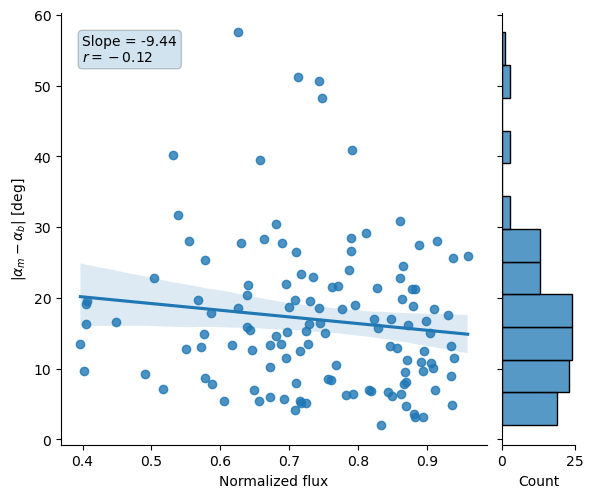

In [109]:
# Calcular la pendiente y el coeficiente de correlación

grouped_data=DF2.groupby(['AR']).mean()
x = grouped_data['fint']
y = grouped_data['ratio']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=grouped_data, x="fint", y="ratio", marginal_ticks=True)

# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=grouped_data, x="fint", y="ratio", ax=g.ax_joint)
#sns.regplot(data=DF2, x="fint", y="alphab", ax=g.ax_joint, x_bins=20)

# Eliminar la marginal del eje x y mantener la del eje y
g.ax_marg_x.remove()  # Elimina la marginal superior
sns.histplot(data=grouped_data, y="ratio", ax=g.ax_marg_y, kde=False)
#sns.histplot(data=DF2, y="alphab", ax=g.ax_marg_y, kde=False)


# Etiquetas de los ejes
g.ax_joint.set_xlabel('Normalized flux')
g.ax_joint.set_ylabel(r'$|\alpha_m - \alpha_b|$ [deg]')

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.95, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.2))

Text(0.05, 0.95, 'Slope = 2.56\n$r = 0.04$')

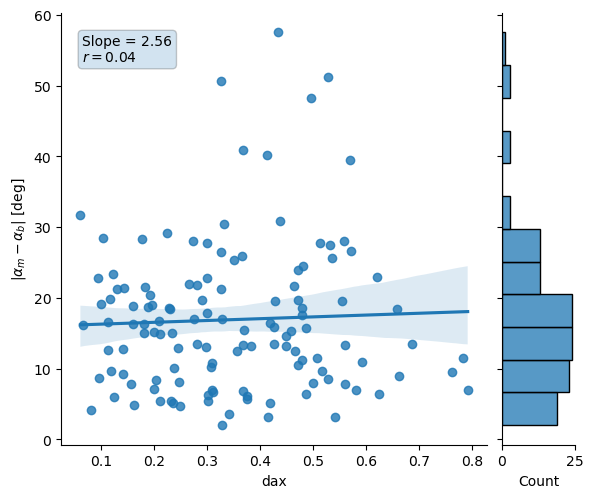

In [114]:
# Calcular la pendiente y el coeficiente de correlación

grouped_data=DF2.groupby(['AR']).mean()
x = grouped_data['da']
y = grouped_data['ratio']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=grouped_data, x="da", y="ratio", marginal_ticks=True)

# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=grouped_data, x="da", y="ratio", ax=g.ax_joint)
#sns.regplot(data=DF2, x="fint", y="alphab", ax=g.ax_joint, x_bins=20)

# Eliminar la marginal del eje x y mantener la del eje y
g.ax_marg_x.remove()  # Elimina la marginal superior
sns.histplot(data=grouped_data, y="ratio", ax=g.ax_marg_y, kde=False)
#sns.histplot(data=DF2, y="alphab", ax=g.ax_marg_y, kde=False)


# Etiquetas de los ejes
g.ax_joint.set_xlabel('dax')
g.ax_joint.set_ylabel(r'$|\alpha_m - \alpha_b|$ [deg]')

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.95, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.2))

Text(0.05, 0.95, 'Slope = -0.32\n$r = -0.02$')

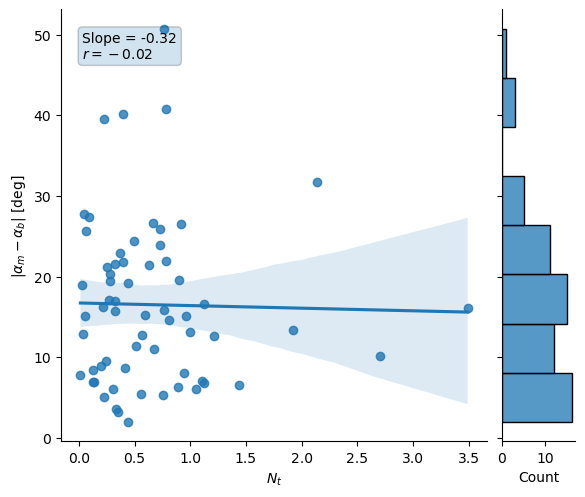

In [117]:
# Calcular la pendiente y el coeficiente de correlación

grouped_data=DF2[DF2['N0']<0].groupby(['AR']).mean().abs()
x = grouped_data['N0']
y = grouped_data['ratio']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Crear el JointPlot con regplot y bins personalizados
g = sns.JointGrid(data=grouped_data, x="N0", y="ratio", marginal_ticks=True)

# Dibujar el regplot en el centro con 20 bins
sns.regplot(data=grouped_data, x="N0", y="ratio", ax=g.ax_joint)
#sns.regplot(data=DF2, x="fint", y="alphab", ax=g.ax_joint, x_bins=20)

# Eliminar la marginal del eje x y mantener la del eje y
g.ax_marg_x.remove()  # Elimina la marginal superior
sns.histplot(data=grouped_data, y="ratio", ax=g.ax_marg_y, kde=False)
#sns.histplot(data=DF2, y="alphab", ax=g.ax_marg_y, kde=False)


# Etiquetas de los ejes
g.ax_joint.set_xlabel(r'$N_t$')
g.ax_joint.set_ylabel(r'$|\alpha_m - \alpha_b|$ [deg]')

# Agregar la pendiente y el coeficiente de correlación al gráfico
textstr = f"Slope = {slope:.2f}\n$r = {r_value:.2f}$"
g.ax_joint.text(0.05, 0.95, textstr, transform=g.ax_joint.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.2))

In [147]:
DF2=DF.groupby(['AR','fint']).mean().reset_index()
DF2['alpha']=DF2['alpha'].apply(lambda x: x*180/np.pi)
#DF2['alphab']=DF2['alphab'].apply(lambda x: x)

In [148]:
DF2.loc[DF2['AR']==10268][['alpha','alphab']]

alpha     alphab
723 -16.572604  21.005488
724 -14.612270  17.443277
725  -8.007114  22.364704
726  -1.570566  29.651023
727  -3.647674  30.298176
728  -6.696116  29.217896
729 -14.826454  22.316217
730 -20.578873   7.354240
731 -20.035759  -2.277400
732 -20.517179 -10.120204

In [149]:
DF2=DF2.assign(ratio=lambda x: 100*np.abs(x.alphab-x.alpha)/np.abs(x.alpha))

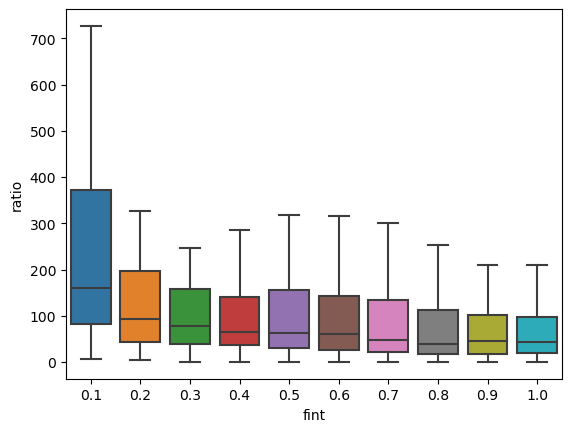

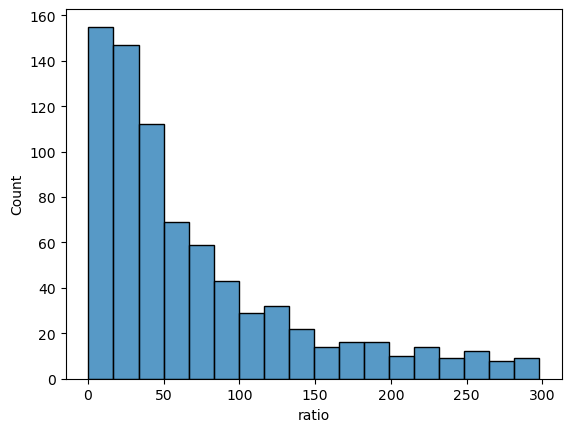

In [151]:
sns.boxplot(data=DF2,x='fint',y='ratio', showfliers=False)
plt.show()
sns.histplot(data=DF2[DF2['ratio'] < 300],x='ratio')
plt.show()

# Tilt old

In [71]:
DF2=DF.groupby(['AR','fint']).mean().reset_index()
DF2['alpha']=DF['alpha'].apply(lambda x: x*180/np.pi)

DFtilt=pd.concat([DF2[['alphab','Dalphab','fint','lat','N0','AR','day']].assign(method='Barycenters').rename(columns={"Dalphab": "Dalpha","alphab":"alpha"}),
           DF2[['alpha','Dalpha','fint','lat','N0','AR','day']].assign(method='Bayes')])

In [72]:
#DFtilt=DFtilt.assign(latr=np.mean([l1,l2]))#

for l1,l2 in [(0,5),(5,10),(10,15),(15,20),(20,25),(25,30),(30,35)]:
    

    DFtilt.loc[(DFtilt['lat'].abs()>=l1) & (DFtilt['lat'].abs()<l2),'latr']=np.mean([l1,l2])#
    
    

In [68]:
DFtilt

alpha     Dalpha  fint   lat        N0     AR       day       method  \
0    -4.098208  10.175253   0.2  11.0 -0.441226   7982  1.285714  Barycenters   
1   -15.046384  -0.772924   0.3  11.0 -0.441226   7982  2.000000  Barycenters   
2   -16.228556  -1.955096   0.4  11.0 -0.441226   7982  3.000000  Barycenters   
3   -17.693465  -3.420004   0.5  11.0 -0.441226   7982  3.000000  Barycenters   
4   -16.527711  -2.254251   0.6  11.0 -0.441226   7982  3.000000  Barycenters   
..         ...        ...   ...   ...       ...    ...       ...          ...   
858  17.333916   9.074335   0.6 -25.0 -0.760674  11024  1.000000        Bayes   
859  16.309627   6.920436   0.7 -25.0 -0.760674  11024  1.875000        Bayes   
860  16.902818   2.416472   0.8 -25.0 -0.760674  11024  2.000000        Bayes   
861  16.548368  -0.072055   0.9 -25.0 -0.760674  11024  2.400000        Bayes   
862  15.896898  -0.814370   1.0 -25.0 -0.760674  11024  3.000000        Bayes   

     latr  
0    12.5  
1    12.5  
2    12.5  
3    12.5  
4    12.5  
..    ...  
858  27.5  
859  27.5  
860  27.5  
861  27.5  
862  27.5  

[1726 rows x 9 columns]

<AxesSubplot: xlabel='latr', ylabel='alpha'>

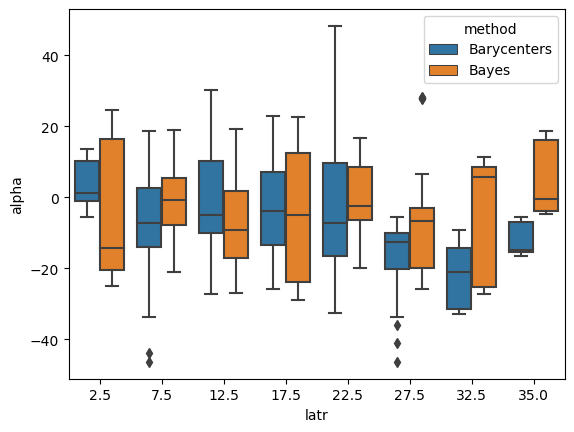

In [51]:
sns.boxplot(data=DFtilt[(DFtilt['lat']>0) & (DFtilt['fint']>0.3)],x='latr',y='alpha',hue='method')

               Dalpha  fint  lat        N0      AR
method                                            
Barycenters -1.287112   0.7 -6.0  0.126958  9678.0
Bayes       -0.168005   0.7 -6.0  0.126958  9678.0


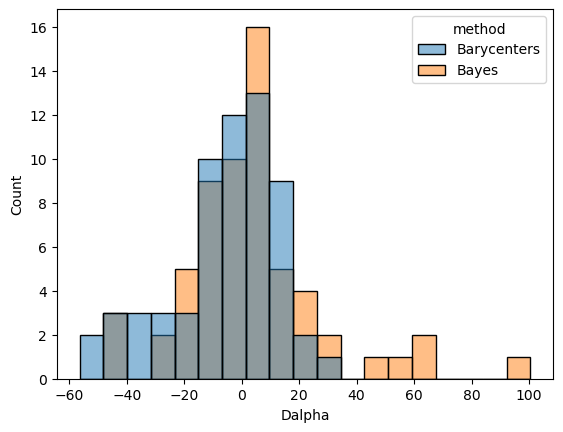

               Dalpha  fint   lat        N0      AR
method                                             
Barycenters  0.965290   0.7  11.0 -0.280802  9291.0
Bayes       -0.242572   0.7  11.0 -0.280802  9291.0


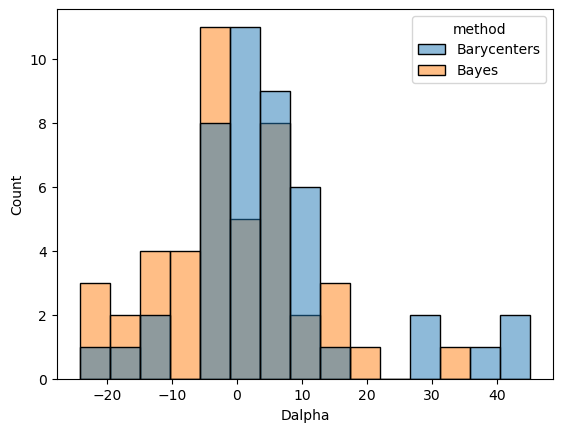

              Dalpha  fint   lat       N0      AR
method                                           
Barycenters  2.10036   0.7 -15.0 -0.09328  9154.0
Bayes        1.24194   0.7 -15.0 -0.09328  9154.0


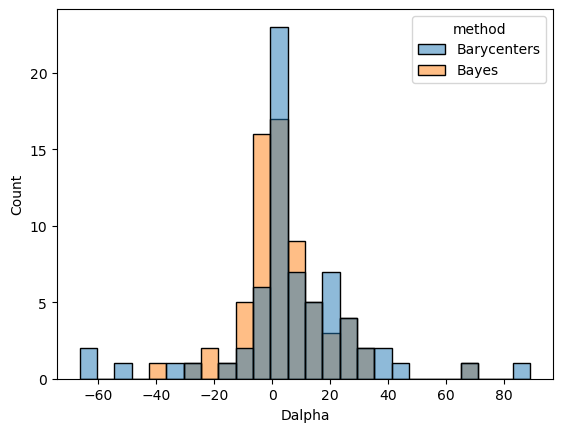

               Dalpha  fint   lat        N0      AR
method                                             
Barycenters  0.391815   0.7 -20.5  0.113464  8589.0
Bayes        1.021606   0.7 -20.5  0.113464  8589.0


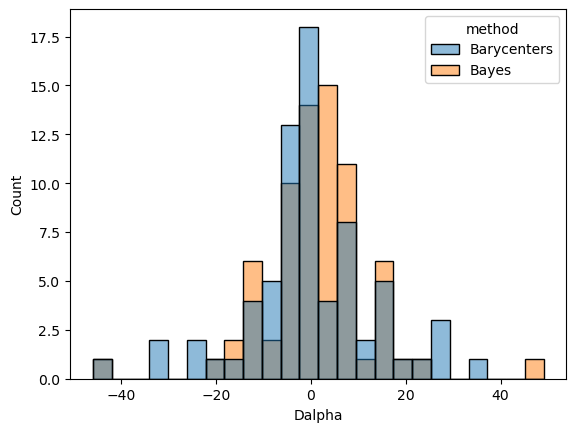

               Dalpha  fint   lat       N0      AR
method                                            
Barycenters -0.190019  0.65  31.5  0.44688  8884.5
Bayes        0.502927  0.65  31.5  0.44688  8884.5


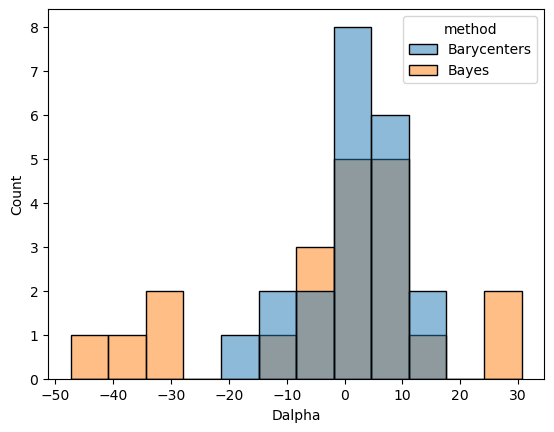

In [15]:
for l1,l2 in [(5,10),(10,15),(15,20),(20,30),(30,40)]:

    DFt0=DFtilt[(DFtilt['lat'].abs()>=l1) & (DFtilt['lat'].abs()<l2)]#.assign(Dalpha=lambda x: np.abs(x.Dalpha))
    sns.histplot(data=DFt0[DFt0['fint']<0.6
                          ],x='Dalpha', hue='method')
    print(DFt0.groupby('method').median())
    plt.show()

In [ ]:
DFtilt=DFtilt.assign(Tsign='positive')
DFtilt.loc[DFtilt['N0']<0,'Tsign']='negative'


# Tilt by day

In [69]:
DF2=DF.groupby(['AR','day']).mean().reset_index()
DF2['alpha']=DF['alpha'].apply(lambda x: x*180/np.pi)

DFtilt=pd.concat([DF2[['alphab','Dalphab','fint','lat','N0','AR','day']].assign(method='Barycenters').rename(columns={"Dalphab": "Dalpha","alphab":"alpha"}),
           DF2[['alpha','Dalpha','fint','lat','N0','AR','day']].assign(method='Bayes')])

In [70]:
#DFtilt=DFtilt.assign(latr=np.mean([l1,l2]))#

for l1,l2 in [(0,5),(5,10),(10,15),(15,20),(20,25),(25,30),(30,35)]:
    

    DFtilt.loc[(DFtilt['lat'].abs()>=l1) & (DFtilt['lat'].abs()<l2),'latr']=np.mean([l1,l2])#

In [ ]:
DFx1=DFtilt.groupby(['AR','method']).mean().reset_index()
arsp=DFx1[DFx1['Dalpha'] > 0]['AR'].values
arsn=DFx1[DFx1['Dalpha'] < 0]['AR'].values

In [ ]:
sns.scatterplot(data=DF.groupby('AR').mean().reset_index(),x = 'N0', y ='Dalpha')

In [10]:
DFtilt[DFtilt['AR'].isin(arsp)]

NameError: name 'DFtilt' is not defined

In [116]:
len(DFx1[(DFx1.Dalpha > 0) & (DFx1.N0 > 0)])

71

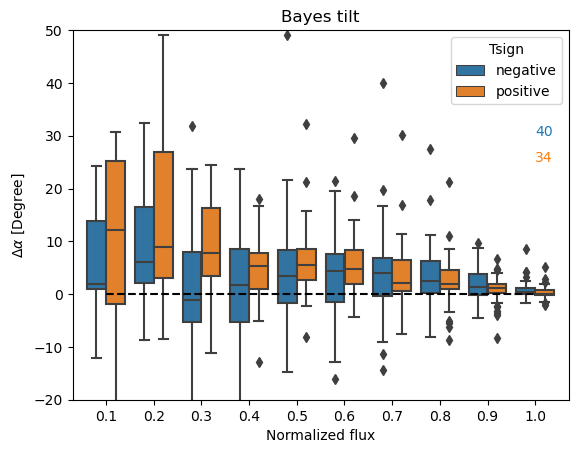

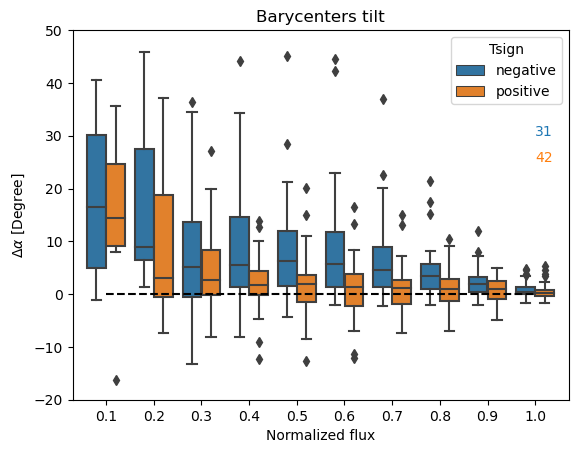

In [119]:
f=plt.figure()

ax=f.gca()
DFbayes=DFtilt[DFtilt['method'] =='Bayes']
DFbayes1=DFx1[DFx1['method'] =='Bayes']

s1=sns.boxplot(data=DFbayes[DFbayes['AR'].isin(arsp)],y='Dalpha',x='fint',hue='Tsign',ax=ax)
plt.ylim(-20,50)
#ax.legend([],[],frameon=False)
#s2=sns.boxplot(data=DFbayes[DFbayes['AR'].isin(arsn)],y='Dalpha',x='fint',hue='Tsign',ax=ax)
plt.hlines(0,0,9,color='black',linestyle='dashed')
plt.xlabel('Normalized flux')
plt.ylabel(r'$\Delta \alpha$ [Degree]')
plt.text(9,30,str(len(DFbayes1[(DFbayes1.Dalpha > 0) & (DFbayes1.N0 > 0)])),color='Tab:blue',)
plt.text(9,25,str(len(DFbayes1[(DFbayes1.Dalpha > 0) & (DFbayes1.N0 < 0)])),color='Tab:orange')

plt.title('Bayes tilt')
plt.show()

f=plt.figure()

ax=f.gca()
DFbarys=DFtilt[DFtilt['method'] =='Barycenters']
DFbarys1=DFx1[DFx1['method'] =='Barycenters']

s1=sns.boxplot(data=DFbarys[DFbarys['AR'].isin(arsp)],y='Dalpha',x='fint',hue='Tsign',ax=ax)
plt.ylim(-20,50)
#ax.legend([],[],frameon=False)
#s2=sns.boxplot(data=DFbayes[DFbayes['AR'].isin(arsn)],y='Dalpha',x='fint',hue='Tsign',ax=ax)
plt.hlines(0,0,9,color='black',linestyle='dashed')
plt.xlabel('Normalized flux')
plt.ylabel(r'$\Delta \alpha$ [Degree]')
plt.text(9,30,str(len(DFbarys1[(DFbarys1.Dalpha > 0) & (DFbarys1.N0 > 0)])),color='Tab:blue',)
plt.text(9,25,str(len(DFbarys1[(DFbarys1.Dalpha > 0) & (DFbarys1.N0 < 0)])),color='Tab:orange')

plt.title('Barycenters tilt')
plt.show()

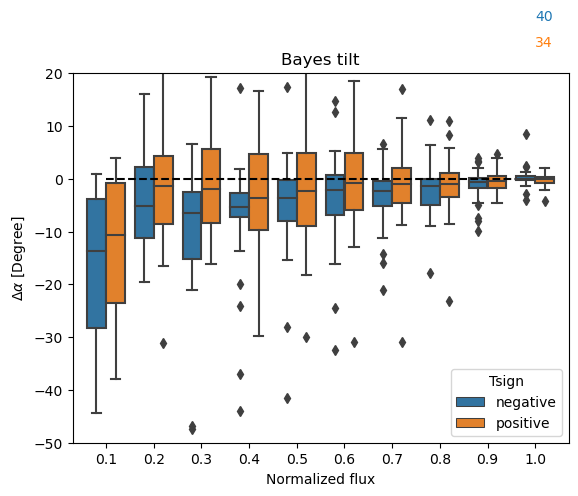

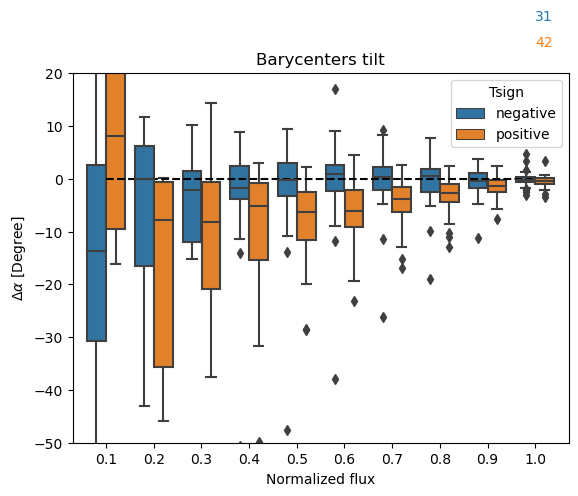

In [121]:
f=plt.figure()

ax=f.gca()
DFbayes=DFtilt[DFtilt['method'] =='Bayes']
DFbayes1=DFx1[DFx1['method'] =='Bayes']

s1=sns.boxplot(data=DFbayes[DFbayes['AR'].isin(arsn)],y='Dalpha',x='fint',hue='Tsign',ax=ax)
plt.ylim(-50,20)
#ax.legend([],[],frameon=False)
#s2=sns.boxplot(data=DFbayes[DFbayes['AR'].isin(arsn)],y='Dalpha',x='fint',hue='Tsign',ax=ax)
plt.hlines(0,0,9,color='black',linestyle='dashed')
plt.xlabel('Normalized flux')
plt.ylabel(r'$\Delta \alpha$ [Degree]')
plt.text(9,30,str(len(DFbayes1[(DFbayes1.Dalpha > 0) & (DFbayes1.N0 > 0)])),color='Tab:blue',)
plt.text(9,25,str(len(DFbayes1[(DFbayes1.Dalpha > 0) & (DFbayes1.N0 < 0)])),color='Tab:orange')

plt.title('Bayes tilt')
plt.show()

f=plt.figure()

ax=f.gca()
DFbarys=DFtilt[DFtilt['method'] =='Barycenters']
DFbarys1=DFx1[DFx1['method'] =='Barycenters']

s1=sns.boxplot(data=DFbarys[DFbarys['AR'].isin(arsn)],y='Dalpha',x='fint',hue='Tsign',ax=ax)
plt.ylim(-50,20)
#ax.legend([],[],frameon=False)
#s2=sns.boxplot(data=DFbayes[DFbayes['AR'].isin(arsn)],y='Dalpha',x='fint',hue='Tsign',ax=ax)
plt.hlines(0,0,9,color='black',linestyle='dashed')
plt.xlabel('Normalized flux')
plt.ylabel(r'$\Delta \alpha$ [Degree]')
plt.text(9,30,str(len(DFbarys1[(DFbarys1.Dalpha > 0) & (DFbarys1.N0 > 0)])),color='Tab:blue',)
plt.text(9,25,str(len(DFbarys1[(DFbarys1.Dalpha > 0) & (DFbarys1.N0 < 0)])),color='Tab:orange')

plt.title('Barycenters tilt')
plt.show()

In [62]:
pd.melt(DF2,id_vars='fint',value_vars=['slead','sfol'])

Dalpha  fint   lat        N0     AR       method
0    11.618518   0.2  11.0 -0.441226   7982  Barycenters
1    -0.599278   0.3  11.0 -0.441226   7982  Barycenters
2    -1.585594   0.4  11.0 -0.441226   7982  Barycenters
3    -3.195044   0.5  11.0 -0.441226   7982  Barycenters
4    -2.125612   0.6  11.0 -0.441226   7982  Barycenters
..         ...   ...   ...       ...    ...          ...
858   9.074335   0.6 -25.0 -0.760674  11024        Bayes
859   6.920436   0.7 -25.0 -0.760674  11024        Bayes
860   2.416472   0.8 -25.0 -0.760674  11024        Bayes
861  -0.072055   0.9 -25.0 -0.760674  11024        Bayes
862  -0.814370   1.0 -25.0 -0.760674  11024        Bayes

[1726 rows x 6 columns]

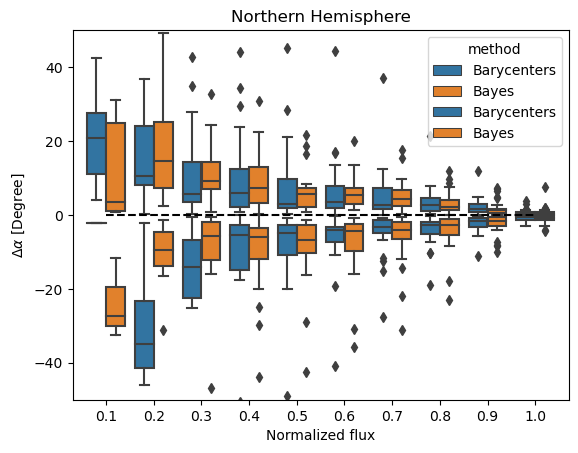

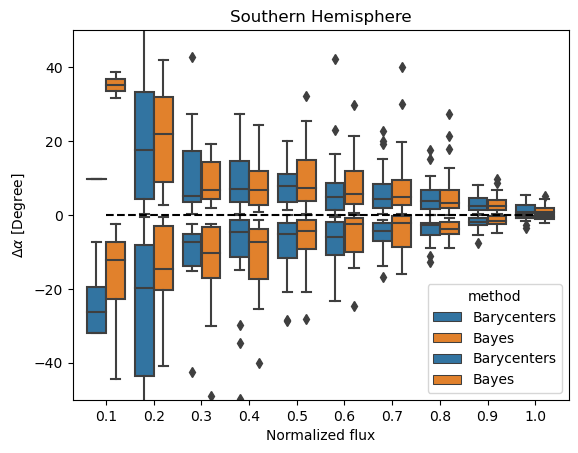

In [49]:

f=plt.figure()

ax=f.gca()


DFx1=DFtilt[DFtilt['Dalpha'] >= 0]
DFx2=DFtilt[DFtilt['Dalpha'] < 0]

s1=sns.boxplot(data=DFx1[DFx1['lat'] > 0],y='Dalpha',x='fint',hue='method',ax=ax)
plt.ylim(-50,50)
ax.legend([],[],frameon=False)
s2=sns.boxplot(data=DFx2[DFx2['lat'] > 0],y='Dalpha',x='fint',hue='method',ax=ax)
plt.hlines(0,0,9,color='black',linestyle='dashed')
plt.xlabel('Normalized flux')
plt.ylabel(r'$\Delta \alpha$ [Degree]')
plt.title('Northern Hemisphere')
plt.show()

f=plt.figure()

ax=f.gca()


DFx1=DFtilt[DFtilt['Dalpha'] >= 0]
DFx2=DFtilt[DFtilt['Dalpha'] < 0]

s1=sns.boxplot(data=DFx1[DFx1['lat'] < 0],y='Dalpha',x='fint',hue='method',ax=ax)
plt.ylim(-50,50)
ax.legend([],[],frameon=False)
s2=sns.boxplot(data=DFx2[DFx2['lat'] < 0],y='Dalpha',x='fint',hue='method',ax=ax)
plt.hlines(0,0,9,color='black',linestyle='dashed')
plt.xlabel('Normalized flux')
plt.ylabel(r'$\Delta \alpha$ [Degree]')
plt.title('Southern Hemisphere')
plt.show()

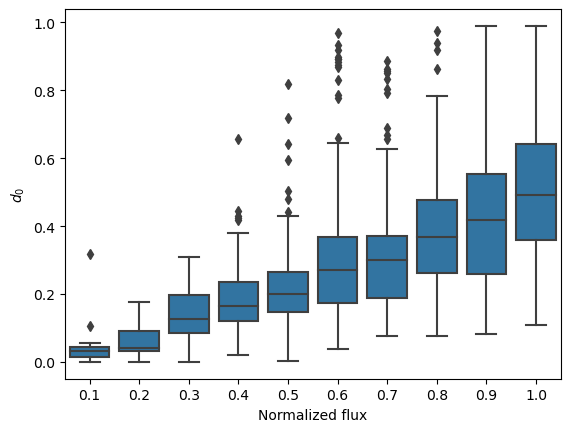

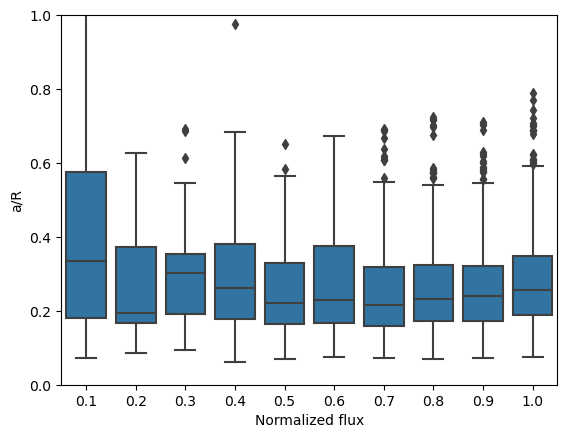

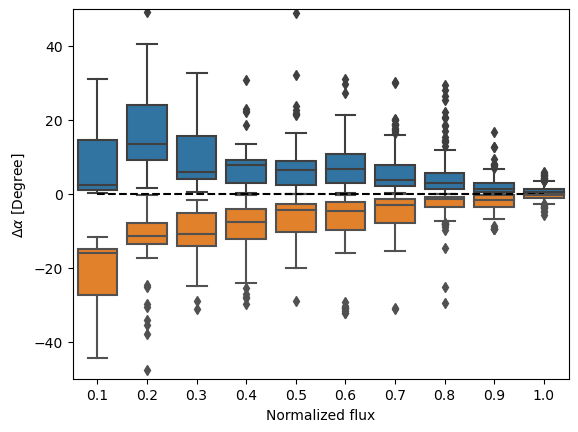

In [146]:
sns.boxplot(data=DF,y='da',x='fint',color='tab:blue')
plt.ylabel(r'$d_0$')
plt.xlabel('Normalized flux')

plt.show()
sns.boxplot(data=DF.assign(test=lambda x: x.a/x.R),y='test',x='fint',color='tab:blue')
plt.ylim(0,1)
plt.ylabel('a/R')
plt.xlabel('Normalized flux')
plt.show()
sns.boxplot(data=DF[DF['Dalpha'] >= 0],y='Dalpha',x='fint',color='tab:blue')
plt.ylim(-50,50)
sns.boxplot(data=DF[DF['Dalpha'] <= 0],y='Dalpha',x='fint',color='tab:orange')
plt.hlines(0,0,9,color='black',linestyle='dashed')
plt.xlabel('Normalized flux')
plt.ylabel(r'$\Delta \alpha$ [Degree]')
plt.show()



Unnamed: 0        da     alpha         a          R        N0  \
mag                                                                   
0.0       1999.5  0.062364 -0.225316  6.537552  16.688203  0.108973   
1.0       1999.5  0.086887 -0.204451  6.548038  16.688203  0.108973   
2.0       1999.5  0.112034 -0.125421  6.283701  16.688203  0.108973   
3.0       1999.5  0.128991 -0.048787  6.213070  16.688203  0.108973   
4.0       1999.5  0.140907  0.028720  6.087542  16.688203  0.108973   
...          ...       ...       ...       ...        ...       ...   
15.0      1999.5  0.639193  0.196855  7.053864  17.090484  0.642047   
16.0      1999.5  0.680695  0.216706  7.258095  17.090484  0.642047   
17.0      1999.5  0.738707  0.237531  7.816046  17.090484  0.642047   
18.0      1999.5  0.772338  0.245036  8.689684  17.090484  0.642047   
19.0      1999.5  0.790483  0.283130  9.255761  17.090484  0.642047   

                axf         xc         yc     Dalpha          flux  fint  \
mag                                                                        
0.0   373098.306033  47.208079  36.376521 -35.426850  1.434306e+21   0.2   
1.0   373098.306033  47.133395  36.253265 -34.231355  1.663511e+21   0.2   
2.0   373098.306033  46.938465  35.975563 -29.703280  1.880387e+21   0.2   
3.0   373098.306033  46.862498  35.730582 -25.312441  2.120593e+21   0.2   
4.0   373098.306033  46.751960  35.577666 -20.871641  2.242438e+21   0.3   
...             ...        ...        ...        ...           ...   ...   
15.0   97699.081224  36.546998  34.123065  -4.943149  2.655314e+21   1.0   
16.0   97699.081224  36.575320  34.064905  -3.805815  2.683865e+21   1.0   
17.0   97699.081224  36.637749  33.886106  -2.612603  2.624578e+21   1.0   
18.0   97699.081224  36.699790  33.911441  -2.182588  2.532232e+21   0.9   
19.0   97699.081224  37.213752  33.630595   0.000000  2.447708e+21   0.9   

         AR  
mag          
0.0   10132  
1.0   10132  
2.0   10132  
3.0   10132  
4.0   10132  
...     ...  
15.0   8060  
16.0   8060  
17.0   8060  
18.0   8060  
19.0   8060  

[1668 rows x 13 columns]

In [178]:
np.corrcoef(DF.axf,DF.flux)[0][1]

0.7528637185171564

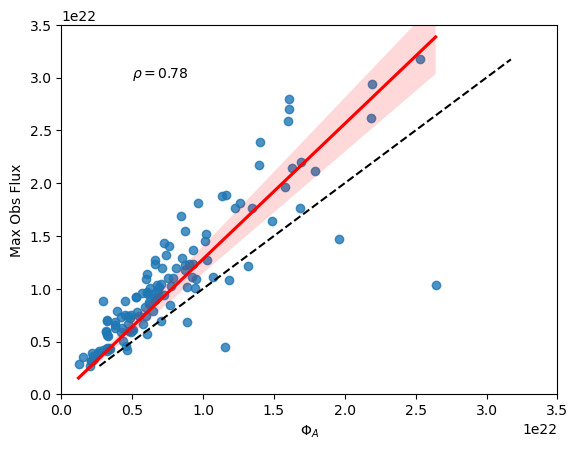

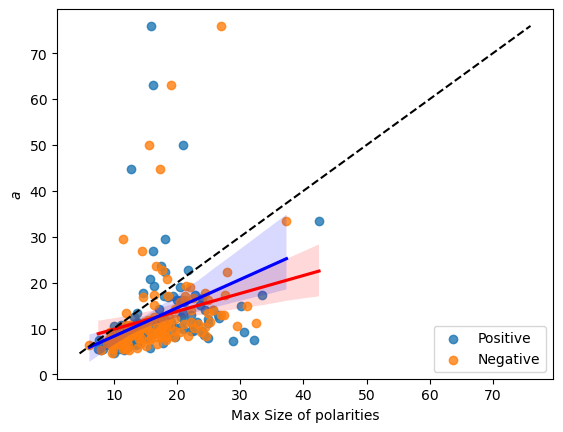

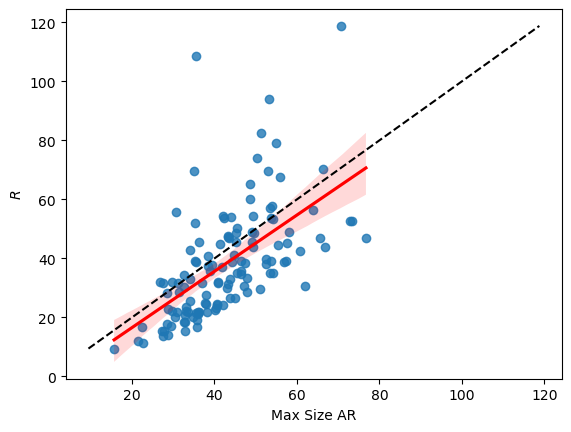

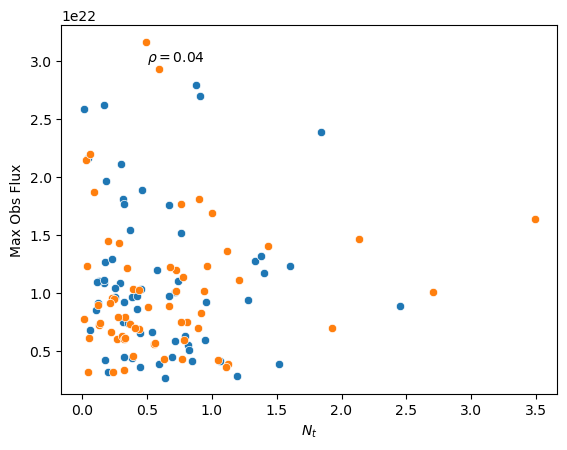

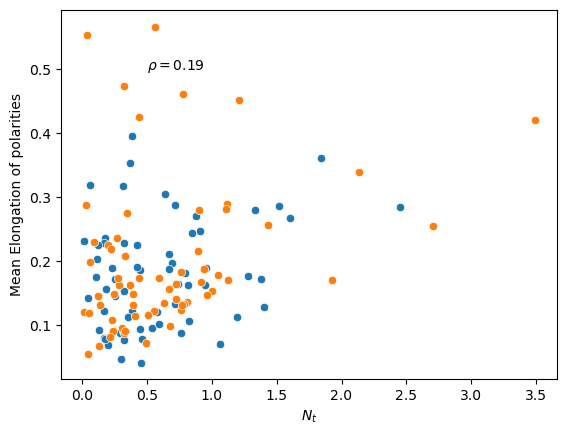

In [47]:


sns.regplot(data=DF.groupby('AR').max(),x='axf',y='flux',line_kws=dict(color="r"))
plt.ylim(0,3.5e22)
plt.xlim(0,3.5e22)
plt.xlabel(r'$\Phi_A$')
plt.ylabel(r'Max Obs Flux')
plt.text(0.5e22,3e22,r'$\rho = $'+'{0:.2f}'.format(np.corrcoef(DF.axf,DF.flux)[0][1]))
#plt.text(0.5e22,2.5e22,'y = {slope:.2f}x + {ord:.2e}'.format(slope=np.polyfit(DF.axf,DF.flux,deg=1)[0],ord=np.polyfit(DF.axf,DF.flux,deg=1)[1]))
sns.lineplot(data=DF.groupby('AR').max(),x='flux',y='flux',linestyle='dashed',color='black')

plt.show()

sns.regplot(data=DF.groupby('AR').max(),x='MSP',y='a',line_kws=dict(color="r"),label='Positive')
sns.regplot(data=DF.groupby('AR').max(),x='MSN',y='a',line_kws=dict(color="b"),label='Negative')

#plt.ylim(0,3.5e22)
#plt.xlim(0,3.5e22)
plt.xlabel(r'Max Size of polarities')
plt.ylabel(r'$a$')
#plt.text(0.5e22,3e22,r'$\rho = $'+'{0:.2f}'.format(np.corrcoef(DF.axf,DF.flux)[0][1]))
#plt.text(0.5e22,2.5e22,'y = {slope:.2f}x + {ord:.2e}'.format(slope=np.polyfit(DF.axf,DF.flux,deg=1)[0],ord=np.polyfit(DF.axf,DF.flux,deg=1)[1]))
sns.lineplot(data=DF.groupby('AR').max(),x='a',y='a',linestyle='dashed',color='black')

plt.show()

sns.regplot(data=DF.groupby('AR').max(),x='sar',y='R',line_kws=dict(color="r"))
#sns.regplot(data=DF.groupby('AR').max(),x='MSN',y='a',line_kws=dict(color="b"),label='Negative')

#plt.ylim(0,3.5e22)
#plt.xlim(0,3.5e22)
plt.xlabel(r'Max Size AR')
plt.ylabel(r'$R$')
#plt.text(0.5e22,3e22,r'$\rho = $'+'{0:.2f}'.format(np.corrcoef(DF.axf,DF.flux)[0][1]))
#plt.text(0.5e22,2.5e22,'y = {slope:.2f}x + {ord:.2e}'.format(slope=np.polyfit(DF.axf,DF.flux,deg=1)[0],ord=np.polyfit(DF.axf,DF.flux,deg=1)[1]))
sns.lineplot(data=DF.groupby('AR').max(),x='R',y='R',linestyle='dashed',color='black')

plt.show()


sns.scatterplot(data=DF[DF['N0']>0].groupby('AR').max(),x='N0',y='flux')
sns.scatterplot(data=np.abs(DF[DF['N0']<0].groupby('AR').max()),x='N0',y='flux')
plt.xlabel(r'$N_t$')
plt.ylabel(r'Max Obs Flux')
plt.text(0.5,3e22,r'$\rho = $'+'{0:.2f}'.format(np.corrcoef(DF.N0,DF.flux)[0][1]))

plt.show()

sns.scatterplot(data=DF[DF['N0']>0].groupby('AR').mean(),x='N0',y='elon')
sns.scatterplot(data=np.abs(DF[DF['N0']<0].groupby('AR').mean()),x='N0',y='elon')
plt.xlabel(r'$N_t$')
plt.ylabel(r'Mean Elongation of polarities')
plt.text(0.5,0.5,r'$\rho = $'+'{0:.2f}'.format(np.corrcoef(np.abs(DF.N0),DF.elon)[0][1]))

plt.show()



# PLOTS

In [380]:
name='10268'

tracev=pd.read_csv('./posteriors/'+name+'_TM3.csv')
params0={}
for pp in ['da','a','R','alpha','N0','axf','xc','yc']:
    params0[pp]=tracev.groupby('mag')[pp].mean().values
    
#params0['xc']=np.array(xc2)
#params0['yc']=np.array(yc2)


10268----------------------------------
163 165 65
b'21-Jan-2003 14:23:59.130' b'25-Jan-2003 22:23:59.170'
67 64
[1.82088672 1.82088672 1.82088672 1.82088672 1.82088672 1.82088672
 1.82088672 1.82088672 1.82088672 1.82088672 1.82088672 1.82088672
 1.82088672 1.82088672 1.82088672 1.82088672 1.82088672 1.82088672
 1.82088672 1.82088672 1.82088672]


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


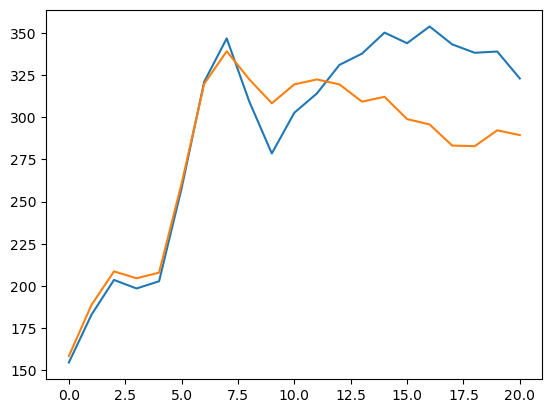

10274----------------------------------
159 159 54
b'1-Feb-2003 19:11:59.260' b'5-Feb-2003 14:26:59.310'
44 94
[1.99765317 1.99765317 1.99765317 1.99765317 1.99765317 1.99765317
 1.99765317 1.99765317 1.99765317 1.99765317 1.99765317 1.99765317
 1.99765317 1.99765317]


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


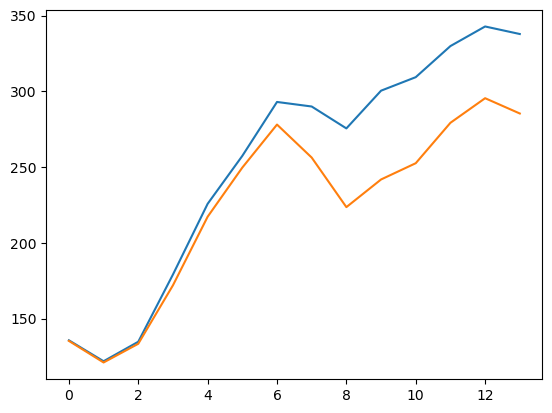

8056----------------------------------
123 133 32
b'24-Jun-1997 16:00:05.380' b'26-Jun-1997 19:12:05.340'
67 97
[1.99765619 1.99765619 1.99765619 1.99765619 1.99765619 1.99765619
 1.99765619 1.99765619 1.99765619 1.99765619 1.99765619 1.99765619
 1.99765619 1.99765619 1.99765619 1.99765619]


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


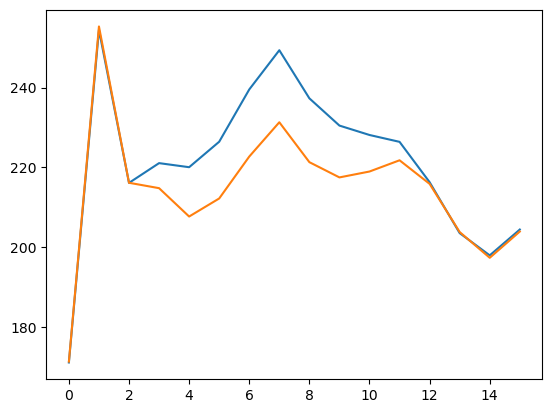

8060----------------------------------
119 147 46
b'7-Jul-1997 14:24:04.080' b'10-Jul-1997 17:36:03.990'
66 80
[0.63815472 0.63815472 0.63815472 0.63815472 0.63815472 0.63815472
 0.63815472 0.63815472 0.63815472 0.63815472 0.63815472 0.63815472
 0.63815472 0.63815472 0.63815472 0.63815472 0.63815472 0.63815472
 0.63815472 0.63815472]


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


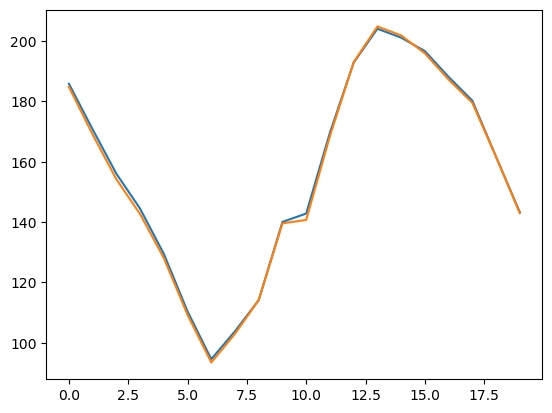

In [403]:
DF0=pd.read_csv('./arangos4.csv')


#for name in DF0.AR.values:
for name in [10268,10274,8056,8060]:
    nn=DF0[DF0['AR']==name].range.values[0]
    sg0=DF0[DF0['AR']==name].sigma.values[0]
    name=str(name)
    print(name+'----------------------------------')
    datad,times=opencube2(name=name,path='../movies')
    scl=1
    
    mask_cube=np.load('./masks/'+name+'_mask.npy')[:,:,0:nn]
    data2=datad[:,:,0:nn]*mask_cube
    sz2,sz1,nMagnetograms = (np.shape(data2))
    
    tracev=pd.read_csv('./posteriors/'+name+'_TM3.csv')
    params0={}
    for pp in ['da','a','R','alpha','N0','axf','xc','yc']:
        params0[pp]=tracev.groupby('mag')[pp].mean().values
        
    tracev2=pd.read_csv('./posteriors/'+name+'_TM3A.csv')        
    params2={}
    for pp in ['da','a','R','alpha','N0','axf','xc','yc','ar']:
        params2[pp]=tracev2.groupby('mag')[pp].mean().values
    print(params2['ar'])
    magmax=DF1.mag.max()
    stp=round(nn/len(params0['da']))
    ranges = set_ranges(data2)
    hem=ranges['hem']
        
    x1 = np.linspace(0,int((sz1-1)), int((sz1)))
    y1 = np.linspace(0,int((sz2-1)), int((sz2)))
    z1 = np.linspace(0,len(params0['da'])-1, len(params0['da']))
    xv, yv, zv = np.meshgrid(x1, y1,z1)
    
    mmask=np.abs(data2) > 50

    modcube0= modelmag(xv,yv,params=params0,hem=hem)
    modcube2= modelmag2(xv,yv,params=params2,hem=hem)
        
    sgcube0=(modcube0-data2[:,:,::stp])**2
    sgcube2=(modcube2-data2[:,:,::stp])**2

    plt.plot(np.sqrt(np.sum(mmask[:,:,::stp]*sgcube0,
                            axis=(0,1))/np.sum(mmask[:,:,::stp],axis=(0,1))))
    plt.plot(np.sqrt(np.sum(mmask[:,:,::stp]*sgcube2,
                            axis=(0,1))/np.sum(mmask[:,:,::stp],axis=(0,1))))

    plt.show()

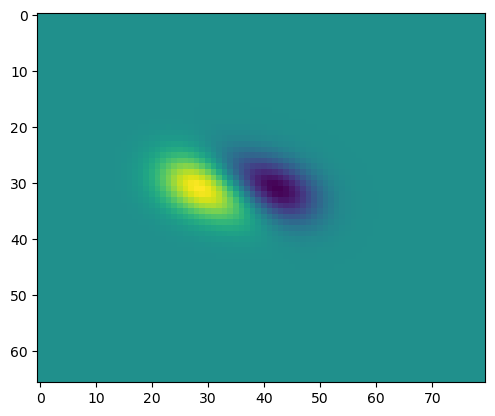

# OLD

In [ ]:
sns.regplot(data=DF.groupby('AR').max(),x='axf',y='flux',line_kws=dict(color="r"))
plt.ylim(0,3.5e22)
plt.xlim(0,3.5e22)
plt.xlabel(r'$\Phi_A$')
plt.ylabel(r'Max Obs Flux')
plt.text(0.5e22,3e22,r'$\rho = $'+'{0:.2f}'.format(np.corrcoef(DF.axf,DF.flux)[0][1]))
plt.text(0.5e22,2.5e22,'y = {slope:.2f}x + {ord:.2e}'.format(slope=np.polyfit(DF.axf,DF.flux,deg=1)[0],ord=np.polyfit(DF.axf,DF.flux,deg=1)[1]))
sns.lineplot(data=DF.groupby('AR').max(),x='flux',y='flux',linestyle='dashed',color='black')

In [201]:
'{0:.2f}'.format(np.polyfit(DF.axf,DF.flux,deg=1)[0])

'0.86'

In [ ]:
sns.lineplot()

10132----------------------------------
133 123 33
b'21-Sep-2002 22:23:01.298' b'24-Sep-2002 03:11:01.344'
75 84
10323----------------------------------
155 193 68
b'27-Mar-2003 14:24:00.501' b'1-Apr-2003 03:12:00.557'
96 159
10344----------------------------------
231 171 68
b'25-Apr-2003 16:03:00.390' b'30-Apr-2003 04:47:00.310'
73 119
10381----------------------------------
145 137 57
b'9-Jun-2003 22:22:59.390' b'13-Jun-2003 17:34:59.340'
70 88
10569----------------------------------
96 119 68
b'4-Mar-2004 19:15:03.230' b'9-Mar-2004 08:03:03.330'
71 103
10879----------------------------------
143 151 65
b'1-May-2006 11:11:01.530' b'5-May-2006 19:11:01.450'
71 96
10900----------------------------------
163 191 68
b'15-Jul-2006 17:36:01.630' b'20-Jul-2006 06:23:01.750'
91 141
10971----------------------------------
151 169 56
b'28-Sep-2007 00:03:02.040' b'1-Oct-2007 17:36:01.940'
57 86
11024----------------------------------
137 157 48
b'4-Jul-2009 00:00:02.090' b'7-Jul-2009 04:48:02.

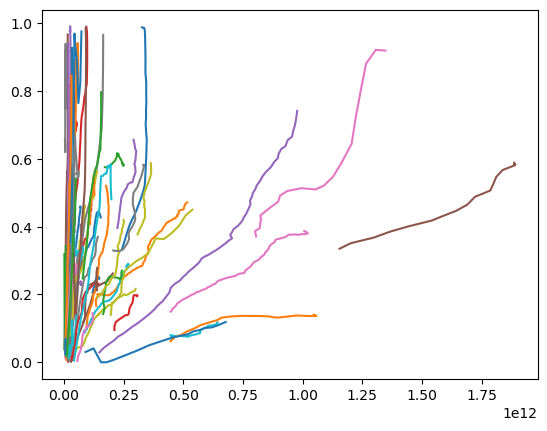

In [119]:
dmax=[]
fmax=[]
amax=[]
afl=[]
nt=[]
sgmax=[]
maxub=[]
rot=[]
tlmax=[]

pixsize=1.98*725*1000*100
pixarea=pixsize*pixsize

for name in ars:
    DF1=pd.read_csv('./posteriors/'+str(name)+'_TM3.csv')
    dmax.append(DF1.groupby('mag')['da'].mean().max())
    tlmax.append(np.abs(DF1.groupby('mag')['alpha'].mean()).max())    
    rot.append(np.mean(DF1.groupby('mag')['alpha'].mean()[:]-DF1.groupby('mag')['alpha'].mean().values[-1])*180/np.pi)
    nt.append(DF1.groupby('mag')['N0'].mean().max())
    amax.append(DF1.groupby('mag')['a'].mean().max())
    afl.append(pixarea*DF1.groupby('mag')['axf'].mean().max())
    
    DF0=pd.read_csv('arangosx.csv')
    
    nn=DF0[DF0['AR']==name].range.values[0]
    sg0=DF0[DF0['AR']==name].sigma.values[0]
    sgmax.append(sg0)
    
    name=str(name)
    print(name+'----------------------------------')
    datad,times=opencube2(name=name,path='../movies')
    scl=1
    
    mask_cube=np.load('./masks/'+name+'_mask.npy')[:,:,0:nn]
    data2=datad[:,:,0:nn]*mask_cube
    sz2,sz1,nMagnetograms = (np.shape(data2))
    


    
    flux=pixarea*np.sum(np.abs(data2)/2,axis=(0,1))
    fmax.append(flux.max())
    maxub.append(pixarea*np.max(np.abs(np.sum(np.abs(data2*(data2>0)),axis=(0,1))-np.sum(np.abs(data2*(data2<0)),axis=(0,1))))/flux.max())
        
    if len(flux) == len(DF1.groupby('mag')['a'].mean()):
        plt.plot(flux/pixarea*DF1.groupby('mag')['axf'].mean().max(),DF1.groupby('mag')['da'].mean())
    else:
        frac=len(flux)/len(DF1.groupby('mag')['a'].mean())
        if frac > 1:
            try:
                plt.plot(flux[::round(frac)]/pixarea*DF1.groupby('mag')['axf'].mean().max(),DF1.groupby('mag')['da'].mean())
            except:
                print(name)

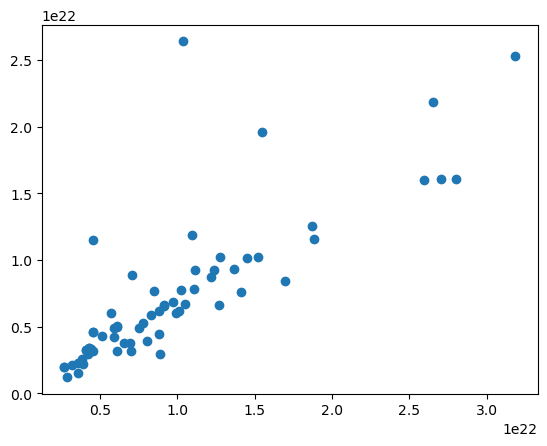

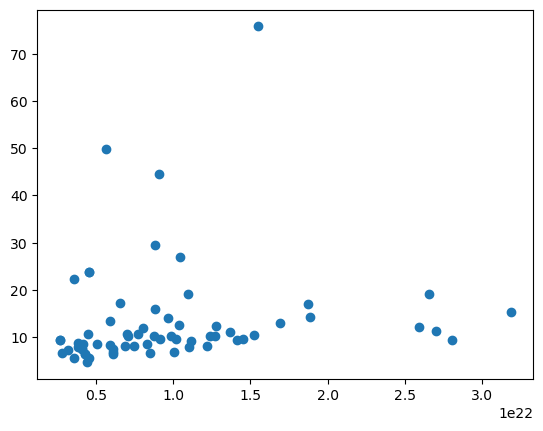

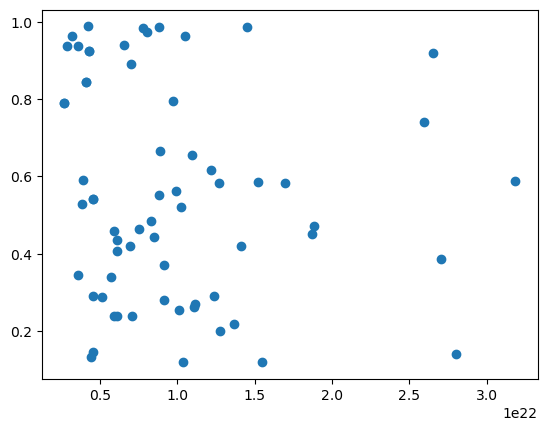

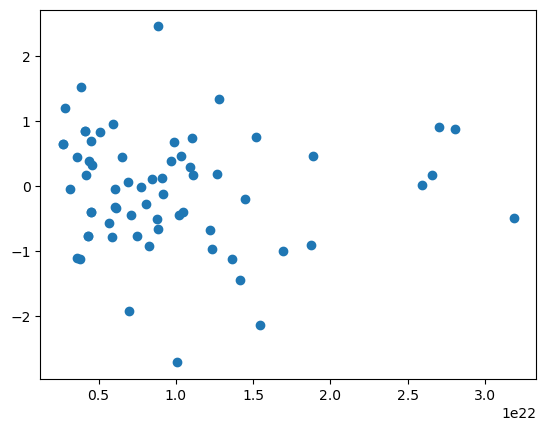

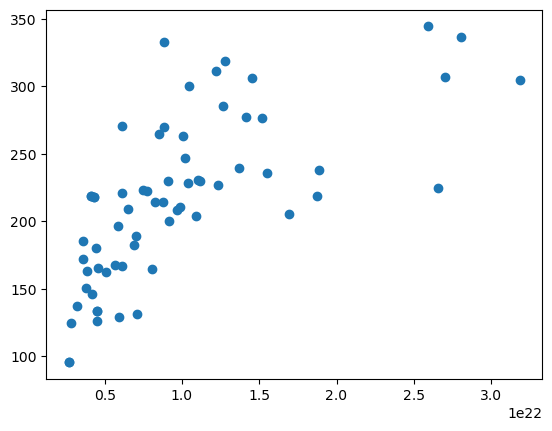

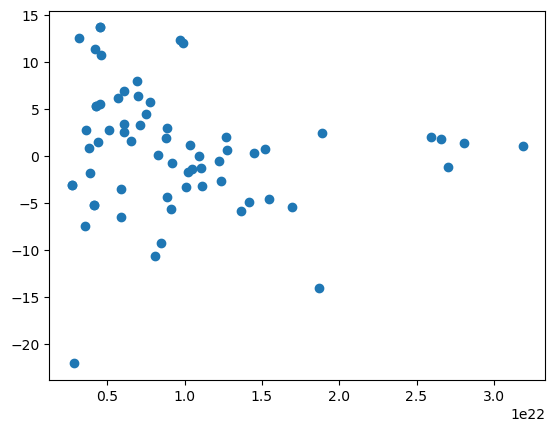

In [120]:
for p in [afl,amax,dmax,nt,sgmax,rot]:
    plt.scatter(fmax,p,marker='o')
    plt.show()

In [66]:
for p in [afl,amax,dmax,nt,sgmax]:
    print(np.corrcoef(maxub,p)[1,0])

0.06276647960501974
0.18993356484442886
0.08874677374027135
-0.1308099317301114
0.2496443016092273


In [122]:
print(np.corrcoef(np.abs(nt),np.abs(rot))[1,0])

-0.05616092917701505


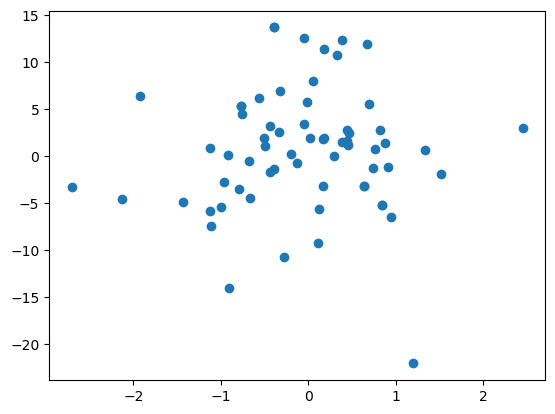

In [123]:
plt.scatter(nt,rot,marker='o')